In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import pearsonr
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify

In [ ]:
pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.4 MB/s 


In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data= pd.read_excel('data.xlsx')

In [ ]:
data.head(6)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    417566             53278       61360  89.63         67        22807   
2    539055             52378       60300  88.39         67        22807   
3    529269             46349       61500  76.42         67        22807   
4    563215             43594       78256  57.50         67        22744   
5    498082             73123       92900  79.66         67        22807   

   manufacturer_id Date.of.Birth Employment.Type DisbursalDate  ...  PAN_flag  \
0               45    1984-01-01        Salaried    2018-08-03  ...         0   
1               45    1985-08-24   Self employed    2018-08-01  ...         0   
2               45    1977-12-09   Self employed    2018-09-26  ...         0   
3               45    1988-06-01        Salaried    2018-09-23  ...         0   
4               86    1994-07-14   Self employed    2018-10-08  ...         0   
5               45    1989-01-02   Self employed    2018-09-10  ...         0   

   VoterID_flag  Driving_flag  Passport_flag  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0             0             0              0                             0   
1             0             0              0                             0   
2             0             0              0                             0   
3             0             0              0                             0   
4             0             0              0                             0   
5             0             0              0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    0         0yrs 0mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 0mon   
4                                    0         0yrs 0mon   
5                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES loan_default  
0              0yrs 0mon                0            0  
1              0yrs 0mon                0            0  
2              0yrs 0mon                1            1  
3              0yrs 0mon                0            0  
4              0yrs 0mon                0            0  
5              0yrs 0mon                0            0  

[6 rows x 23 columns]

In [ ]:
data.tail(6)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
233148    421689             47349       65502  74.81        202        23389   
233149    561031             57759       76350  77.28          5        22289   
233150    649600             55009       71200  78.72        138        17408   
233151    603445             58513       68000  88.24        135        23313   
233152    442948             22824       40458  61.79        160        16212   
233153    545300             35299       72698  52.27          3        14573   

        manufacturer_id Date.of.Birth Employment.Type DisbursalDate  ...  \
233148               86    1970-01-01   Self employed    2018-08-04  ...   
233149               51    1981-11-10   Self employed    2018-10-06  ...   
233150               51    1992-10-15   Self employed    2018-10-31  ...   
233151               45    1981-12-19   Self employed    2018-10-23  ...   
233152               48    1989-07-31   Self employed    2018-08-17  ...   
233153               45    1968-08-01   Self employed    2018-09-28  ...   

        PAN_flag  VoterID_flag  Driving_flag  Passport_flag  \
233148         0             0             0              0   
233149         0             0             0              0   
233150         0             0             0              0   
233151         0             0             0              0   
233152         1             0             0              0   
233153         0             0             0              0   

        NEW.ACCTS.IN.LAST.SIX.MONTHS  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  \
233148                             0                                    1   
233149                             0                                    0   
233150                             0                                    0   
233151                            35                                    5   
233152                             9                                    1   
233153                             5                                    0   

        AVERAGE.ACCT.AGE  CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES loan_default  
233148        1yrs 11mon             1yrs 11mon                0            0  
233149         2yrs 4mon              2yrs 4mon                0            0  
233150         1yrs 5mon              1yrs 5mon                1            0  
233151         0yrs 9mon             3yrs 10mon                1            0  
233152         1yrs 2mon              3yrs 2mon                0            0  
233153        2yrs 11mon              5yrs 4mon                0            0  

[6 rows x 23 columns]

In [ ]:
data.isnull().sum()


UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
NEW.ACCTS.IN.LAST.SIX.MONTHS              0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS       0
AVERAGE.ACCT.AGE                          0
CREDIT.HISTORY.LENGTH                     0
NO.OF_INQUIRIES                           0
loan_default                    

# Employment type as null value and hence replacing it by modal values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Date.of.Birth                        233154 non-null  datetime64[ns]
 8   Employment.Type                      225493 non-null  object        
 9   DisbursalDate                        233154 non-null  datetime64[ns]
 

In [ ]:
data.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
NEW.ACCTS.IN.LAST.SIX.MONTHS               26
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS        14
AVERAGE.ACCT.AGE                          192
CREDIT.HISTORY.LENGTH                     294
NO.OF_INQUIRIES                   

Helps to determine data type:

Columns having lot of unique values can be considered int columns, reasonable columns can be guessed as object/string, 2 or 1 unique values are bool.

Special case : Employment type has null values too and hence can be considered object/string type

# Hence converting all Id COLUMNS to Object
# Flag and target variable to bool
# Rest stays the same

Initial assumptions below:

UniqueID                               233154 - int

disbursed_amount                        24565 - int

asset_cost                              46252 - int

ltv                                      6579 - int

branch_id                                  82 - object

supplier_id                              2953 - object

manufacturer_id                            11 - object

Date.of.Birth                           15433 - Date

Employment.Type                             2 - object

DisbursalDate                              84 - Date

State_ID                                   22 - object

MobileNo_Avl_Flag                           1 - bool

Aadhar_flag                                 2 - bool

PAN_flag                                    2 - bool

VoterID_flag                                2 - bool

Driving_flag                                2 - bool

Passport_flag                               2 - bool

NEW.ACCTS.IN.LAST.SIX.MONTHS               26 - int

DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS        14 - int

AVERAGE.ACCT.AGE                          192 - int

CREDIT.HISTORY.LENGTH                     294 - int

NO.OF_INQUIRIES                            25 - int

loan_default                                2 - bool(target)

In [ ]:
data.duplicated().sum() ##no duplicated rows

0

In [ ]:
data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
NEW.ACCTS.IN.LAST.SIX.MONTHS              0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS       0
AVERAGE.ACCT.AGE                          0
CREDIT.HISTORY.LENGTH                     0
NO.OF_INQUIRIES                           0
loan_default                    

In [ ]:
data.shape

(233154, 23)

Changing column names to follow standard

In [ ]:
data.columns = data.columns.str.replace('.','_',regex=True)

In [ ]:
 data.columns = data.columns.str.title()


In [ ]:
data.columns

Index(['Uniqueid', 'Disbursed_Amount', 'Asset_Cost', 'Ltv', 'Branch_Id',
       'Supplier_Id', 'Manufacturer_Id', 'Date_Of_Birth', 'Employment_Type',
       'Disbursaldate', 'State_Id', 'Mobileno_Avl_Flag', 'Aadhar_Flag',
       'Pan_Flag', 'Voterid_Flag', 'Driving_Flag', 'Passport_Flag',
       'New_Accts_In_Last_Six_Months', 'Delinquent_Accts_In_Last_Six_Months',
       'Average_Acct_Age', 'Credit_History_Length', 'No_Of_Inquiries',
       'Loan_Default'],
      dtype='object')

In [ ]:
data['Employment_Type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [ ]:
data['Employment_Type'].mode()

0    Self employed
dtype: object

In [ ]:
data['Employment_Type'].fillna(data['Employment_Type'].mode()[0],inplace=True)

In [ ]:
data['Employment_Type'].unique()

array(['Salaried', 'Self employed'], dtype=object)

# Changing Int types to bool wherever applicable
##Mobileno_Avl_Flag                               
##Aadhar_Flag                                     
##Pan_Flag                                        
##Voterid_Flag                                    
##Driving_Flag                                    
##Passport_Flag                                  
##Loan_Default                                    

In [ ]:
data[['Mobileno_Avl_Flag','Aadhar_Flag','Pan_Flag','Voterid_Flag','Driving_Flag','Passport_Flag','Loan_Default']] = data[['Mobileno_Avl_Flag','Aadhar_Flag','Pan_Flag','Voterid_Flag','Driving_Flag','Passport_Flag','Loan_Default']].astype("bool")

In [ ]:
data.dtypes

Uniqueid                                        int64
Disbursed_Amount                                int64
Asset_Cost                                      int64
Ltv                                           float64
Branch_Id                                       int64
Supplier_Id                                     int64
Manufacturer_Id                                 int64
Date_Of_Birth                          datetime64[ns]
Employment_Type                                object
Disbursaldate                          datetime64[ns]
State_Id                                        int64
Mobileno_Avl_Flag                                bool
Aadhar_Flag                                      bool
Pan_Flag                                         bool
Voterid_Flag                                     bool
Driving_Flag                                     bool
Passport_Flag                                    bool
New_Accts_In_Last_Six_Months                    int64
Delinquent_Accts_In_Last_Six

In [ ]:
data.describe()

Uniqueid  Disbursed_Amount    Asset_Cost            Ltv  \
count  233154.000000     233154.000000  2.331540e+05  233154.000000   
mean   535917.573376      54356.993528  7.586507e+04      74.746530   
std     68315.693711      12971.314171  1.894478e+04      11.456636   
min    417428.000000      13320.000000  3.700000e+04      10.030000   
25%    476786.250000      47145.000000  6.571700e+04      68.880000   
50%    535978.500000      53803.000000  7.094600e+04      76.800000   
75%    595039.750000      60413.000000  7.920175e+04      83.670000   
max    671084.000000     990572.000000  1.628992e+06      95.000000   

           Branch_Id    Supplier_Id  Manufacturer_Id       State_Id  \
count  233154.000000  233154.000000    233154.000000  233154.000000   
mean       72.936094   19638.635035        69.028054       7.262243   
std        69.834995    3491.949566        22.141304       4.482230   
min         1.000000   10524.000000        45.000000       1.000000   
25%        14.000000   16535.000000        48.000000       4.000000   
50%        61.000000   20333.000000        86.000000       6.000000   
75%       130.000000   23000.000000        86.000000      10.000000   
max       261.000000   24803.000000       156.000000      22.000000   

       New_Accts_In_Last_Six_Months  Delinquent_Accts_In_Last_Six_Months  \
count                 233154.000000                        233154.000000   
mean                       0.381833                             0.097481   
std                        0.955107                             0.384439   
min                        0.000000                             0.000000   
25%                        0.000000                             0.000000   
50%                        0.000000                             0.000000   
75%                        0.000000                             0.000000   
max                       35.000000                            20.000000   

       No_Of_Inquiries  
count    233154.000000  
mean          0.206615  
std           0.706498  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max          36.000000

# Converting int to object for ID columns as they are discrete
Branch_Id                                       
Supplier_Id                                     
Manufacturer_Id                                        State_Id                                                                      

In [ ]:
data[['Uniqueid','Branch_Id','Supplier_Id','Manufacturer_Id','State_Id']] = data[['Uniqueid','Branch_Id','Supplier_Id','Manufacturer_Id','State_Id']].astype("object")

In [ ]:
data.dtypes

Uniqueid                                       object
Disbursed_Amount                                int64
Asset_Cost                                      int64
Ltv                                           float64
Branch_Id                                      object
Supplier_Id                                    object
Manufacturer_Id                                object
Date_Of_Birth                          datetime64[ns]
Employment_Type                                object
Disbursaldate                          datetime64[ns]
State_Id                                       object
Mobileno_Avl_Flag                                bool
Aadhar_Flag                                      bool
Pan_Flag                                         bool
Voterid_Flag                                     bool
Driving_Flag                                     bool
Passport_Flag                                    bool
New_Accts_In_Last_Six_Months                    int64
Delinquent_Accts_In_Last_Six

**Converting Average Account Age column to float(Years) for better understanding**

In [ ]:
data['Average_Acct_Age']=(data['Average_Acct_Age'].str.extractall(r'(\d+)')[0]
  .unstack()
  .astype(int)
  .set_axis(['yr', 'mon'], axis=1, inplace=False)
  .eval('yr + mon / 12')
  .round(decimals=2))

In [ ]:
data['Average_Acct_Age'] 

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
233149    2.33
233150    1.42
233151    0.75
233152    1.17
233153    2.92
Name: Average_Acct_Age, Length: 233154, dtype: float64

**Converting Credit_History_length column to float(Years) for better understanding**

In [ ]:
data['Credit_History_Length']=(data['Credit_History_Length'].str.extractall(r'(\d+)')[0]
  .unstack()
  .astype(int)
  .set_axis(['yr', 'mon'], axis=1, inplace=False)
  .eval('yr + mon / 12')
  .round(decimals=2))

In [ ]:
data['Credit_History_Length']

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
233149    2.33
233150    1.42
233151    3.83
233152    3.17
233153    5.33
Name: Credit_History_Length, Length: 233154, dtype: float64

In [ ]:
data.dtypes

Uniqueid                                       object
Disbursed_Amount                                int64
Asset_Cost                                      int64
Ltv                                           float64
Branch_Id                                      object
Supplier_Id                                    object
Manufacturer_Id                                object
Date_Of_Birth                          datetime64[ns]
Employment_Type                                object
Disbursaldate                          datetime64[ns]
State_Id                                       object
Mobileno_Avl_Flag                                bool
Aadhar_Flag                                      bool
Pan_Flag                                         bool
Voterid_Flag                                     bool
Driving_Flag                                     bool
Passport_Flag                                    bool
New_Accts_In_Last_Six_Months                    int64
Delinquent_Accts_In_Last_Six

**Converting DOB to age to make sense**

In [ ]:
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
data['Age'] = data['Date_Of_Birth'].apply(age)

In [ ]:
data.dtypes

Uniqueid                                       object
Disbursed_Amount                                int64
Asset_Cost                                      int64
Ltv                                           float64
Branch_Id                                      object
Supplier_Id                                    object
Manufacturer_Id                                object
Date_Of_Birth                          datetime64[ns]
Employment_Type                                object
Disbursaldate                          datetime64[ns]
State_Id                                       object
Mobileno_Avl_Flag                                bool
Aadhar_Flag                                      bool
Pan_Flag                                         bool
Voterid_Flag                                     bool
Driving_Flag                                     bool
Passport_Flag                                    bool
New_Accts_In_Last_Six_Months                    int64
Delinquent_Accts_In_Last_Six

**Dropping DOB since Age has been derived already**

In [ ]:
data = data.drop('Date_Of_Birth', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
data.dtypes

Uniqueid                                       object
Disbursed_Amount                                int64
Asset_Cost                                      int64
Ltv                                           float64
Branch_Id                                      object
Supplier_Id                                    object
Manufacturer_Id                                object
Employment_Type                                object
Disbursaldate                          datetime64[ns]
State_Id                                       object
Mobileno_Avl_Flag                                bool
Aadhar_Flag                                      bool
Pan_Flag                                         bool
Voterid_Flag                                     bool
Driving_Flag                                     bool
Passport_Flag                                    bool
New_Accts_In_Last_Six_Months                    int64
Delinquent_Accts_In_Last_Six_Months             int64
Average_Acct_Age            

**statistical description of the quantitative data variables**

In [ ]:
data.describe()

Disbursed_Amount    Asset_Cost            Ltv  \
count     233154.000000  2.331540e+05  233154.000000   
mean       54356.993528  7.586507e+04      74.746530   
std        12971.314171  1.894478e+04      11.456636   
min        13320.000000  3.700000e+04      10.030000   
25%        47145.000000  6.571700e+04      68.880000   
50%        53803.000000  7.094600e+04      76.800000   
75%        60413.000000  7.920175e+04      83.670000   
max       990572.000000  1.628992e+06      95.000000   

       New_Accts_In_Last_Six_Months  Delinquent_Accts_In_Last_Six_Months  \
count                 233154.000000                        233154.000000   
mean                       0.381833                             0.097481   
std                        0.955107                             0.384439   
min                        0.000000                             0.000000   
25%                        0.000000                             0.000000   
50%                        0.000000                             0.000000   
75%                        0.000000                             0.000000   
max                       35.000000                            20.000000   

       Average_Acct_Age  Credit_History_Length  No_Of_Inquiries            Age  
count     233154.000000          233154.000000    233154.000000  233154.000000  
mean           0.742957               1.354285         0.206615      37.719567  
std            1.258865               2.381772         0.706498       9.839753  
min            0.000000               0.000000         0.000000      21.000000  
25%            0.000000               0.000000         0.000000      30.000000  
50%            0.000000               0.000000         0.000000      36.000000  
75%            1.080000               2.000000         0.000000      45.000000  
max           30.750000              39.000000        36.000000      72.000000

**statistical description of the categorical data variables**

In [ ]:
cat_df_loans = data.select_dtypes(include=['object']).copy()

In [ ]:
cat_df_loans.describe()

Uniqueid  Branch_Id  Supplier_Id  Manufacturer_Id Employment_Type  \
count     233154     233154       233154           233154          233154   
unique    233154         82         2953               11               2   
top       420825          2        18317               86   Self employed   
freq           1      13138         1432           109534          135296   

        State_Id  
count     233154  
unique        22  
top            4  
freq       44870

**statistical description of the bool data variables**

In [ ]:
bool_df_loans = data.select_dtypes(include=['bool']).copy()

In [ ]:
bool_df_loans.describe()

Mobileno_Avl_Flag Aadhar_Flag Pan_Flag Voterid_Flag Driving_Flag  \
count             233154      233154   233154       233154       233154   
unique                 1           2        2            2            2   
top                 True        True    False        False        False   
freq              233154      195924   215533       199360       227735   

       Passport_Flag Loan_Default  
count         233154       233154  
unique             2            2  
top            False        False  
freq          232658       182543

**Spliiting data set into defaulter data set and non defaulter data set to understand better**

In [ ]:
dataNonDefault = data.loc[data['Loan_Default'] == 0]

In [ ]:
dataNonDefault

Uniqueid  Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
0        420825             50578       58400  89.55        67       22807   
1        417566             53278       61360  89.63        67       22807   
3        529269             46349       61500  76.42        67       22807   
4        563215             43594       78256  57.50        67       22744   
5        498082             73123       92900  79.66        67       22807   
...         ...               ...         ...    ...       ...         ...   
233149   561031             57759       76350  77.28         5       22289   
233150   649600             55009       71200  78.72       138       17408   
233151   603445             58513       68000  88.24       135       23313   
233152   442948             22824       40458  61.79       160       16212   
233153   545300             35299       72698  52.27         3       14573   

       Manufacturer_Id Employment_Type Disbursaldate State_Id  ...  \
0                   45        Salaried    2018-08-03        6  ...   
1                   45   Self employed    2018-08-01        6  ...   
3                   45        Salaried    2018-09-23        6  ...   
4                   86   Self employed    2018-10-08        6  ...   
5                   45   Self employed    2018-09-10        6  ...   
...                ...             ...           ...      ...  ...   
233149              51   Self employed    2018-10-06        9  ...   
233150              51   Self employed    2018-10-31        9  ...   
233151              45   Self employed    2018-10-23        4  ...   
233152              48   Self employed    2018-08-17       16  ...   
233153              45   Self employed    2018-09-28        1  ...   

        Voterid_Flag  Driving_Flag  Passport_Flag  \
0              False         False          False   
1              False         False          False   
3              False         False          False   
4              False         False          False   
5              False         False          False   
...              ...           ...            ...   
233149         False         False          False   
233150         False         False          False   
233151         False         False          False   
233152         False         False          False   
233153         False         False          False   

        New_Accts_In_Last_Six_Months  Delinquent_Accts_In_Last_Six_Months  \
0                                  0                                    0   
1                                  0                                    0   
3                                  0                                    0   
4                                  0                                    0   
5                                  0                                    0   
...                              ...                                  ...   
233149                             0                                    0   
233150                             0                                    0   
233151                            35                                    5   
233152                             9                                    1   
233153                             5                                    0   

        Average_Acct_Age  Credit_History_Length  No_Of_Inquiries  \
0                   0.00                   0.00                0   
1                   0.00                   0.00                0   
3                   0.00                   0.00                0   
4                   0.00                   0.00                0   
5                   0.00                   0.00                0   
...                  ...                    ...              ...   
233149              2.33                   2.33                0   
233150              1.42                   1.42                1   
233151              0.75                   3.83        

In [ ]:
dataDefault = data.loc[data['Loan_Default'] == 1]

In [ ]:
dataDefault

Uniqueid  Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
2        539055             52378       60300  88.39        67       22807   
7        440293             53713       61780  89.83        67       22807   
8        566763             57713       68040  86.27        67       22807   
12       422926             50578       58400  89.55        67       22807   
18       557082             55513       67950  83.15        67       22807   
...         ...               ...         ...    ...       ...         ...   
233125   591772             51303       90665  58.46       159       24319   
233127   612524             89555      115285  79.80       258       24412   
233134   633696             49763       82734  62.85       120       22936   
233138   561444             53303       71088  77.37        20       14518   
233147   437681             43272       59313  74.86        78       17014   

       Manufacturer_Id Employment_Type Disbursaldate State_Id  ...  \
2                   45   Self employed    2018-09-26        6  ...   
7                   45   Self employed    2018-08-16        6  ...   
8                   45   Self employed    2018-10-10        6  ...   
12                  45        Salaried    2018-08-06        6  ...   
18                  45        Salaried    2018-10-04        6  ...   
...                ...             ...           ...      ...  ...   
233125              48   Self employed    2018-10-20        7  ...   
233127              86   Self employed    2018-10-24       16  ...   
233134              86        Salaried    2018-10-28       12  ...   
233138              45   Self employed    2018-10-08        5  ...   
233147              45        Salaried    2018-08-14        4  ...   

        Voterid_Flag  Driving_Flag  Passport_Flag  \
2              False         False          False   
7              False         False          False   
8              False         False          False   
12             False         False          False   
18             False         False          False   
...              ...           ...            ...   
233125          True         False          False   
233127         False         False          False   
233134         False         False          False   
233138         False         False          False   
233147         False         False          False   

        New_Accts_In_Last_Six_Months  Delinquent_Accts_In_Last_Six_Months  \
2                                  0                                    0   
7                                  0                                    0   
8                                  0                                    0   
12                                 0                                    0   
18                                 0                                    0   
...                              ...                                  ...   
233125                             0                                    0   
233127                             0                                    0   
233134                             0                                    0   
233138                             0                                    0   
233147                             0                                    0   

        Average_Acct_Age  Credit_History_Length  No_Of_Inquiries  \
2                   0.00                   0.00                1   
7                   0.00                   0.00                0   
8                   0.00                   0.00                0   
12                  0.00                   0.00                0   
18                  0.00                   0.00                0   
...                  ...                    ...              ...   
233125              2.33                   2.33                0   
233127              0.75                   2.33                0   
233134              0.42                   0.42        

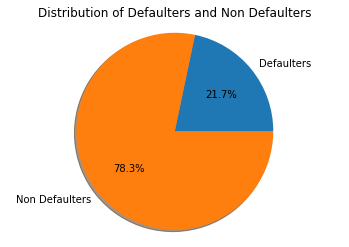

In [ ]:
##distribution of target variable in the DS
defaulterDataCount = dataDefault.Uniqueid.count()
nonDefaulterDataCount = dataNonDefault.Uniqueid.count()
pieValues = [defaulterDataCount,nonDefaulterDataCount]
labels = ['Defaulters','Non Defaulters']
 
def func(pct):
  return "{:1.1f}%".format(pct)
 
plt.pie(pieValues, labels=labels, autopct=lambda pct: func(pct), shadow=True)
plt.title('Distribution of Defaulters and Non Defaulters')
plt.axis('equal')
plt.show()

The data set has 78% of Non Defaulters and it dominates the DS

**distribution of the target variable across various categories like branch, city, state, branch, supplier, manufacturer, etc.**


In [ ]:
data['Customer_Status'] = np.where(data['Loan_Default'] == 1, "Defaulter", "Non Defaulter")

In [ ]:
data.head(20)

Uniqueid  Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
0    420825             50578       58400  89.55        67       22807   
1    417566             53278       61360  89.63        67       22807   
2    539055             52378       60300  88.39        67       22807   
3    529269             46349       61500  76.42        67       22807   
4    563215             43594       78256  57.50        67       22744   
5    498082             73123       92900  79.66        67       22807   
6    586411             55213       68600  83.09        67       22807   
7    440293             53713       61780  89.83        67       22807   
8    566763             57713       68040  86.27        67       22807   
9    525983             46549       69518  69.05        67       22744   
10   451537             42594       60630  72.57        67       22807   
11   439084             50678       58300  89.88        67       22807   
12   422926             50578       58400  89.55        67       22807   
13   582949             40894       61230  67.78        67       22807   
14   596436             42894       70600  61.61        67       22807   
15   507978             64282       74290  89.11        67       22807   
16   480958             68082       79806  87.71        67       22744   
17   518864             58413       66100  89.86        67       22807   
18   557082             55513       67950  83.15        67       22807   
19   650644             53040       67067  82.73        78       17014   

   Manufacturer_Id Employment_Type Disbursaldate State_Id  ...  Driving_Flag  \
0               45        Salaried    2018-08-03        6  ...         False   
1               45   Self employed    2018-08-01        6  ...         False   
2               45   Self employed    2018-09-26        6  ...         False   
3               45        Salaried    2018-09-23        6  ...         False   
4               86   Self employed    2018-10-08        6  ...         False   
5               45   Self employed    2018-09-10        6  ...         False   
6               45        Salaried    2018-10-18        6  ...         False   
7               45   Self employed    2018-08-16        6  ...         False   
8               45   Self employed    2018-10-10        6  ...         False   
9               86        Salaried    2018-09-21        6  ...         False   
10              45   Self employed    2018-08-21        6  ...         False   
11              45   Self employed    2018-08-14        6  ...         False   
12              45        Salaried    2018-08-06        6  ...         False   
13              45   Self employed    2018-10-16        6  ...         False   
14              45   Self employed    2018-10-21        6  ...         False   
15              45        Salaried    2018-09-15        6  ...         False   
16              86        Salaried    2018-08-31        6  ...         False   
17              45   Self employed    2018-09-19        6  ...         False   
18              45        Salaried    2018-10-04        6  ...         False   
19              45        Salaried    2018-10-31        4  ...         False   

    Passport_Flag  New_Accts_In_Last_Six_Months  \
0           False                             0   
1           False                             0   
2           False                             0   
3           False                             0   
4           False                             0   
5           False                             0   
6           False                             0   
7           False                             0   
8           False                             0   
9           False                             0   
10          False                             0   
11          False                             0   
12          False                             0   
13          False                             0   
14

## Study of Branch Id




Overall Data 

In [ ]:
dfDataBranchAll = data.groupby(['Branch_Id'],sort=False)['Branch_Id'].count()
dfDataBranchAllSorted = dfDataBranchAll.sort_values( ascending=False)
dfDataBranchAllSorted

Branch_Id
2      13138
67     11328
3       9230
5       9218
36      8832
       ...  
217      183
261      176
84       156
111       89
158       69
Name: Branch_Id, Length: 82, dtype: int64

**The top 5 busiest branches in terms of No of Customers are 2,67,3,5,36**

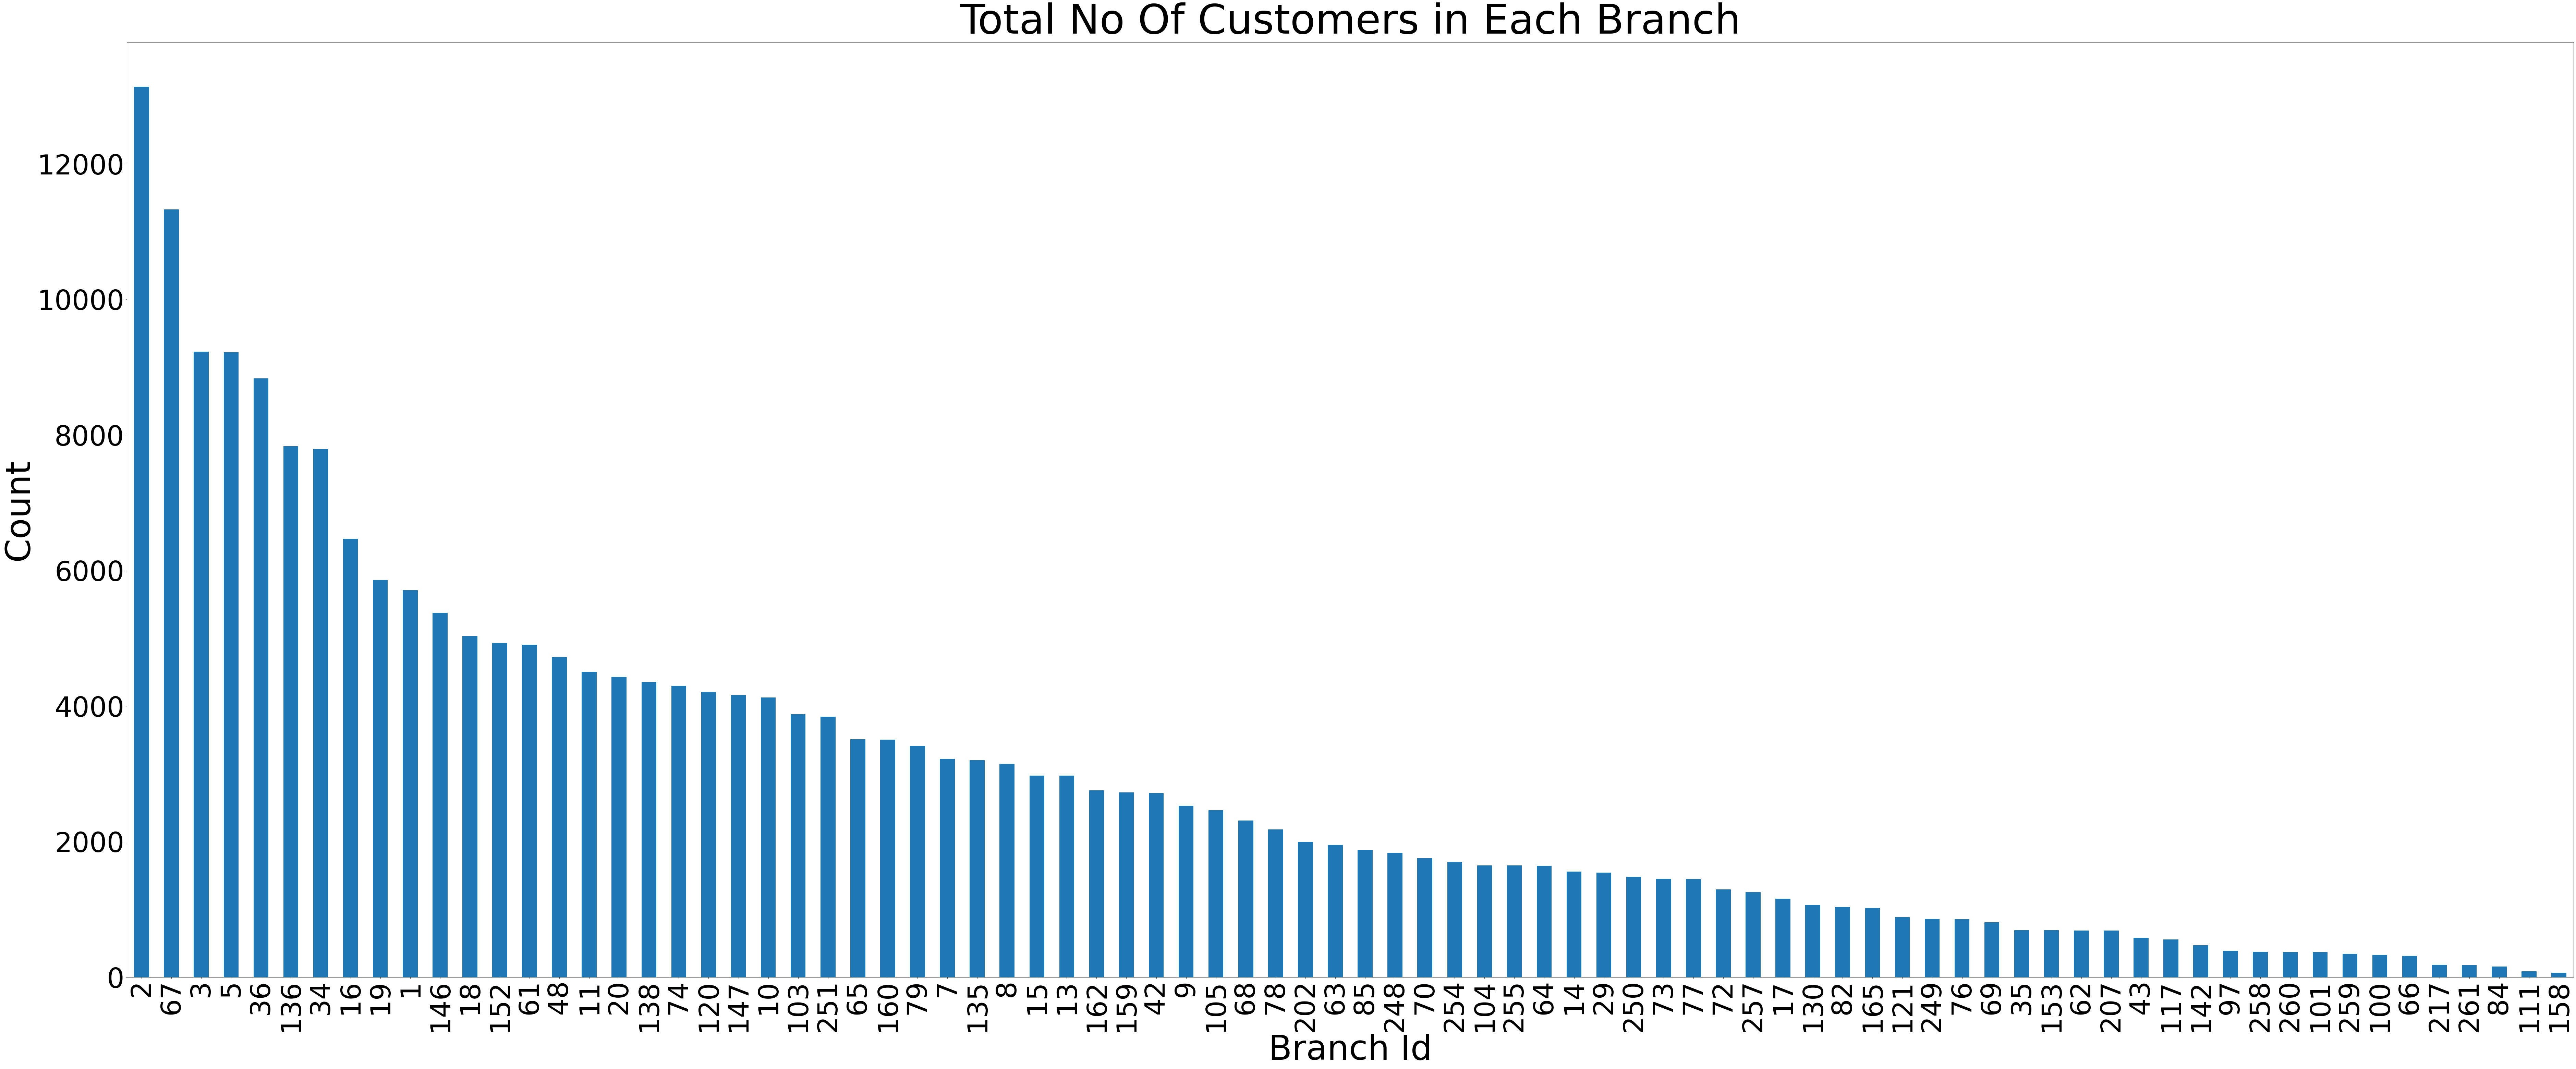

In [ ]:
plt.figure(figsize=(100, 40))
dfDataBranchAllSorted.plot.bar()
axes = plt.gca()
axes.xaxis.label.set_size(100)
axes.yaxis.label.set_size(100)
# Adjust padding
plt.tight_layout()
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
#x axis y axis names
plt.xlabel ('Branch Id')
plt.ylabel('Count')
plt.title('Total No Of Customers in Each Branch', fontsize=120)
# Display
plt.show()

**Defaulters**

In [ ]:
dfDataBranchDefaulters = dataDefault.groupby(['Branch_Id'],sort=False)['Branch_Id'].count()
dfDataBranchDefaultersSorted = dfDataBranchDefaulters.sort_values( ascending=False)
dfDataBranchDefaultersSorted

Branch_Id
36     2621
2      2455
67     2198
5      2047
16     1815
       ... 
217      45
261      39
84       31
111      20
158      19
Name: Branch_Id, Length: 82, dtype: int64

The top 5 branches with max no of defaulters count is 36,2,67,5,16.

*# This doesnt mean the defaulter % is more, it is just the count*

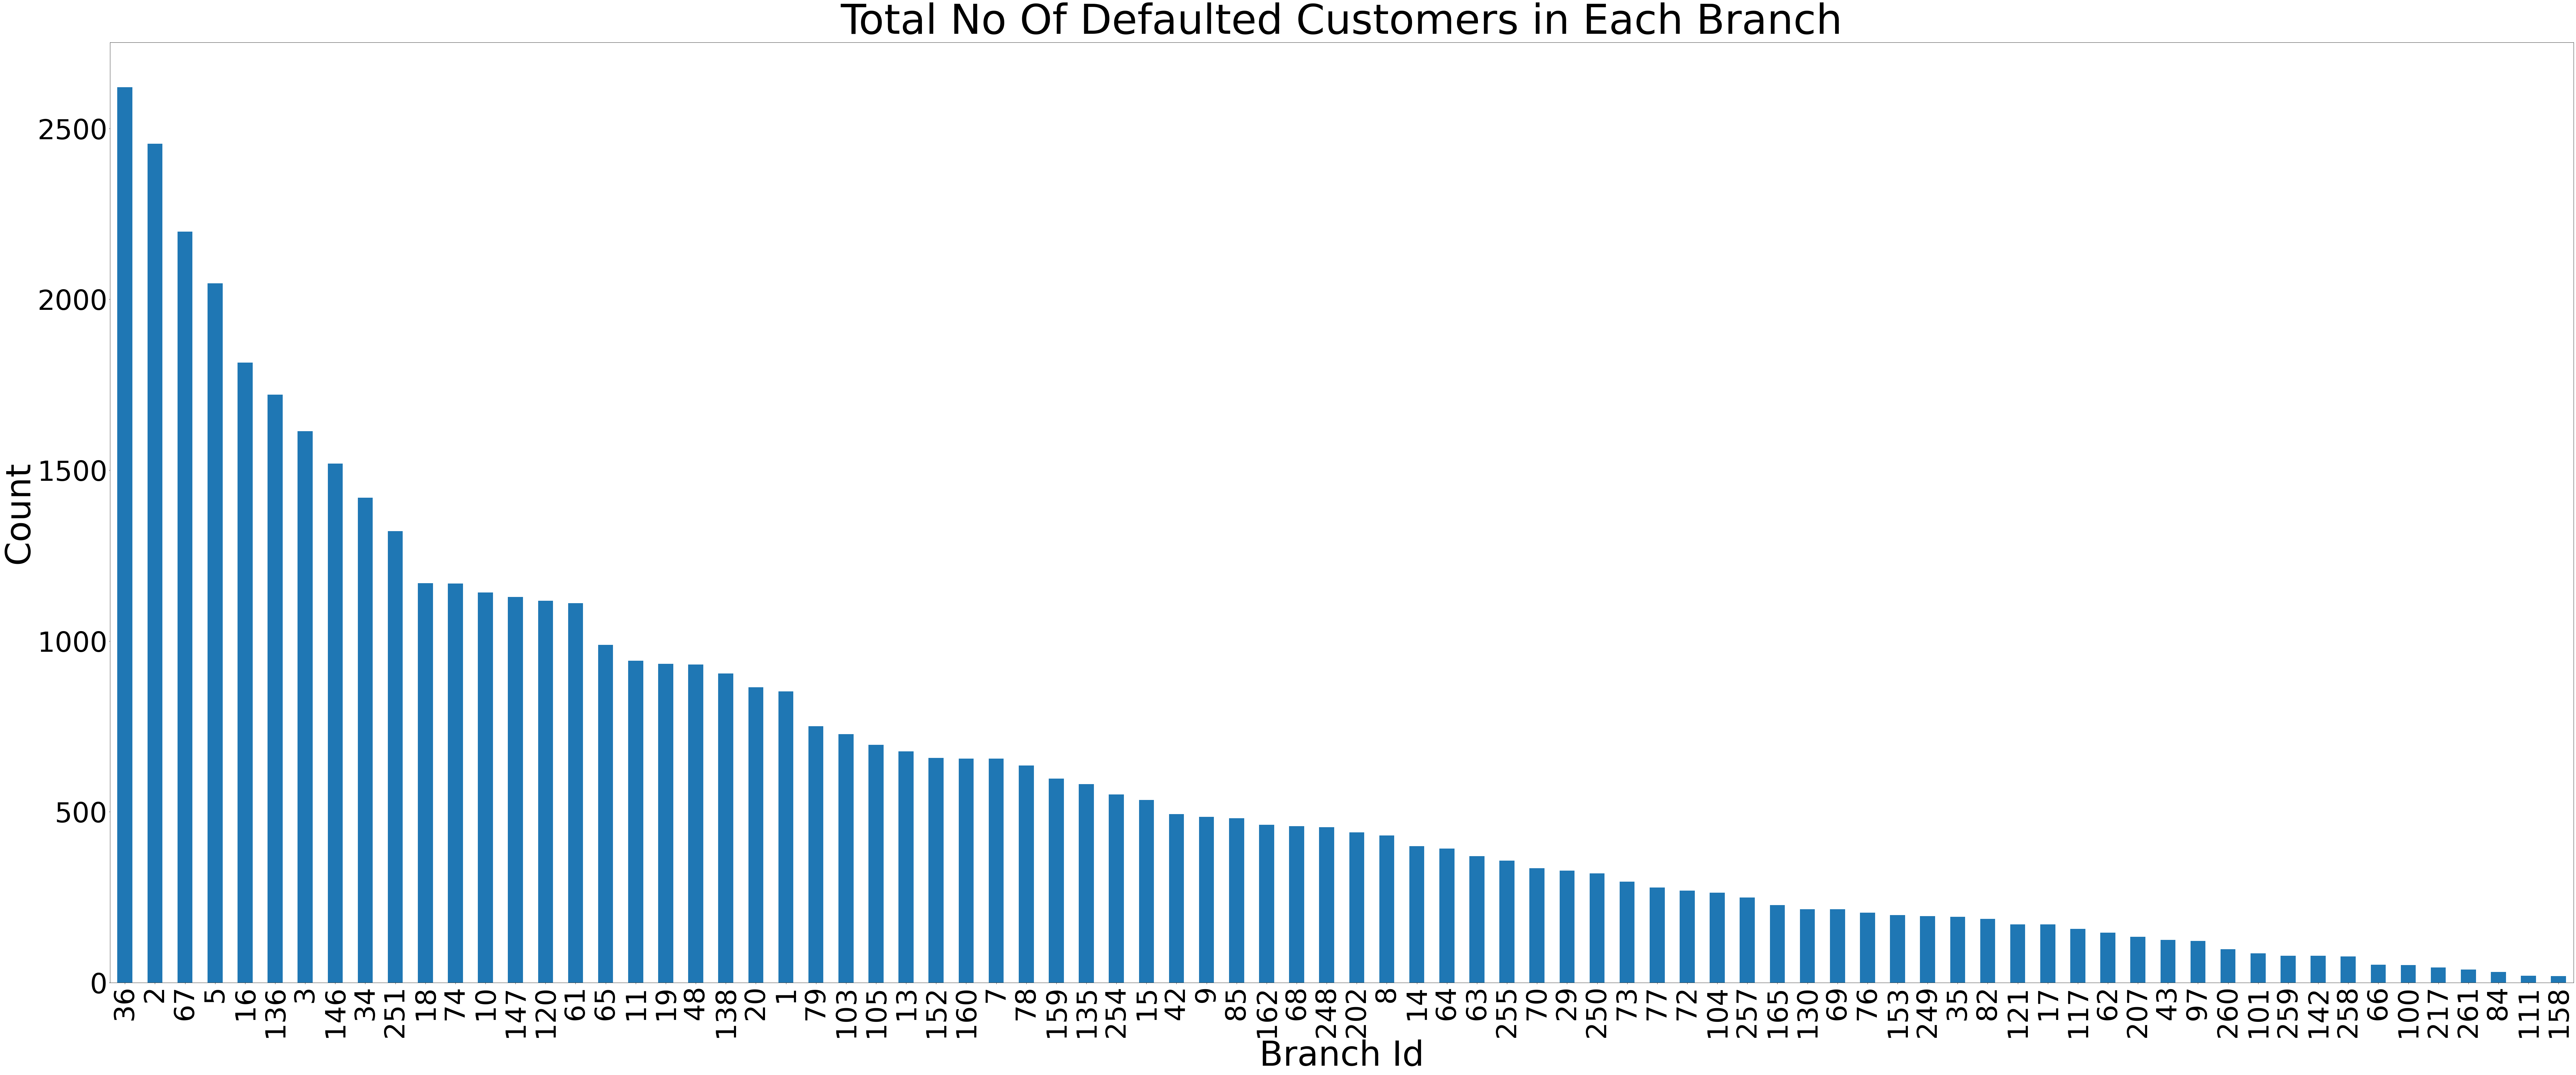

In [ ]:
plt.figure(figsize=(100, 40))
dfDataBranchDefaultersSorted.plot.bar()
axes = plt.gca()
axes.xaxis.label.set_size(100)
axes.yaxis.label.set_size(100)
# Adjust padding
plt.tight_layout()
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
#x axis y axis names
plt.xlabel ('Branch Id')
plt.ylabel('Count')
plt.title('Total No Of Defaulted Customers in Each Branch', fontsize=120)
# Display
plt.show()


It is clearly seen that Branch Id 36,2,67,5,16 tops the defaulters list in terms of count and branches 100,217,261,84,111,158 have the least defaulters

**Lets see the data spread in non defaulters**

In [ ]:
dfDataBranchNonDefaulters = dataNonDefault.groupby(['Branch_Id'],sort=False)['Branch_Id'].count()
dfDataBranchNonDefaultersSorted = dfDataBranchNonDefaulters.sort_values( ascending=False)
dfDataBranchNonDefaultersSorted

Branch_Id
2      10683
67      9130
3       7616
5       7171
34      6375
       ...  
217      138
261      137
84       125
111       69
158       50
Name: Branch_Id, Length: 82, dtype: int64

The top 5 branches with max no of non defaulters count is 2,67,3,5,34.

# This doesnt mean the non defaulter % is more, it is just the count

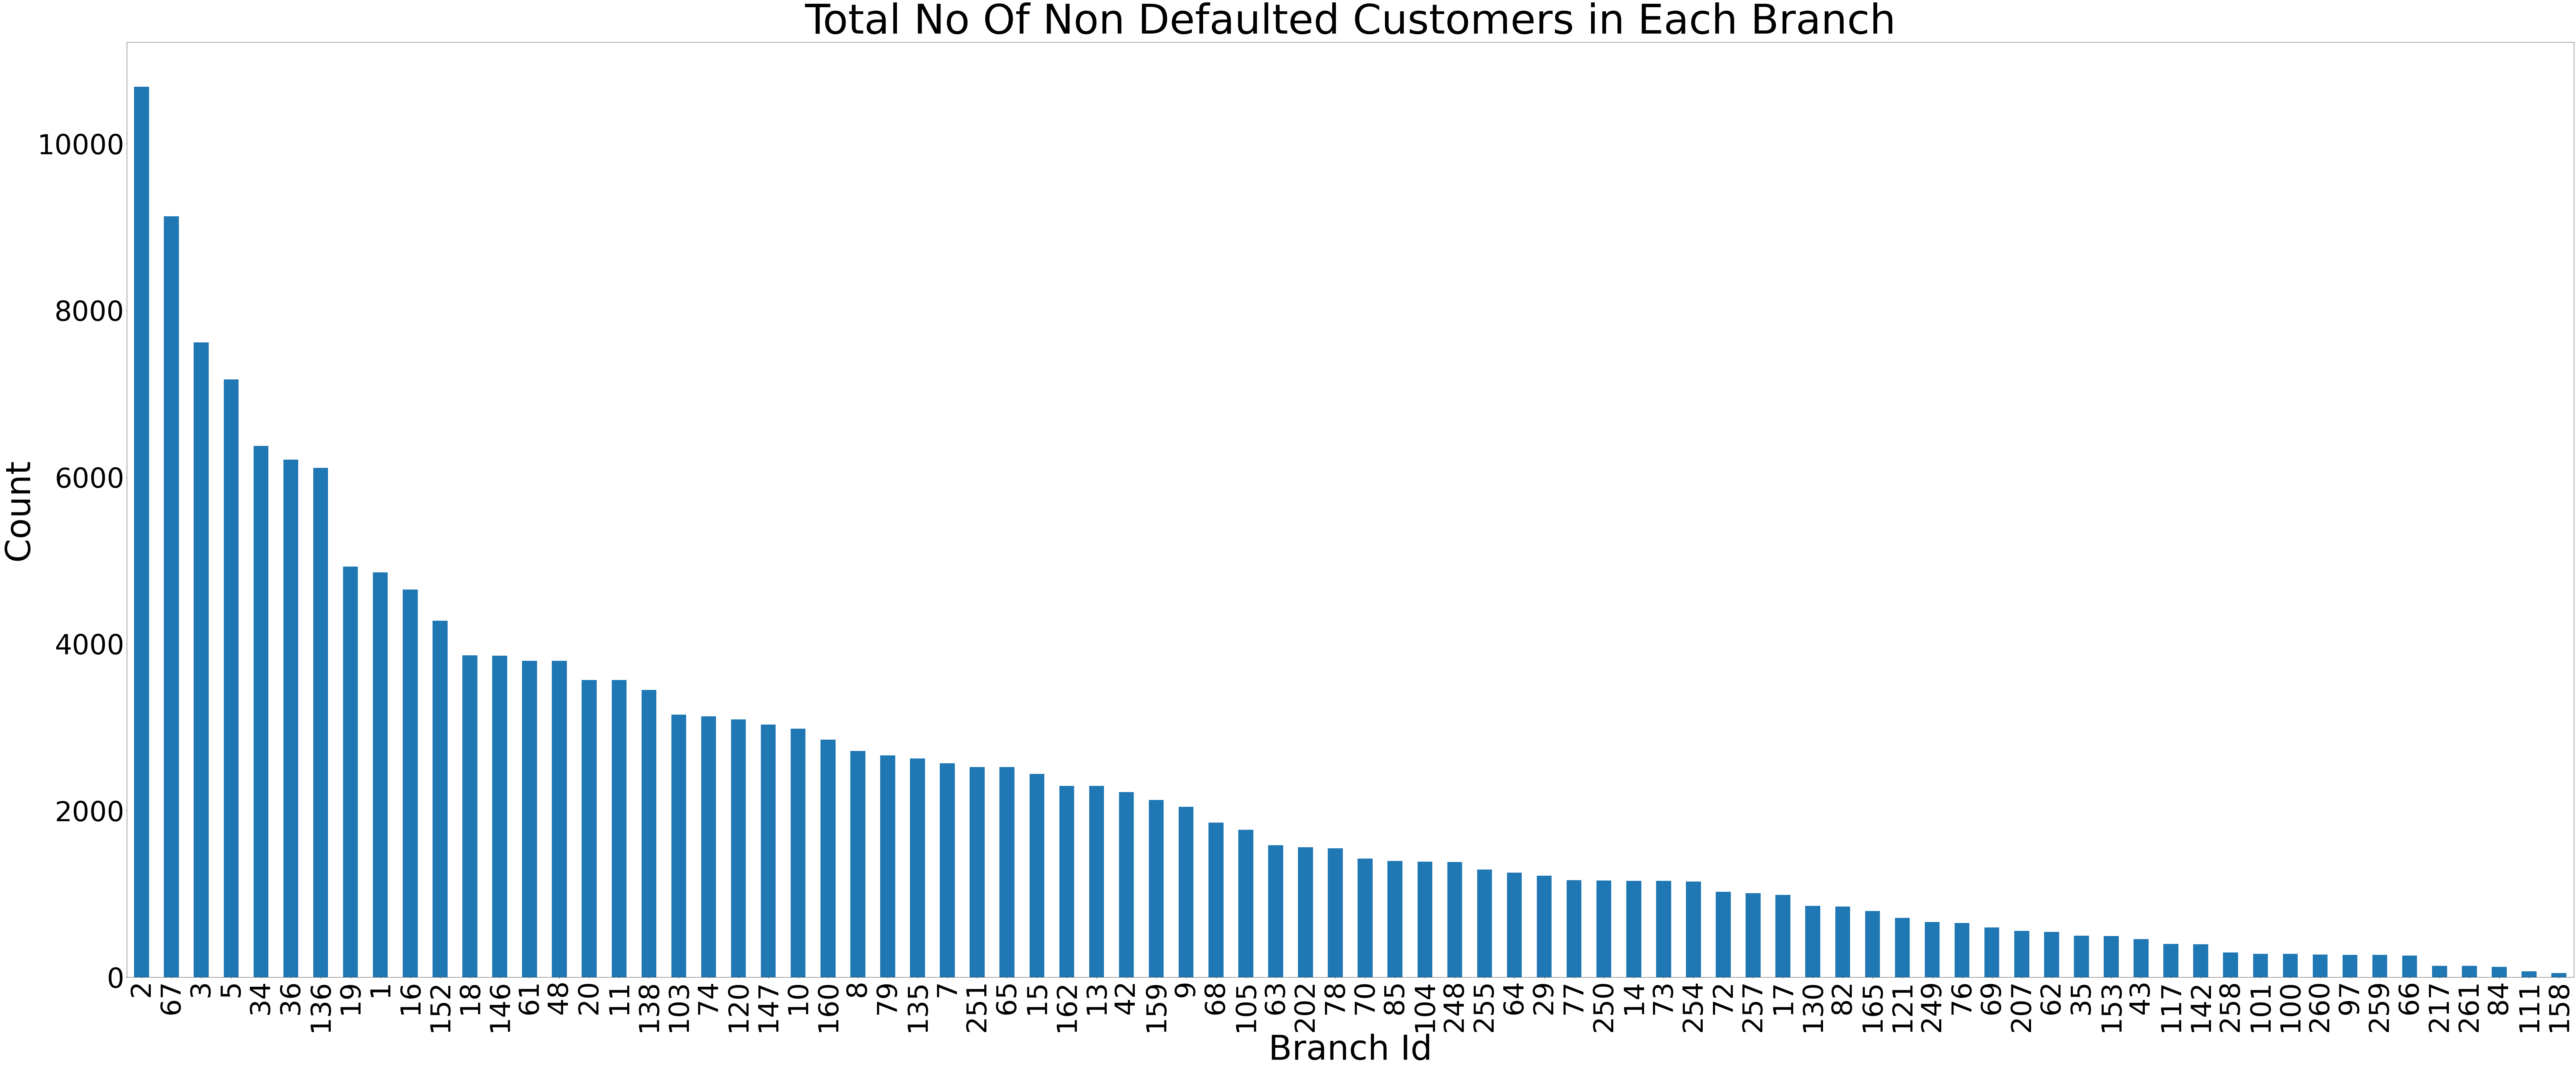

In [ ]:
plt.figure(figsize=(100, 40))
dfDataBranchNonDefaultersSorted.plot.bar()
axes = plt.gca()
axes.xaxis.label.set_size(100)
axes.yaxis.label.set_size(100)
# Adjust padding
plt.tight_layout()
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
#x axis y axis names
plt.xlabel ('Branch Id')
plt.ylabel('Count')
plt.title('Total No Of Non Defaulted Customers in Each Branch', fontsize=120)
# Display
plt.show()

# **Lets us compare Defaulters Vs Non Defaulters for each branch in terms of count**

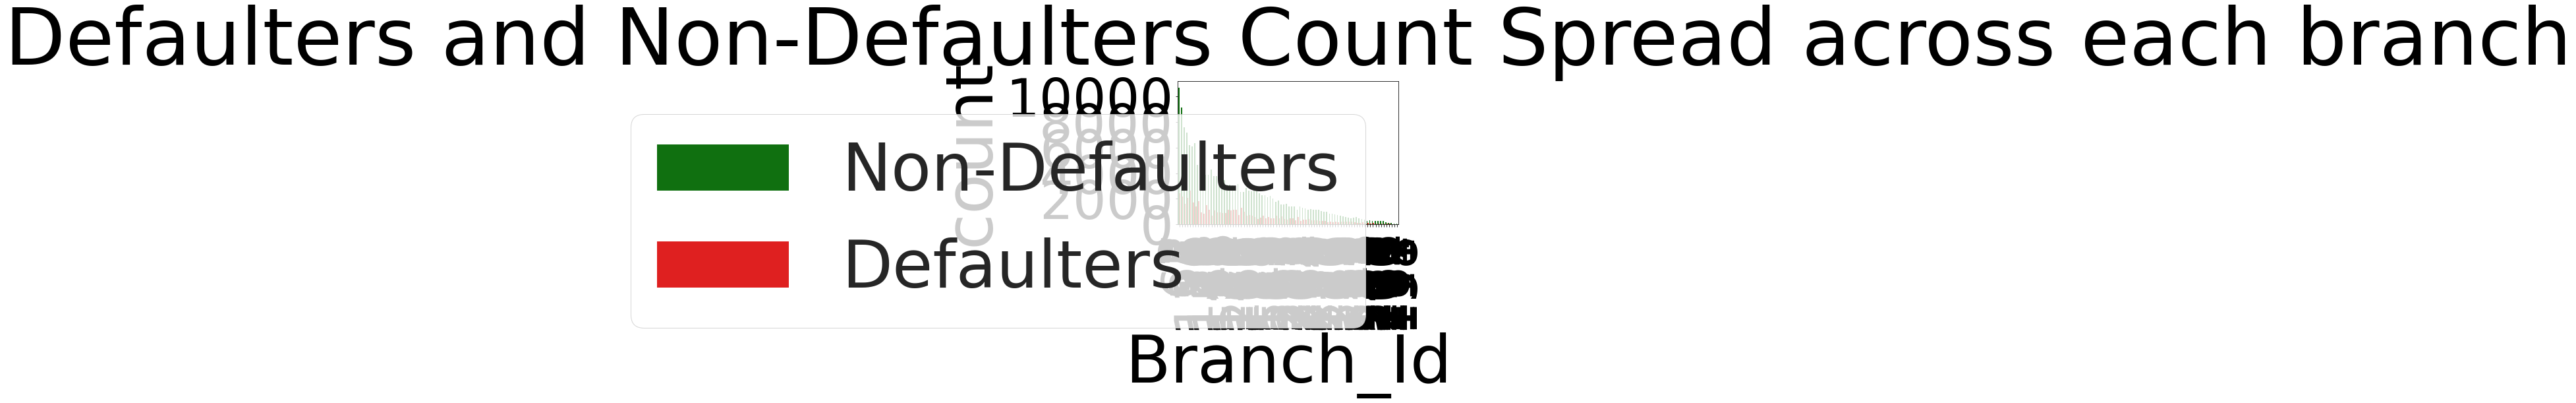

In [ ]:
#set seaborn plotting aesthetics
#create grouped bar chart
sns.countplot(x='Branch_Id' ,hue='Loan_Default', data=data,
            palette=['Green', 'Red'],order=data['Branch_Id'].value_counts().index)

#add overall title
plt.title('Defaulters and Non-Defaulters Count Spread across each branch', fontsize=120)
sns.set(rc={'figure.figsize':(120,40)},style='white')
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
axes = plt.gca()
axes.xaxis.label.set_size(100)
axes.yaxis.label.set_size(100)
plt.legend(['Non-Defaulters', 'Defaulters'],prop={'size': 100},loc=1);
plt.show()



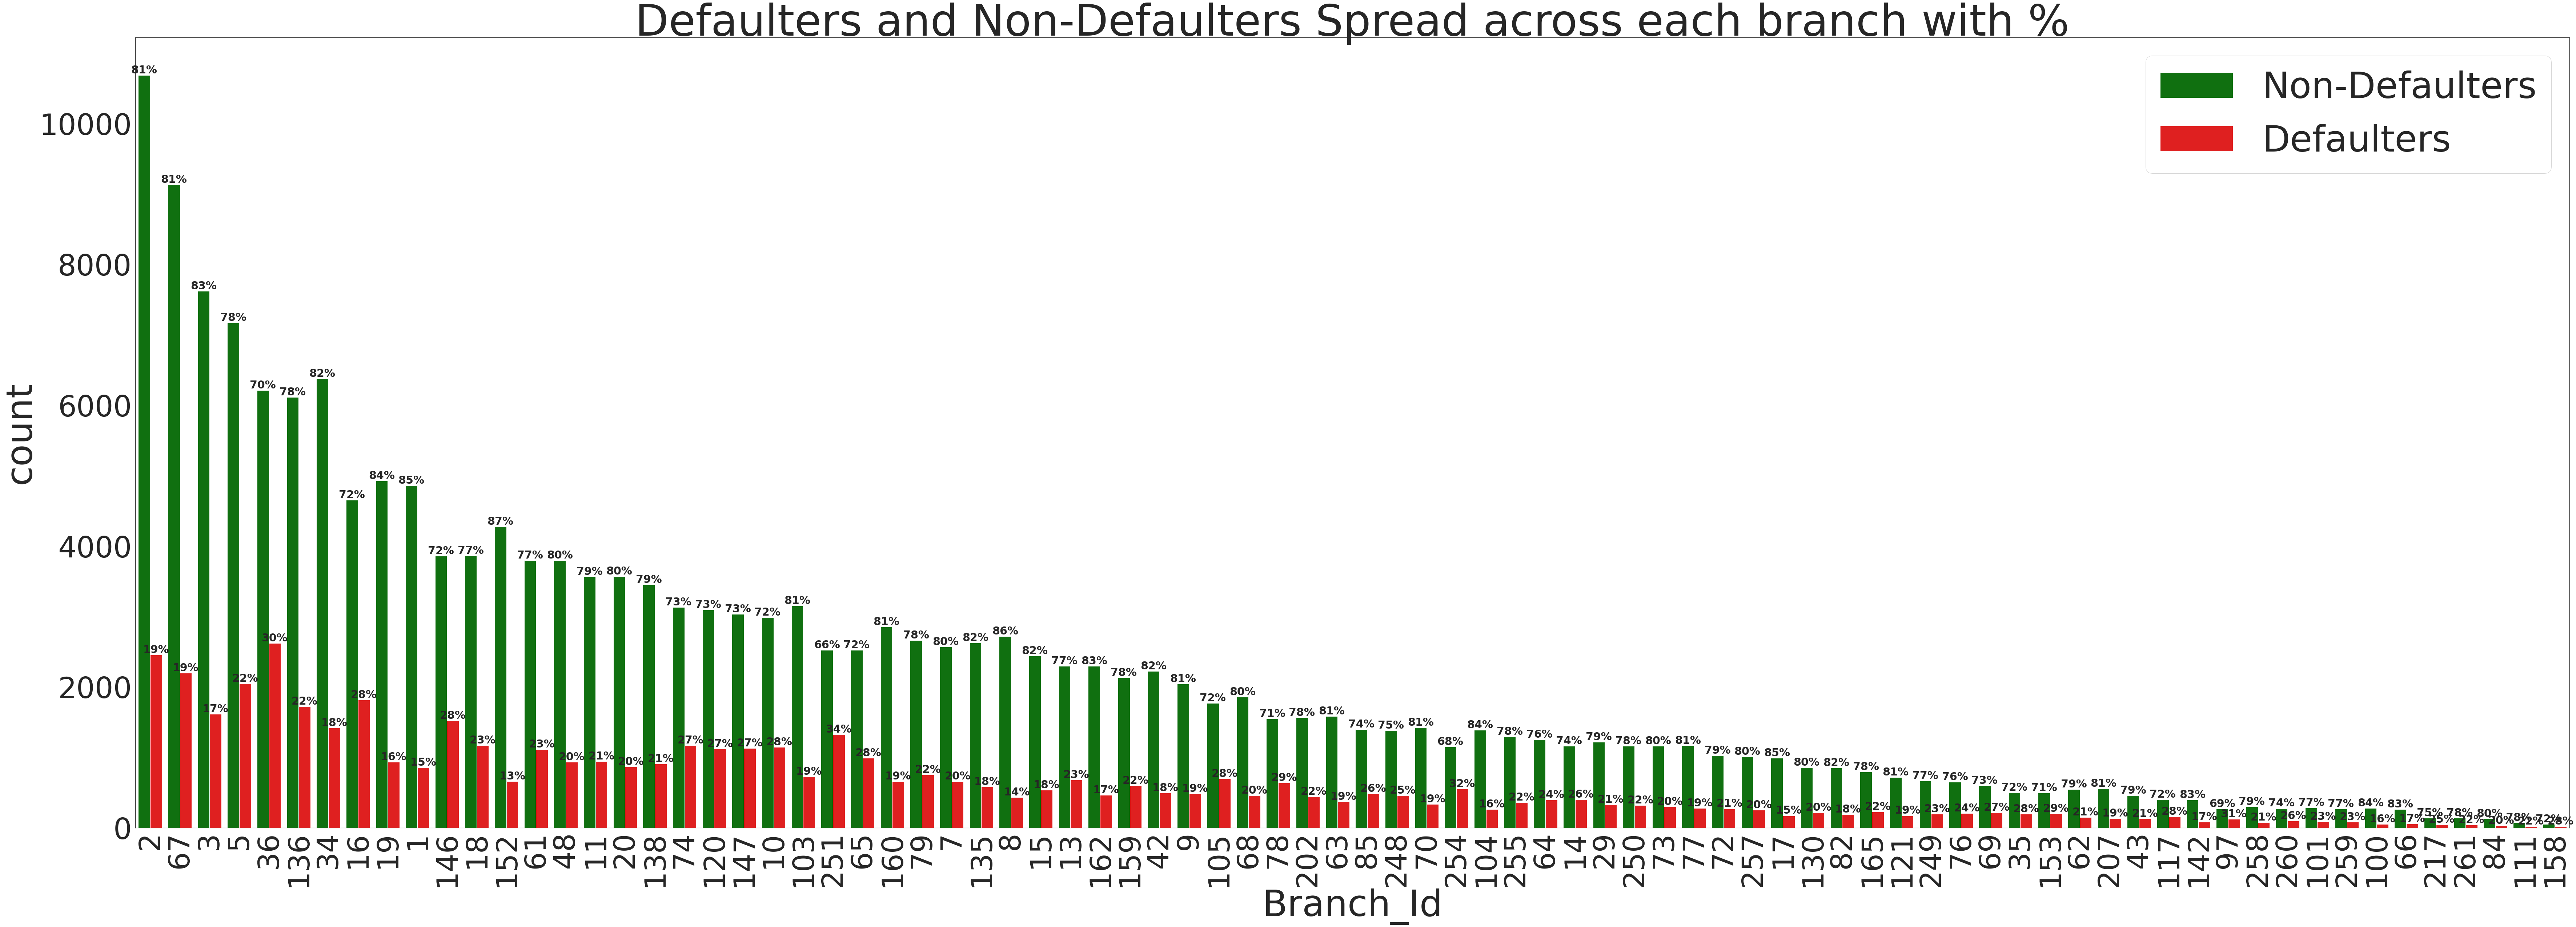

In [ ]:


def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    #bars = ax.sort_values(ascending=False)
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom", size=30,weight="bold")

plt.figure(figsize=(120,40))
ax = sns.countplot(x='Branch_Id' ,hue='Loan_Default', data=data,
            palette=['Green', 'Red'],order=data['Branch_Id'].value_counts().index)
plt.title('Defaulters and Non-Defaulters Spread across each branch with %', fontsize=120)
sns.set(rc={'figure.figsize':(220,40)},style='white')
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.legend(['Non-Defaulters', 'Defaulters'],prop={'size': 100},loc=1);
axes = plt.gca()
axes.xaxis.label.set_size(100)
axes.yaxis.label.set_size(100)
barPerc(data,'Branch_Id',ax)

Even though Branches such as 36,2,67,5,16 tops the defaulters list in terms of count it doesnt mean that chances of getting a defaulter inthose branches as high since that probability depends on the percentage.

# By that logic in my opinion branches with less than or nearly 70% non defaulters are at risk such as 251,254,97,36,78 tops the list and 
# these are the branches which will have the chances of defaulting customers more 

# ***Distribution of Target Var with Employment type ***

In [ ]:
pd.value_counts(data.Employment_Type)

Self employed    135296
Salaried          97858
Name: Employment_Type, dtype: int64

In [ ]:
pd.value_counts(dataDefault.Employment_Type)

Self employed    30701
Salaried         19910
Name: Employment_Type, dtype: int64

In [ ]:
pd.value_counts(dataNonDefault.Employment_Type)

Self employed    104595
Salaried          77948
Name: Employment_Type, dtype: int64

In [ ]:
dataSelfEmployed = data.loc[data['Employment_Type'] == 'Self employed']

In [ ]:
dataSalaried = data.loc[data['Employment_Type'] == 'Salaried']

In [ ]:

dataSelfEmployedDefault = dataSelfEmployed.loc[data['Loan_Default'] == 1]

In [ ]:
dataSelfEmployedNonDefault = dataSelfEmployed.loc[data['Loan_Default'] == 0]

In [ ]:
dataSalariedDefault = dataSalaried.loc[data['Loan_Default'] == 1]

In [ ]:
dataSalariedNonDefault = dataSalaried.loc[data['Loan_Default'] == 0]

Text(0.5, 1.0, 'Salaried')

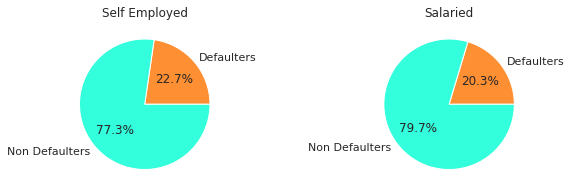

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

selfdefaulterDataCount = dataSelfEmployedDefault.Uniqueid.count()
selfnonDefaulterDataCount = dataSelfEmployedNonDefault.Uniqueid.count()
pieValues1 = [selfdefaulterDataCount,selfnonDefaulterDataCount]
labels = ['Defaulters','Non Defaulters']

saldefaulterDataCount = dataSalariedDefault.Uniqueid.count()
salnonDefaulterDataCount = dataSalariedNonDefault.Uniqueid.count()
pieValues2 = [saldefaulterDataCount,salnonDefaulterDataCount]
colors = ['#FF8F33','#33FFDC']
explode = (0.1, 0)


axs[0].pie(pieValues1,labels = labels, colors = colors, autopct = '%1.1f%%')
axs[0].set_title('Self Employed')
axs[1].pie(pieValues2,labels = labels, colors = colors, autopct = '%1.1f%%')
axs[1].set_title('Salaried')

**More or less the defaulter and non defaulter remains the same and hence we can consider "Employment_Type" doesnt say much about Loan_Default value**

In [ ]:
##Study of age with defaulters and Non Defaulters

In [ ]:
dataDefault['Age']

2         44
7         53
8         46
12        25
18        28
          ..
233125    37
233127    47
233134    42
233138    58
233147    33
Name: Age, Length: 50611, dtype: int64

([<matplotlib.axis.XTick at 0x7f7f9ebd2590>,
 [Text(0, 0, 'Non Defaulters'), Text(0, 0, 'Defaulters')])

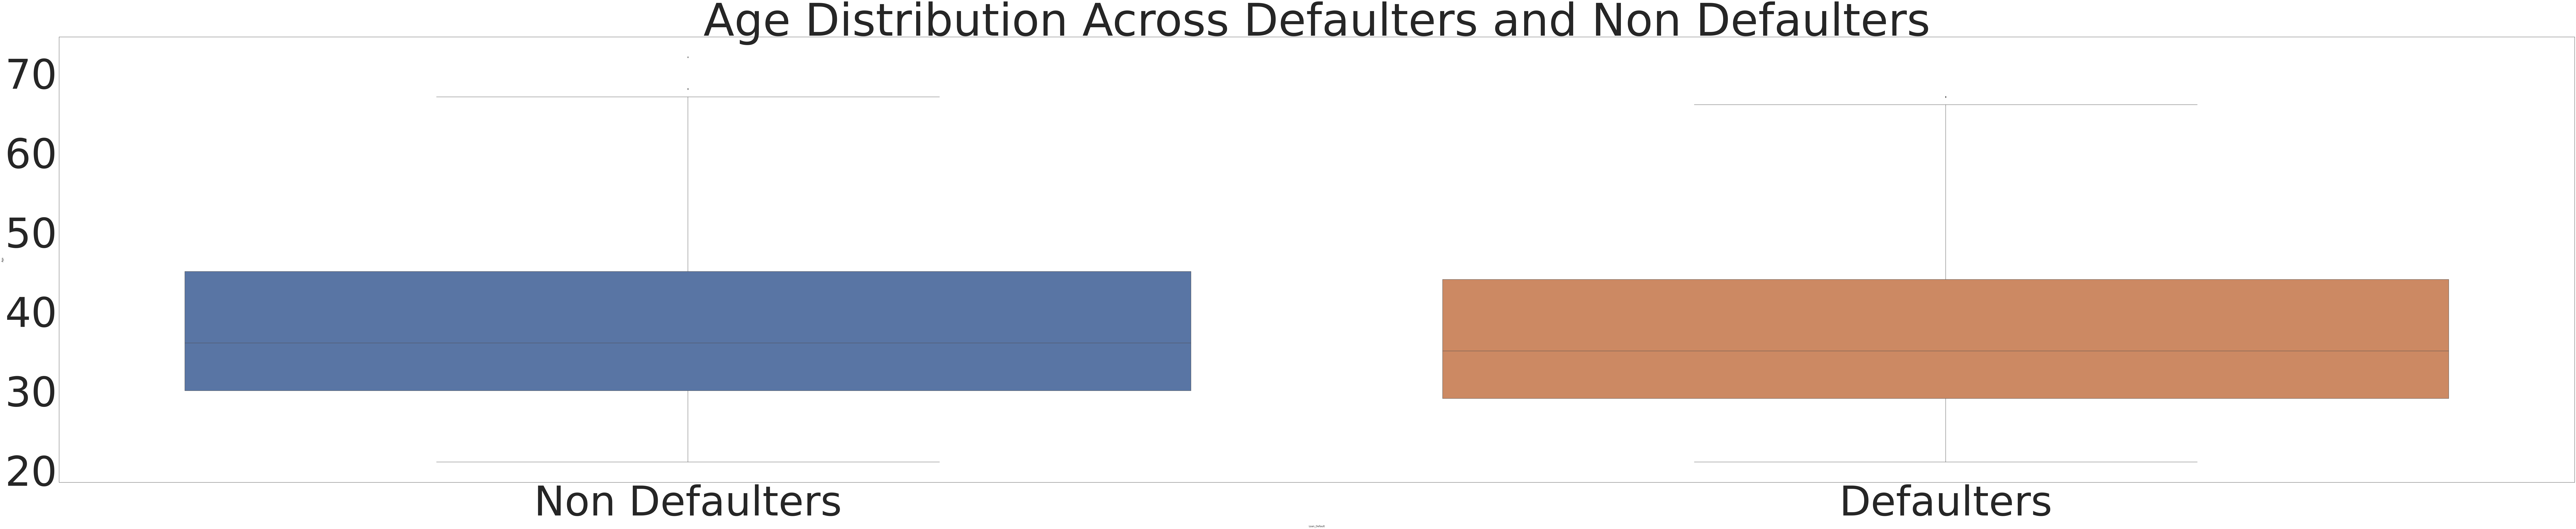

In [ ]:
  
sns.boxplot(x = 'Loan_Default', y = 'Age', data = data)
plt.title('Age Distribution Across Defaulters and Non Defaulters', fontsize=220)
sns.set(rc={'figure.figsize':(220,100)},style='white')
plt.xticks(fontsize=200)
plt.yticks(fontsize=200)
plt.xticks([0, 1], ['Non Defaulters', 'Defaulters'])

# ***Age distribution has almost identical distribution (range of 30-45) and hence does not have impact on the target variable***

In [ ]:
bool_df_loans.nunique()

Mobileno_Avl_Flag    1
Aadhar_Flag          2
Pan_Flag             2
Voterid_Flag         2
Driving_Flag         2
Passport_Flag        2
Loan_Default         2
dtype: int64

**All the customers have mobile number and thus it plays no significance in our analysis**

In [ ]:
(data[["Aadhar_Flag","Pan_Flag","Voterid_Flag", "Driving_Flag","Passport_Flag"]] == 1).sum()

Aadhar_Flag      195924
Pan_Flag          17621
Voterid_Flag      33794
Driving_Flag       5419
Passport_Flag       496
dtype: int64

In [ ]:
(dataDefault[["Aadhar_Flag","Pan_Flag","Voterid_Flag", "Driving_Flag","Passport_Flag"]] == 1).sum()

Aadhar_Flag      41065
Pan_Flag          3877
Voterid_Flag      8816
Driving_Flag      1092
Passport_Flag       74
dtype: int64

In [ ]:
(dataNonDefault[["Aadhar_Flag","Pan_Flag","Voterid_Flag", "Driving_Flag","Passport_Flag"]] == 1).sum()

Aadhar_Flag      154859
Pan_Flag          13744
Voterid_Flag      24978
Driving_Flag       4327
Passport_Flag       422
dtype: int64

In [ ]:
(dataDefault[["Aadhar_Flag","Pan_Flag","Voterid_Flag", "Driving_Flag","Passport_Flag"]] == 1).sum()/(data[["Aadhar_Flag","Pan_Flag","Voterid_Flag", "Driving_Flag","Passport_Flag"]] == 1).sum()*100

Aadhar_Flag      20.959658
Pan_Flag         22.002157
Voterid_Flag     26.087471
Driving_Flag     20.151319
Passport_Flag    14.919355
dtype: float64

In [ ]:
(dataNonDefault[["Aadhar_Flag","Pan_Flag","Voterid_Flag", "Driving_Flag","Passport_Flag"]] == 1).sum()/(data[["Aadhar_Flag","Pan_Flag","Voterid_Flag", "Driving_Flag","Passport_Flag"]] == 1).sum()*100

Aadhar_Flag      79.040342
Pan_Flag         77.997843
Voterid_Flag     73.912529
Driving_Flag     79.848681
Passport_Flag    85.080645
dtype: float64

# ***This clearly shows Customer who submits passport as ID tend to be Non Defaulters and Voter ID has the max chances of being a defaulter***

# ***Aadhar flag is the ID submitted by most customers and Passport is the least submited but passport has a lower chance of defaulting***

In [ ]:
##lets see the graphical distribution of this

In [ ]:
dfAxis = pd.DataFrame({
    'ID': ['Aadhar Card','PAN Card','VoterID','Driving License','Passport'],
    'Defaulter Percentage': round((dataDefault[["Aadhar_Flag","Pan_Flag","Voterid_Flag", "Driving_Flag","Passport_Flag"]] == 1).sum()/(data[["Aadhar_Flag","Pan_Flag","Voterid_Flag", "Driving_Flag","Passport_Flag"]] == 1).sum()*100,2),
    'Non Defaulter Percentage' : round((dataNonDefault[["Aadhar_Flag","Pan_Flag","Voterid_Flag", "Driving_Flag","Passport_Flag"]] == 1).sum()/(data[["Aadhar_Flag","Pan_Flag","Voterid_Flag", "Driving_Flag","Passport_Flag"]] == 1).sum()*100,2)
    })

In [ ]:
dfAxis

ID  Defaulter Percentage  Non Defaulter Percentage
Aadhar_Flag        Aadhar Card                 20.96                     79.04
Pan_Flag              PAN Card                 22.00                     78.00
Voterid_Flag           VoterID                 26.09                     73.91
Driving_Flag   Driving License                 20.15                     79.85
Passport_Flag         Passport                 14.92                     85.08

In [ ]:
ax = plt.subplot()
ax.bar(dfAxis["ID"], dfAxis["Non Defaulter Percentage"],color="green")
ax.bar(dfAxis["ID"], dfAxis["Defaulter Percentage"], color="maroon")
plt.title('Percentage of Defaulters and Non Defaulters for each ID submitted', fontsize=120)
plt.xticks(fontsize=130)
plt.yticks(fontsize=80)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.legend(['Non-Defaulters', 'Defaulters'],prop={'size': 50},loc=2);
axes = plt.gca()
axes.xaxis.label.set_size(100)
axes.yaxis.label.set_size(100)


In [ ]:
##this graph shows VoterID has the highest percentage of defaulters and passport has a high suceess rate when one ID is submitted

***Let us take if more ID's are submitted will see if it has connection to Target Variable***


In [ ]:
dfOneId = data.loc[(data['Aadhar_Flag'] == 1) | (data['Pan_Flag'] == 1) | (data['Voterid_Flag'] == 1) |
(data['Driving_Flag'] == 1) | (data['Passport_Flag'] == 1) ]

In [ ]:
dfOneId.Uniqueid.count()

233154

In [ ]:
dfTwoID =  data.loc[((data['Aadhar_Flag'] == 1) & (data['Pan_Flag'] == 1)) 
| ((data['Aadhar_Flag'] == 1) & (data['Voterid_Flag'] == 1))
| ((data['Aadhar_Flag'] == 1) & (data['Driving_Flag'] == 1))
| ((data['Aadhar_Flag'] == 1) & (data['Passport_Flag'] == 1))
| ((data['Pan_Flag'] == 1) & (data['Voterid_Flag'] == 1))
| ((data['Pan_Flag'] == 1) & (data['Driving_Flag'] == 1))
| ((data['Pan_Flag'] == 1) & (data['Passport_Flag'] == 1))
| ((data['Voterid_Flag'] == 1) & (data['Driving_Flag'] == 1))
| ((data['Voterid_Flag'] == 1) & (data['Passport_Flag'] == 1))
| ((data['Driving_Flag'] == 1) & (data['Passport_Flag'] == 1))]
 

In [ ]:
dfTwoID.Uniqueid.count()

19765

In [ ]:
dfThreeID = data.loc[((data['Aadhar_Flag'] == 1) & (data['Pan_Flag'] == 1) & (data['Voterid_Flag'] == 1))
|((data['Aadhar_Flag'] == 1) & (data['Pan_Flag'] == 1) & (data['Driving_Flag'] == 1))
| ((data['Aadhar_Flag'] == 1) & (data['Pan_Flag'] == 1) & (data['Passport_Flag'] == 1))
| ((data['Aadhar_Flag'] == 1) & (data['Voterid_Flag'] == 1) & (data['Driving_Flag'] == 1))
| ((data['Aadhar_Flag'] == 1) & (data['Voterid_Flag'] == 1) & (data['Passport_Flag'] == 1))
| ((data['Aadhar_Flag'] == 1) & (data['Driving_Flag'] == 1) & (data['Passport_Flag'] == 1))
| ((data['Pan_Flag'] == 1) & (data['Voterid_Flag'] == 1) & (data['Driving_Flag'] == 1))
| ((data['Pan_Flag'] == 1) & (data['Voterid_Flag'] == 1) & (data['Passport_Flag'] == 1))
| ((data['Voterid_Flag'] == 1) & (data['Driving_Flag'] == 1) & (data['Passport_Flag'] == 1))]

In [ ]:
dfThreeID

Uniqueid  Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
1011     436532             49503       69975  74.60         3       17038   
1057     637988             56459       70998  84.51         3       17038   
1131     591680             57013       79557  74.16        42       23132   
1442     521929             41430       68720  61.44        36       15077   
2536     601705             51003       69014  74.91         9       22888   
...         ...               ...         ...    ...       ...         ...   
230276   474872             62213       88278  72.50         3       22808   
230638   545955             43894       52001  86.54        79       23372   
230639   418178             52578       62469  86.44        79       23372   
230753   454671             32484       44323  76.71         3       18165   
232306   517113             42002       60000  73.33         3       18125   

       Manufacturer_Id Employment_Type Disbursaldate State_Id  ...  \
1011                51   Self employed    2018-08-13       15  ...   
1057                51        Salaried    2018-10-29        1  ...   
1131                45   Self employed    2018-10-20        3  ...   
1442                86        Salaried    2018-09-20       13  ...   
2536                49   Self employed    2018-10-22        3  ...   
...                ...             ...           ...      ...  ...   
230276              51   Self employed    2018-08-29        1  ...   
230638              86        Salaried    2018-09-28       18  ...   
230639              86        Salaried    2018-08-01       18  ...   
230753              51        Salaried    2018-08-22       15  ...   
232306              45   Self employed    2018-09-19        1  ...   

        Driving_Flag  Passport_Flag  New_Accts_In_Last_Six_Months  \
1011            True          False                             0   
1057           False          False                             0   
1131           False          False                             0   
1442            True          False                             0   
2536            True          False                             0   
...              ...            ...                           ...   
230276         False           True                             1   
230638         False          False                             1   
230639         False          False                             1   
230753         False          False                             1   
232306          True          False                             0   

        Delinquent_Accts_In_Last_Six_Months  Average_Acct_Age  \
1011                                      0              0.00   
1057                                      0              0.00   
1131                                      0              0.00   
1442                                      0              0.00   
2536                                      0              0.00   
...                                     ...               ...   
230276                                    0              0.00   
230638                                    0              0.08   
230639                                    0              0.00   
230753                                    0              0.08   
232306                                    0              0.50   

        Credit_History_Length  No_Of_Inquiries  Loan_Default  Age  \
1011                     0.00                0         False   35   
1057                     0.00                0          True   36   
1131                     0.00                0         False   30   
1442                     0.00                0          True   37   
2536                     0.00                0         False   35   
...                       ...              ...           ...  ...   
230276                   0.00                0         False   26   
230638                   0.08                1         False   28  

In [ ]:
dfFourID = data.loc[((data['Aadhar_Flag'] == 1) & (data['Pan_Flag'] == 1) & (data['Voterid_Flag'] == 1) & (data['Driving_Flag'] == 1))
| ((data['Aadhar_Flag'] == 1) & (data['Pan_Flag'] == 1) & (data['Voterid_Flag'] == 1) & (data['Passport_Flag'] == 1))
| ((data['Pan_Flag'] == 1) & (data['Voterid_Flag'] == 1) & (data['Driving_Flag'] == 1) & (data['Passport_Flag'] == 1))]

In [ ]:
dfFourID

Uniqueid  Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
118425   603021             28429       60774  47.72       135       22239   
122078   493240             45939       62050  78.97         3       16277   
123644   619827             73617       83767  89.41       135       22002   
166941   635358             73217       83323  89.41       135       22002   

       Manufacturer_Id Employment_Type Disbursaldate State_Id  ...  \
118425              48        Salaried    2018-10-23        4  ...   
122078              45   Self employed    2018-09-06       15  ...   
123644             120   Self employed    2018-10-25        4  ...   
166941             120        Salaried    2018-10-29        4  ...   

        Driving_Flag  Passport_Flag  New_Accts_In_Last_Six_Months  \
118425          True          False                             0   
122078          True          False                             0   
123644          True          False                             0   
166941         False           True                             0   

        Delinquent_Accts_In_Last_Six_Months  Average_Acct_Age  \
118425                                    0              2.00   
122078                                    0              0.58   
123644                                    1              0.50   
166941                                    0              1.17   

        Credit_History_Length  No_Of_Inquiries  Loan_Default  Age  \
118425                   2.00                0         False   30   
122078                   0.58                0         False   37   
123644                   0.58                1         False   30   
166941                   1.42                0          True   31   

        Customer_Status  
118425    Non Defaulter  
122078    Non Defaulter  
123644    Non Defaulter  
166941        Defaulter  

[4 rows x 24 columns]

**There are only 4 customers with 4 id's presented and hence can be ignored**

In [ ]:
dfAllId = data.loc[(data['Aadhar_Flag'] == 1) & (data['Pan_Flag'] == 1) & (data['Voterid_Flag'] == 1) & (data['Driving_Flag'] == 1)& (data['Passport_Flag']==1)]

In [ ]:
dfAllId

Empty DataFrame
Columns: [Uniqueid, Disbursed_Amount, Asset_Cost, Ltv, Branch_Id, Supplier_Id, Manufacturer_Id, Employment_Type, Disbursaldate, State_Id, Mobileno_Avl_Flag, Aadhar_Flag, Pan_Flag, Voterid_Flag, Driving_Flag, Passport_Flag, New_Accts_In_Last_Six_Months, Delinquent_Accts_In_Last_Six_Months, Average_Acct_Age, Credit_History_Length, No_Of_Inquiries, Loan_Default, Age, Customer_Status]
Index: []

[0 rows x 24 columns]

**There are no customers with all ID's submitted and hence we can ignore that**

In [ ]:
dataOneIDDefault = dfOneId.loc[data['Loan_Default'] == 1]
dataOneIDNonDefault = dfOneId.loc[data['Loan_Default'] == 0]
dataTwoIDDefault = dfTwoID.loc[data['Loan_Default'] == 1]
dataTwoIDNonDefault = dfTwoID.loc[data['Loan_Default'] == 0]
dataThreeIDDefault = dfThreeID.loc[data['Loan_Default'] == 1]
dataThreeIDNonDefault = dfThreeID.loc[data['Loan_Default'] == 0]

In [ ]:
dataThreeIDNonDefault.Uniqueid.count()

276

Text(0.5, 1.0, 'Three ID')

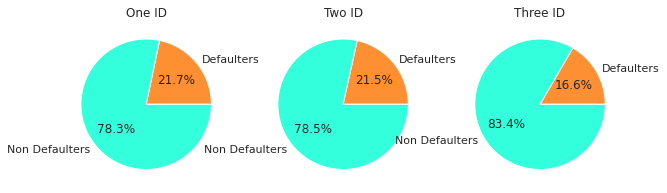

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
pieValuesA = [dataOneIDDefault.Uniqueid.count(),dataOneIDNonDefault.Uniqueid.count()]
pieValuesB = [dataTwoIDDefault.Uniqueid.count(),dataTwoIDNonDefault.Uniqueid.count()]
pieValuesC = [dataThreeIDDefault.Uniqueid.count(),dataThreeIDNonDefault.Uniqueid.count()]

colors = ['#FF8F33','#33FFDC']
explode = (0.1, 0)
labels = ['Defaulters','Non Defaulters']

axs[0].pie(pieValuesA,labels = labels, colors = colors, autopct = '%1.1f%%')
axs[0].set_title('One ID')
axs[1].pie(pieValuesB,labels = labels, colors = colors, autopct = '%1.1f%%')
axs[1].set_title('Two ID')
axs[2].pie(pieValuesC,labels = labels, colors = colors, autopct = '%1.1f%%')
axs[2].set_title('Three ID')


# We see there is a decrease in Defaulter perentage if more ID's are submitted.

# Defaulter Percentage for One ID : 21.7%
# Defaulter Percentage for Two ID : 21.5%
# Defaulter Percentage for Three ID : 16.6% 

Hence if more id's are submitted chance of defaulting decreases

Study Of Manufacturer ID

In [ ]:
dfDataManufacturerAll = data.groupby(['Manufacturer_Id'],sort=False)['Manufacturer_Id'].count()
dfDataManufacturerAllSorted = dfDataManufacturerAll.sort_values( ascending=False)
dfDataManufacturerAllSorted

Manufacturer_Id
86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: Manufacturer_Id, dtype: int64

# Since 153,152,156 has very less data, lets drop them since they wont play a significant factor in the data analysis

In [ ]:
dfDataManufacturerAllSorted.drop(dfDataManufacturerAllSorted.tail(3).index,inplace=True) # drop last 3 rows

In [ ]:
dfDataManufacturerAllSorted

Manufacturer_Id
86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
Name: Manufacturer_Id, dtype: int64

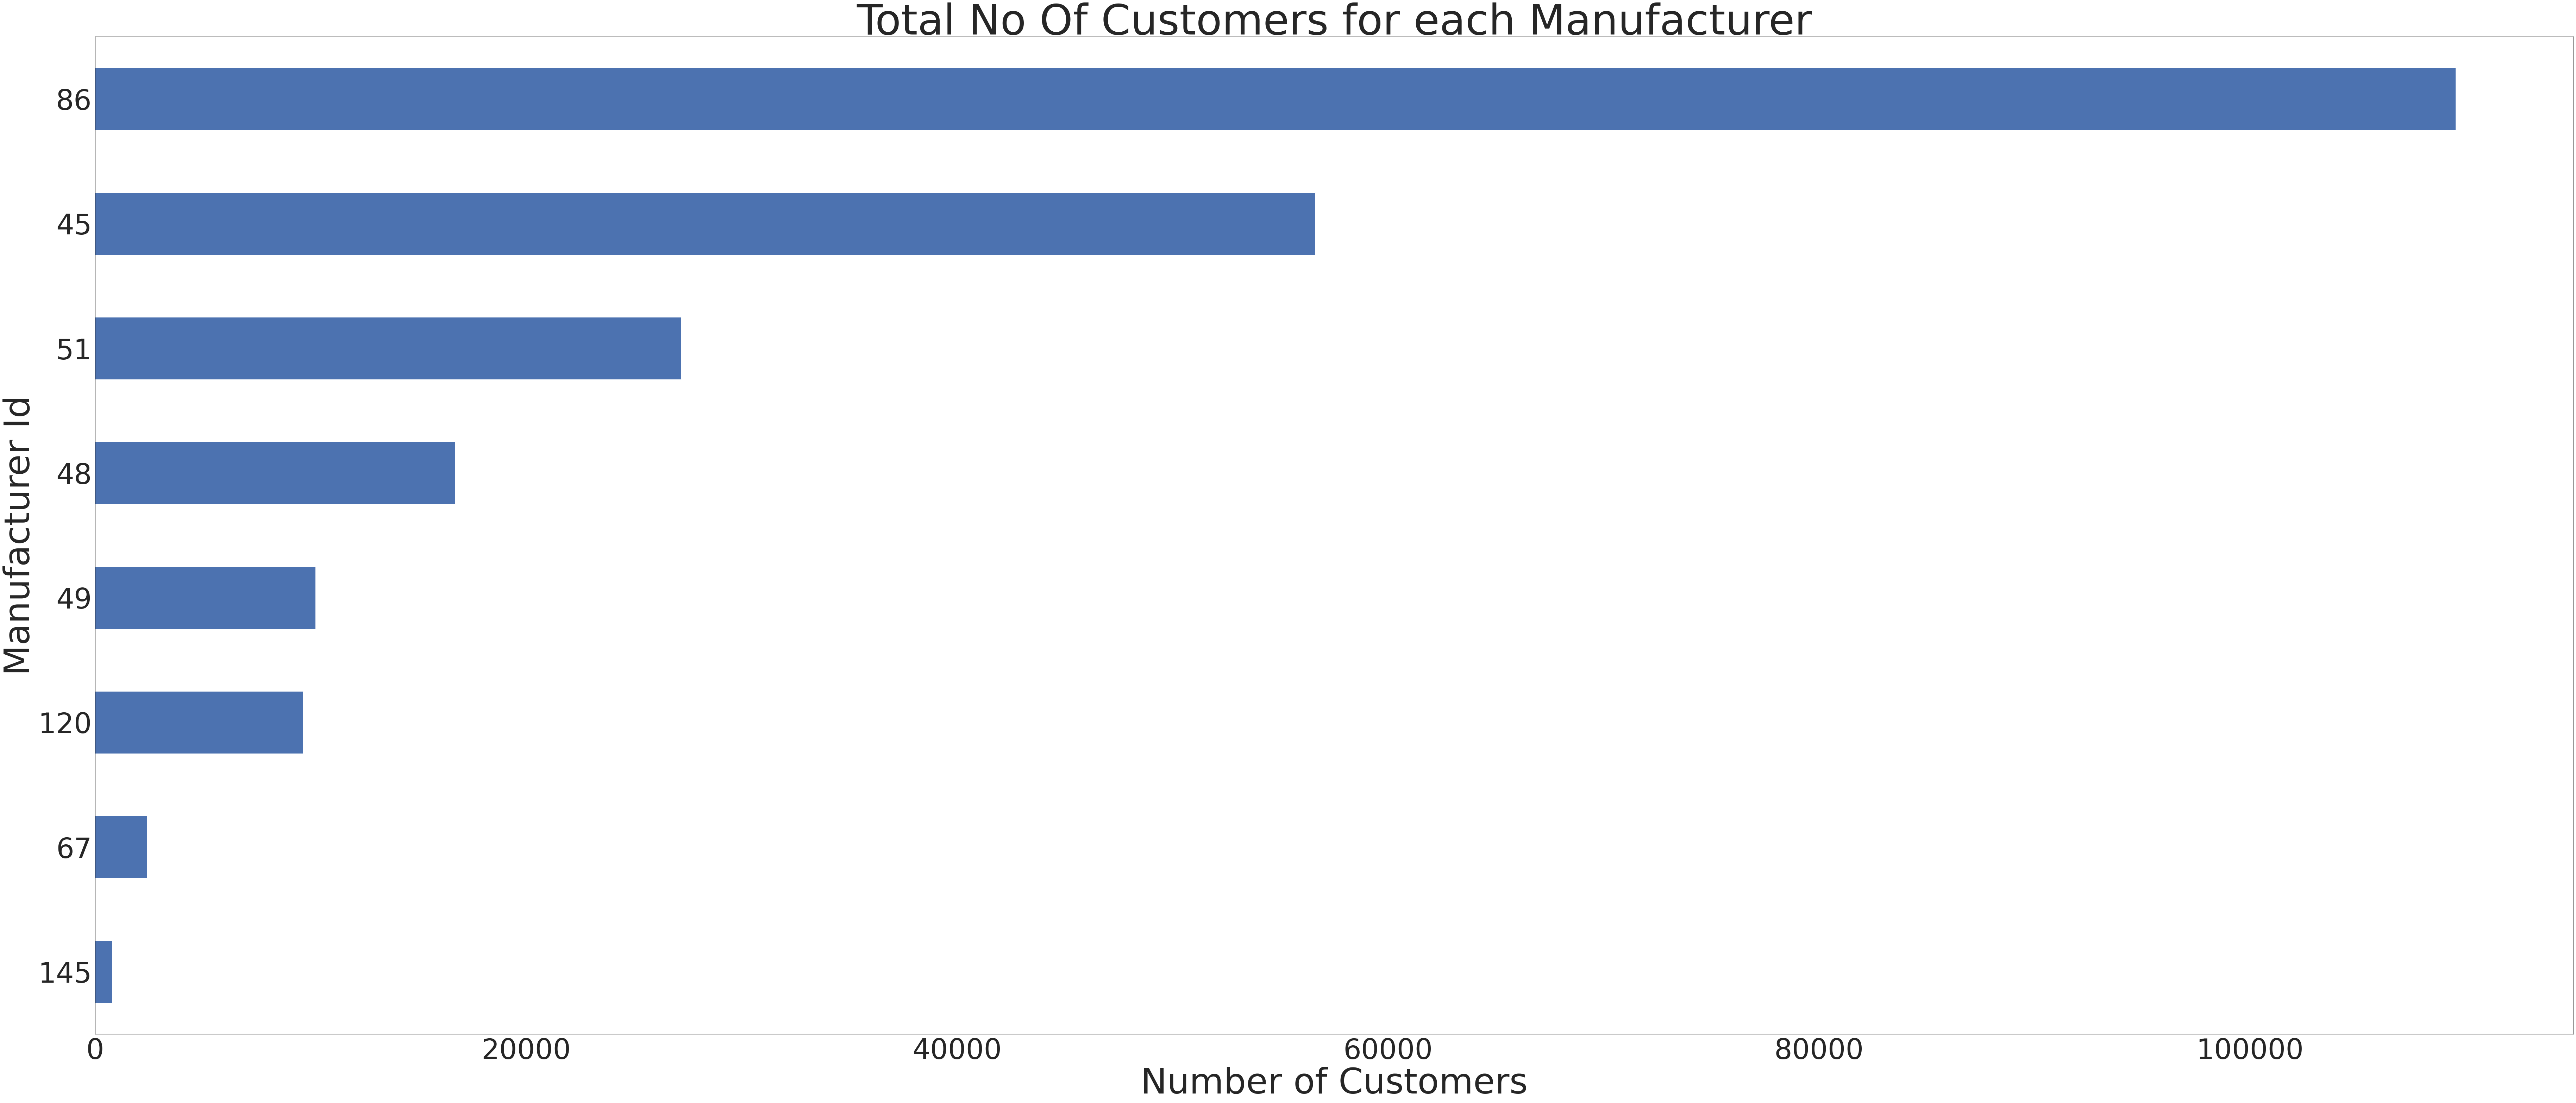

In [ ]:
plt.figure(figsize=(100, 40))
ax = dfDataManufacturerAllSorted.plot.barh()
ax.invert_yaxis()
axes = plt.gca()
axes.xaxis.label.set_size(100)
axes.yaxis.label.set_size(100)
# Adjust padding
plt.tight_layout()
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
#x axis y axis names
plt.xlabel ('Number of Customers')
plt.ylabel('Manufacturer Id')
plt.title('Total No Of Customers for each Manufacturer', fontsize=120)
# Display
plt.show()

In [ ]:
dfManufacturerDefaulters = dataDefault.groupby(['Manufacturer_Id'],sort=False)['Manufacturer_Id'].count()
dfManufacturerDefaultersSorted = dfManufacturerDefaulters.sort_values( ascending=False)
dfManufacturerDefaultersSorted

Manufacturer_Id
86     22410
45     12939
51      5657
48      4554
49      2236
120     2132
67       523
145      156
153        4
Name: Manufacturer_Id, dtype: int64

# Lets drop 153 since the count is negligible

In [ ]:
dfManufacturerDefaultersSorted.drop(dfManufacturerDefaultersSorted.tail(1).index,inplace=True) # drop last 1 row

In [ ]:
dfManufacturerDefaultersSorted

Manufacturer_Id
86     22410
45     12939
51      5657
48      4554
49      2236
120     2132
67       523
145      156
Name: Manufacturer_Id, dtype: int64

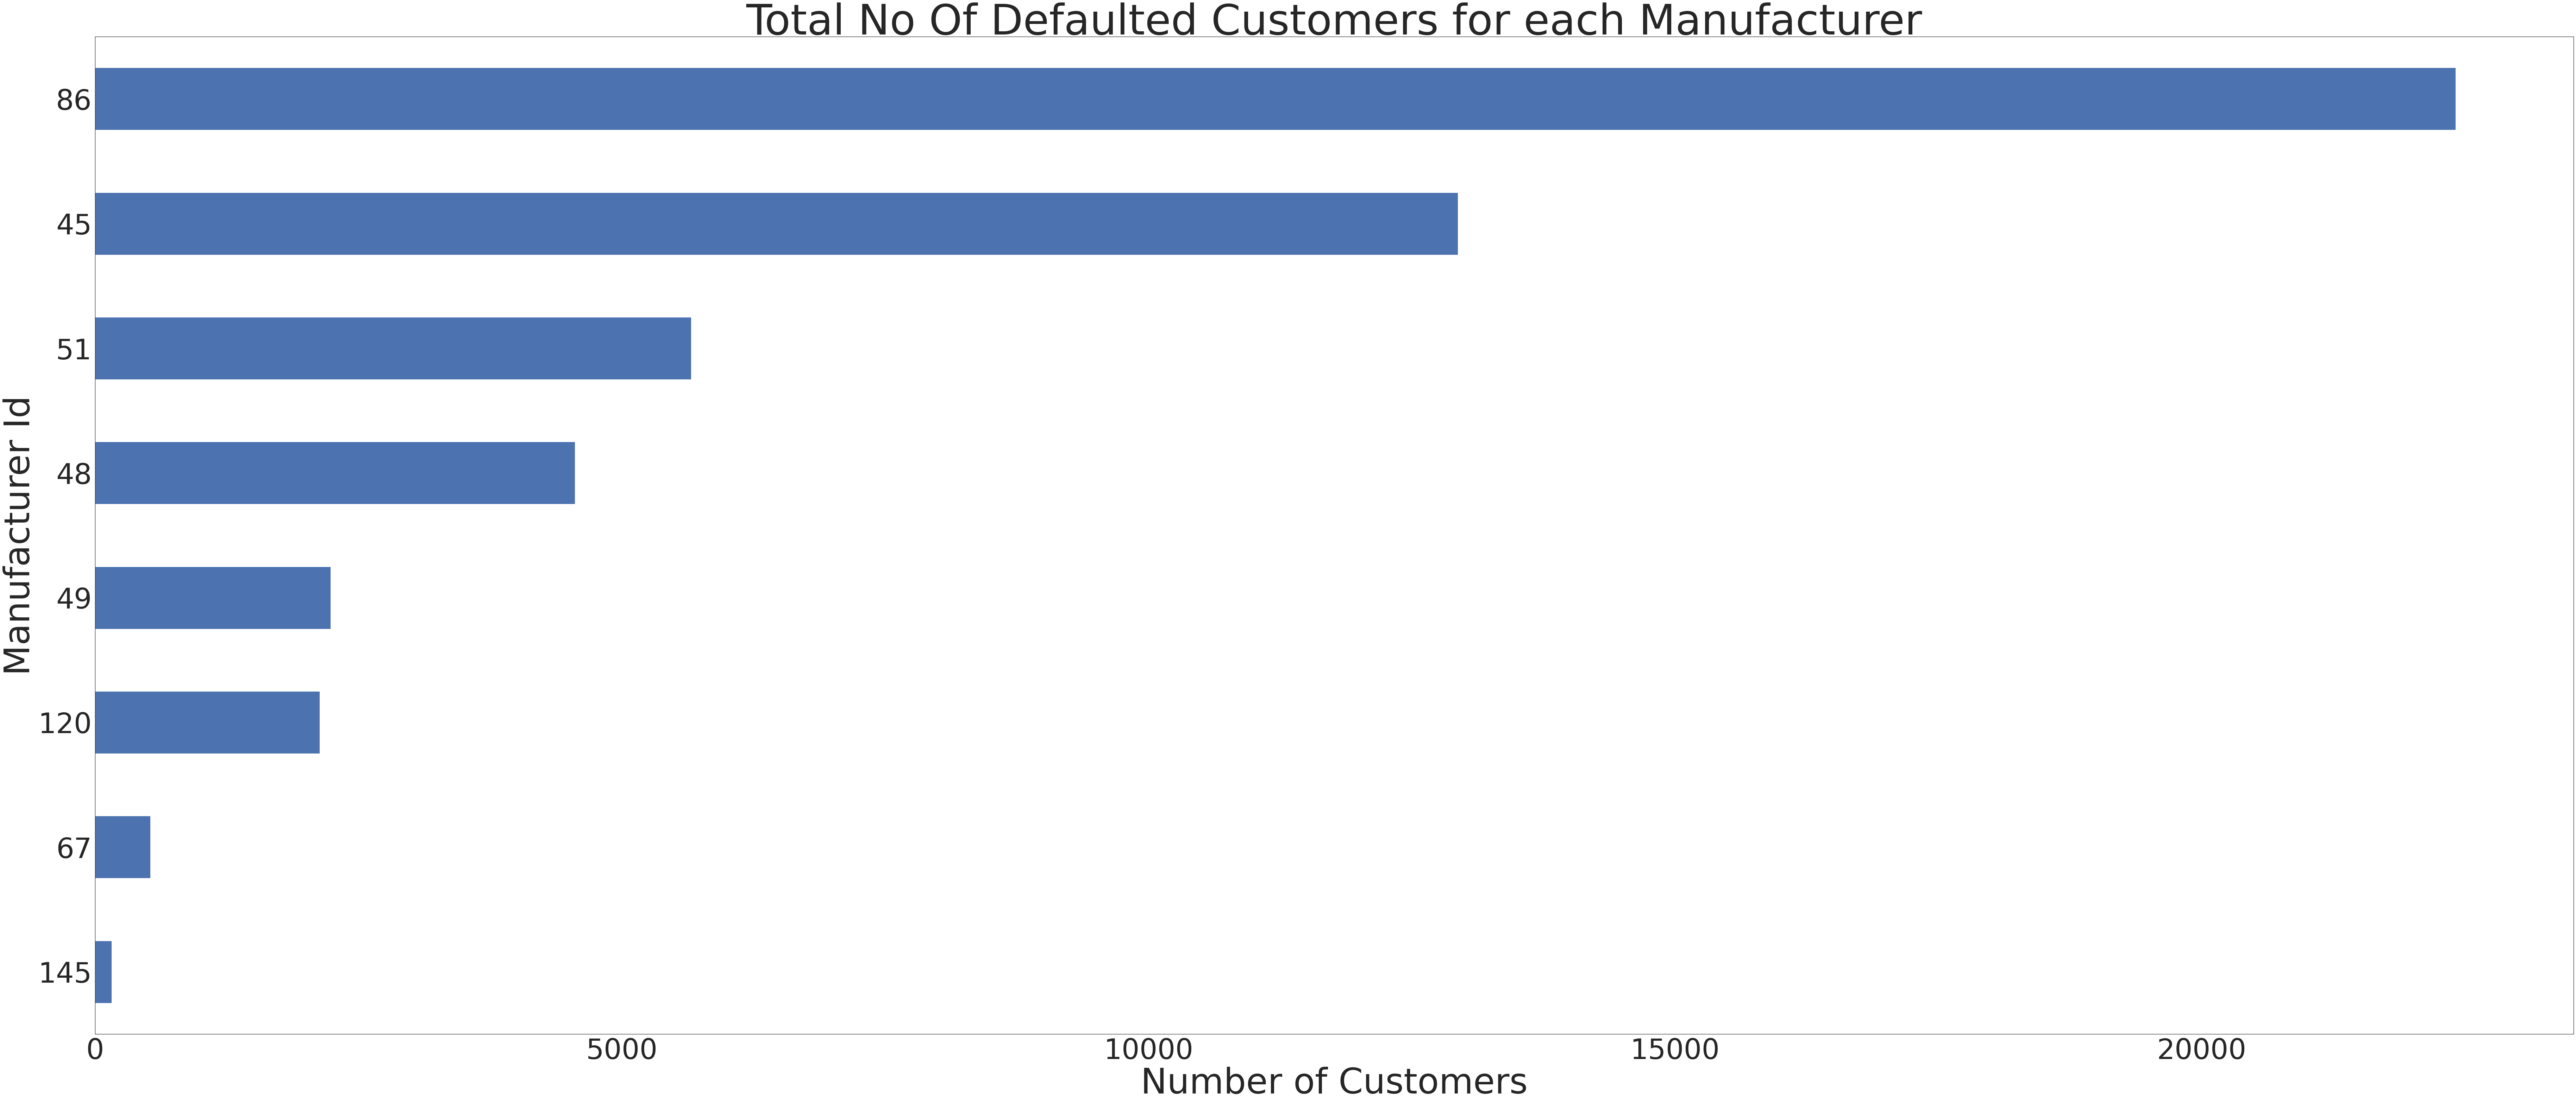

In [ ]:
plt.figure(figsize=(100, 40))
ax = dfManufacturerDefaultersSorted.plot.barh()
ax.invert_yaxis()
axes = plt.gca()
axes.xaxis.label.set_size(100)
axes.yaxis.label.set_size(100)
# Adjust padding
plt.tight_layout()
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
#x axis y axis names
plt.xlabel ('Number of Customers')
plt.ylabel('Manufacturer Id')
plt.title('Total No Of Defaulted Customers for each Manufacturer', fontsize=120)
# Display
plt.show()


 Manufacturer's ID 
1.   152
2.   156
 Doesnt have any defaulters since the total count is very less


In [ ]:
dfDataManufacturesNonDefaulters = dataNonDefault.groupby(['Manufacturer_Id'],sort=False)['Manufacturer_Id'].count()
dfDataManufacturesNonDefaultersSorted = dfDataManufacturesNonDefaulters.sort_values( ascending=False)
dfDataManufacturesNonDefaultersSorted

Manufacturer_Id
86     87124
45     43687
51     21547
48     12156
49      7984
120     7526
67      1882
145      622
153        8
152        6
156        1
Name: Manufacturer_Id, dtype: int64

# Lets drop 153,152,156 because of the negligible count

In [ ]:
dfDataManufacturesNonDefaultersSorted.drop(dfDataManufacturesNonDefaultersSorted.tail(3).index,inplace=True) # drop last 1 row

In [ ]:
dfDataManufacturesNonDefaultersSorted

Manufacturer_Id
86     87124
45     43687
51     21547
48     12156
49      7984
120     7526
67      1882
145      622
Name: Manufacturer_Id, dtype: int64

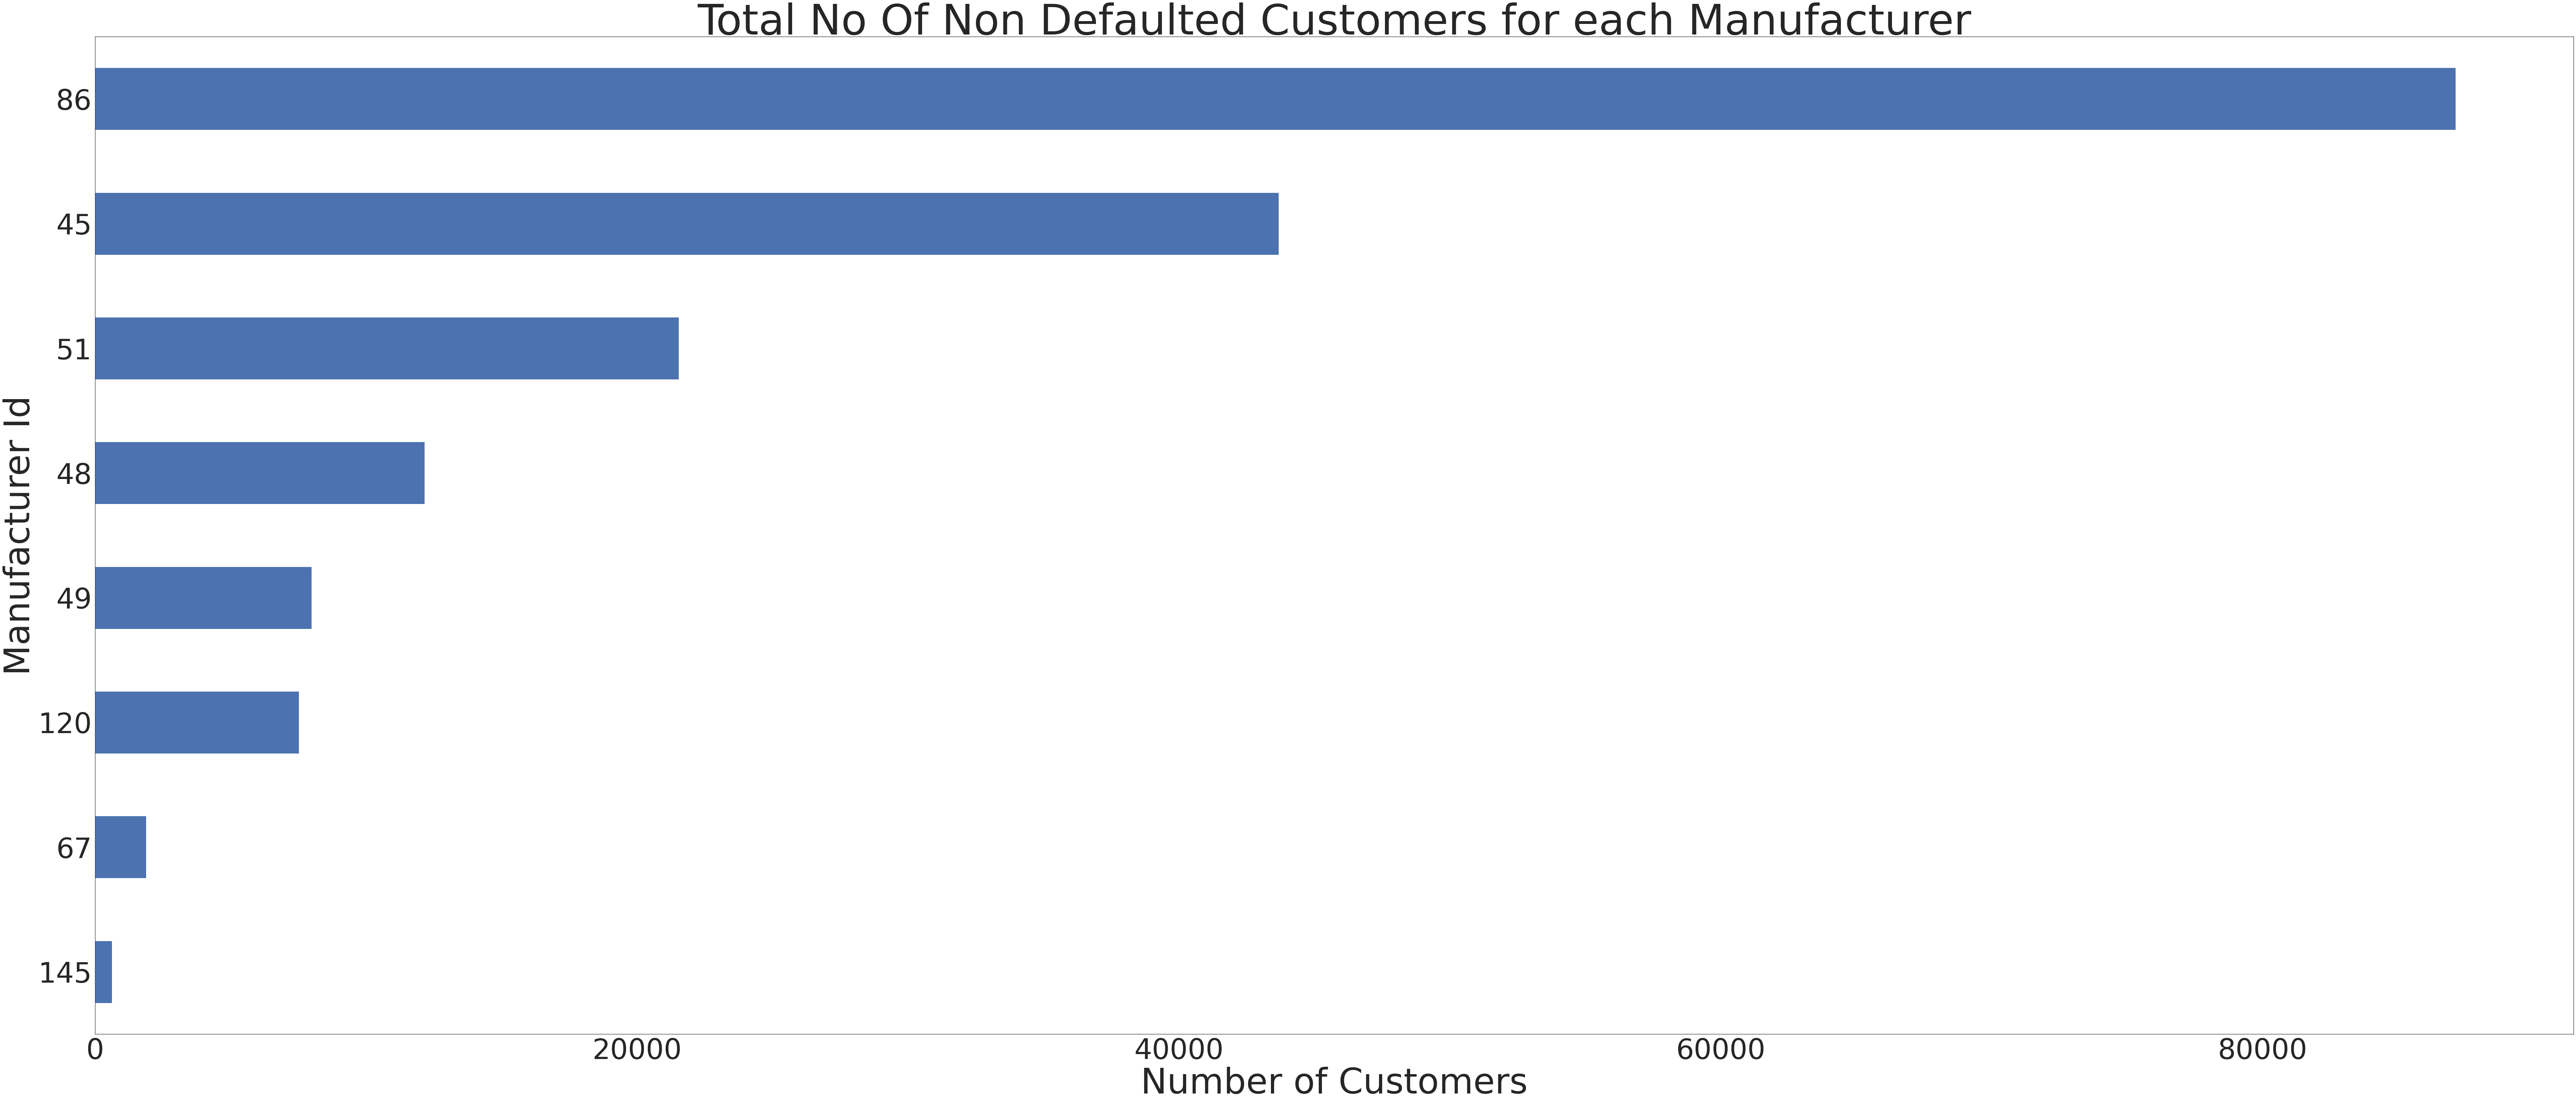

In [ ]:
plt.figure(figsize=(100, 40))
ax = dfDataManufacturesNonDefaultersSorted.plot.barh()
ax.invert_yaxis()
axes = plt.gca()
axes.xaxis.label.set_size(100)
axes.yaxis.label.set_size(100)
# Adjust padding
plt.tight_layout()
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
#x axis y axis names
plt.xlabel ('Number of Customers')
plt.ylabel('Manufacturer Id')
plt.title('Total No Of Non Defaulted Customers for each Manufacturer', fontsize=120)
# Display
plt.show()

# Lets see the defaulter and non defaulter spread in each branch

# **Since count of Manufacturer ID's 145,153,152,156 is very less, lets ignore them for our data analysis**

In [ ]:
dfSelectManuId = data.loc[(data['Manufacturer_Id'].isin([86,45,51,48,49,120,67]))]

In [ ]:
dfSelectManuId

Uniqueid  Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
0        420825             50578       58400  89.55        67       22807   
1        417566             53278       61360  89.63        67       22807   
2        539055             52378       60300  88.39        67       22807   
3        529269             46349       61500  76.42        67       22807   
4        563215             43594       78256  57.50        67       22744   
...         ...               ...         ...    ...       ...         ...   
233149   561031             57759       76350  77.28         5       22289   
233150   649600             55009       71200  78.72       138       17408   
233151   603445             58513       68000  88.24       135       23313   
233152   442948             22824       40458  61.79       160       16212   
233153   545300             35299       72698  52.27         3       14573   

       Manufacturer_Id Employment_Type Disbursaldate State_Id  ...  \
0                   45        Salaried    2018-08-03        6  ...   
1                   45   Self employed    2018-08-01        6  ...   
2                   45   Self employed    2018-09-26        6  ...   
3                   45        Salaried    2018-09-23        6  ...   
4                   86   Self employed    2018-10-08        6  ...   
...                ...             ...           ...      ...  ...   
233149              51   Self employed    2018-10-06        9  ...   
233150              51   Self employed    2018-10-31        9  ...   
233151              45   Self employed    2018-10-23        4  ...   
233152              48   Self employed    2018-08-17       16  ...   
233153              45   Self employed    2018-09-28        1  ...   

        Driving_Flag  Passport_Flag  New_Accts_In_Last_Six_Months  \
0              False          False                             0   
1              False          False                             0   
2              False          False                             0   
3              False          False                             0   
4              False          False                             0   
...              ...            ...                           ...   
233149         False          False                             0   
233150         False          False                             0   
233151         False          False                            35   
233152         False          False                             9   
233153         False          False                             5   

        Delinquent_Accts_In_Last_Six_Months  Average_Acct_Age  \
0                                         0              0.00   
1                                         0              0.00   
2                                         0              0.00   
3                                         0              0.00   
4                                         0              0.00   
...                                     ...               ...   
233149                                    0              2.33   
233150                                    0              1.42   
233151                                    5              0.75   
233152                                    1              1.17   
233153                                    0              2.92   

        Credit_History_Length  No_Of_Inquiries  Loan_Default  Age  \
0                        0.00                0         False   38   
1                        0.00                0         False   36   
2                        0.00                1          True   44   
3                        0.00                0         False   34   
4                        0.00                0         False   27   
...                       ...              ...           ...  ...   
233149                   2.33                0         False   40   
233150                   1.42                1         False   29  

In [ ]:
#set seaborn plotting aesthetics
#create grouped bar chart
ax = sns.countplot(y='Manufacturer_Id' ,hue='Loan_Default', data=dfSelectManuId,
            palette=['Green', 'Red'],order=dfSelectManuId['Manufacturer_Id'].value_counts().index)

#add overall title
plt.xlabel ('Number of Customers')
plt.ylabel('Manufacturer Id')
plt.title('Spread of Defaulters and Non Defaulters for each Manufacturer', fontsize=120)
sns.set(rc={'figure.figsize':(140,100)},style='white')
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
axes = plt.gca()
axes.xaxis.label.set_size(100)
axes.yaxis.label.set_size(100)
plt.legend(['Non-Defaulters', 'Defaulters'],prop={'size': 100},loc=4);

for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(170,-85),fontweight='bold',fontsize=100,ha='center', va='center',color='black',textcoords='offset points')
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=50)
plt.show()

In [ ]:
dfSelectManuId

Uniqueid  Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
0        420825             50578       58400  89.55        67       22807   
1        417566             53278       61360  89.63        67       22807   
2        539055             52378       60300  88.39        67       22807   
3        529269             46349       61500  76.42        67       22807   
4        563215             43594       78256  57.50        67       22744   
...         ...               ...         ...    ...       ...         ...   
233149   561031             57759       76350  77.28         5       22289   
233150   649600             55009       71200  78.72       138       17408   
233151   603445             58513       68000  88.24       135       23313   
233152   442948             22824       40458  61.79       160       16212   
233153   545300             35299       72698  52.27         3       14573   

       Manufacturer_Id Employment_Type Disbursaldate State_Id  ...  \
0                   45        Salaried    2018-08-03        6  ...   
1                   45   Self employed    2018-08-01        6  ...   
2                   45   Self employed    2018-09-26        6  ...   
3                   45        Salaried    2018-09-23        6  ...   
4                   86   Self employed    2018-10-08        6  ...   
...                ...             ...           ...      ...  ...   
233149              51   Self employed    2018-10-06        9  ...   
233150              51   Self employed    2018-10-31        9  ...   
233151              45   Self employed    2018-10-23        4  ...   
233152              48   Self employed    2018-08-17       16  ...   
233153              45   Self employed    2018-09-28        1  ...   

        Driving_Flag  Passport_Flag  New_Accts_In_Last_Six_Months  \
0              False          False                             0   
1              False          False                             0   
2              False          False                             0   
3              False          False                             0   
4              False          False                             0   
...              ...            ...                           ...   
233149         False          False                             0   
233150         False          False                             0   
233151         False          False                            35   
233152         False          False                             9   
233153         False          False                             5   

        Delinquent_Accts_In_Last_Six_Months  Average_Acct_Age  \
0                                         0              0.00   
1                                         0              0.00   
2                                         0              0.00   
3                                         0              0.00   
4                                         0              0.00   
...                                     ...               ...   
233149                                    0              2.33   
233150                                    0              1.42   
233151                                    5              0.75   
233152                                    1              1.17   
233153                                    0              2.92   

        Credit_History_Length  No_Of_Inquiries  Loan_Default  Age  \
0                        0.00                0         False   38   
1                        0.00                0         False   36   
2                        0.00                1          True   44   
3                        0.00                0         False   34   
4                        0.00                0         False   27   
...                       ...              ...           ...  ...   
233149                   2.33                0         False   40   
233150                   1.42                1         False   29  

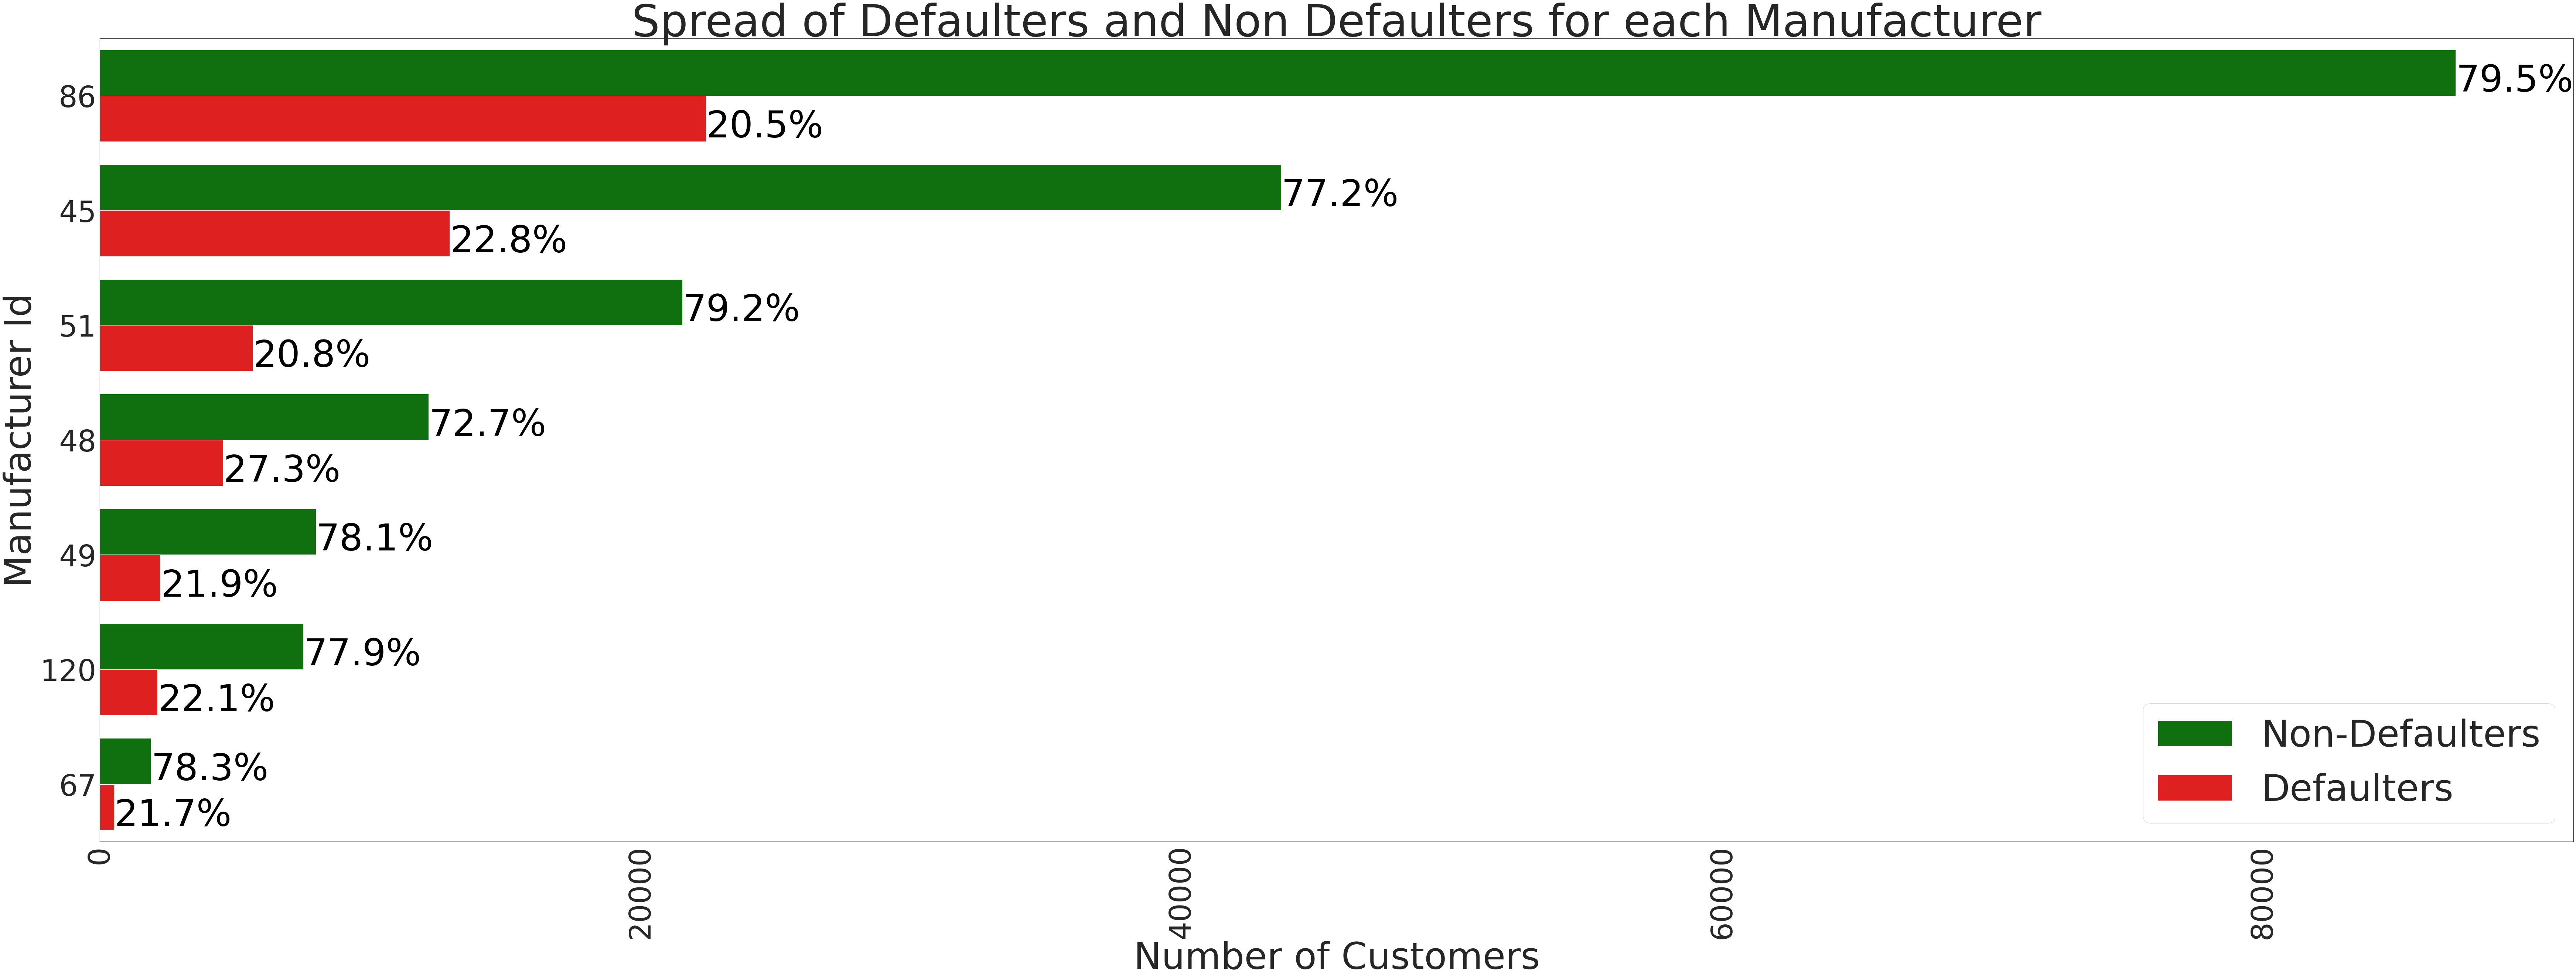

In [ ]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    #bars = ax.sort_values(ascending=False)
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_width() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
          ax.annotate(str(round(bar.get_width()*100/total,1))+"%",((bar.get_x() + bar.get_width()), bar.get_y()), xytext=(160,-85),fontsize=100,ha='center', va='center',color='black',textcoords='offset points')

plt.figure(figsize=(120,40))
ax = sns.countplot(y='Manufacturer_Id' ,hue='Loan_Default', data=dfSelectManuId,
            palette=['Green', 'Red'],order=dfSelectManuId['Manufacturer_Id'].value_counts().index)
plt.xlabel ('Number of Customers')
plt.ylabel('Manufacturer Id')
plt.title('Spread of Defaulters and Non Defaulters for each Manufacturer', fontsize=120)
sns.set(rc={'figure.figsize':(220,40)},style='white')
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.legend(['Non-Defaulters', 'Defaulters'],prop={'size': 100},loc=4);
axes = plt.gca()
axes.xaxis.label.set_size(100)
axes.yaxis.label.set_size(100)
barPerc(dfSelectManuId,'Manufacturer_Id',ax)

*Manufacturer ID : 86 tops the list in terms of count with 109534 customers opting for loan for its vehicle* followed by 45,51,48

*86 also tops the list for max defaulters (22410) and non-defaulters (87124) but this doesnt tell us much because of the **high** overall count, the defaulter and non defaulter count is more.*

The percentage of defaulters and Non defaulters will give us a better picture (graph above) and this shows 86 **tops the Non Defaulter Percentage**  meaning it has the **lowest Defaulter:Non Defaulter ratio**.

Branch Id 48 has the max defaulter percentage with 27.3%

# ***But looking at the percentages it is clear that almost all maufacturers have more or less the same defaulter % (except for 48 , slightly higher) and hence may not contribute to the chances of defaulting.***

# Analysis of State Id

In [ ]:
dfDataStateAll = data.groupby(['State_Id'],sort=False)['State_Id'].count()
dfDataStateAllSorted = dfDataStateAll.sort_values( ascending=False)
dfDataStateAllSorted

State_Id
4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
5     10177
14     9414
1      8936
7      6786
11     6721
18     5412
15     5049
12     4210
2      4160
17     3991
10     3605
16     2685
19     1035
20      185
21      156
22       76
Name: State_Id, dtype: int64

Lets drop state id 20,21,22 since the count is negligible

In [ ]:
dfDataStateAllSorted.drop(dfDataStateAllSorted.tail(3).index,inplace=True) # drop last 3 rows

In [ ]:
dfDataStateAllSorted

State_Id
4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
5     10177
14     9414
1      8936
7      6786
11     6721
18     5412
15     5049
12     4210
2      4160
17     3991
10     3605
16     2685
19     1035
Name: State_Id, dtype: int64

In [ ]:
df1= dfDataStateAllSorted.to_frame().rename(columns={'State_Id':'Count'}).reset_index()

In [ ]:
df1

State_Id  Count
0          4  44870
1          3  34078
2          6  33505
3         13  17884
4          9  16022
5          8  14197
6          5  10177
7         14   9414
8          1   8936
9          7   6786
10        11   6721
11        18   5412
12        15   5049
13        12   4210
14         2   4160
15        17   3991
16        10   3605
17        16   2685
18        19   1035

Text(0.5, 1.0, 'Customer distribution in Each State')

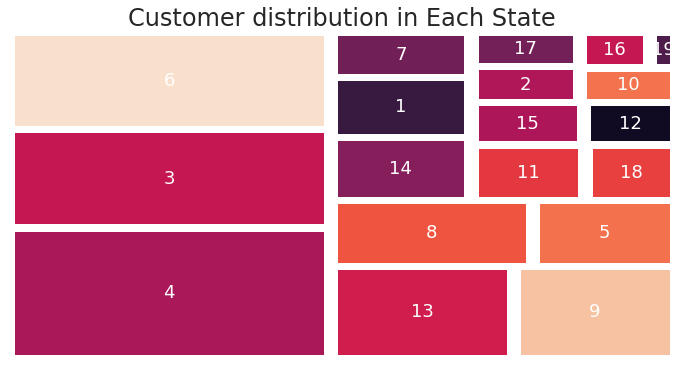

In [ ]:
plt.figure(figsize=(12, 6))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(df1['Count'],
                     label=df1.State_Id,
                     pad=1,
                     text_kwargs={'fontsize': 18,'color' : 'White'})
axis.set_title("Customer distribution in Each State", fontsize=24)

# ***State Id 4,3,6 tops the customer count and states such as 17,16,19 has minimum customers***

# Lets see the spread in Defaulter and Non Defaulter dataset

In [ ]:
dfDataStateNonDefault = dataNonDefault.groupby(['State_Id'],sort=False)['State_Id'].count()
dfDataStateNonDefaultSorted = dfDataStateNonDefault.sort_values( ascending=False)
dfDataStateNonDefaultSorted

State_Id
4     35544
3     27733
6     26615
9     12530
13    12401
8     10939
5      8154
1      7353
14     6817
7      5417
11     5348
18     4221
15     3981
12     3092
2      3031
17     3010
10     2972
16     2192
19      848
20      153
21      125
22       67
Name: State_Id, dtype: int64

# Lets delete stateid 20,21,22 since the count is negligible

In [ ]:
dfDataStateNonDefaultSorted.drop(dfDataStateNonDefaultSorted.tail(3).index,inplace=True) # drop last 3 rows

In [ ]:
dfDataStateNonDefaultSorted

State_Id
4     35544
3     27733
6     26615
9     12530
13    12401
8     10939
5      8154
1      7353
14     6817
7      5417
11     5348
18     4221
15     3981
12     3092
2      3031
17     3010
10     2972
16     2192
19      848
Name: State_Id, dtype: int64

In [ ]:
df2= dfDataStateNonDefaultSorted.to_frame().rename(columns={'State_Id':'Count'}).reset_index()

In [ ]:
df2

State_Id  Count
0          4  35544
1          3  27733
2          6  26615
3          9  12530
4         13  12401
5          8  10939
6          5   8154
7          1   7353
8         14   6817
9          7   5417
10        11   5348
11        18   4221
12        15   3981
13        12   3092
14         2   3031
15        17   3010
16        10   2972
17        16   2192
18        19    848

Text(0.5, 1.0, 'Non Default Customer distribution in Each State')

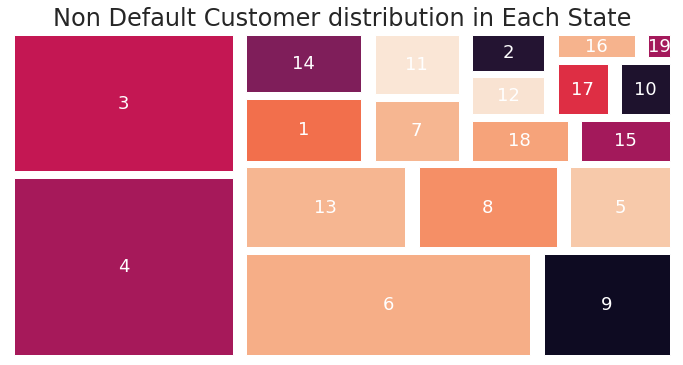

In [ ]:
plt.figure(figsize=(12, 6))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(df2['Count'],
                     label=df2.State_Id,
                     pad=1,
                     text_kwargs={'fontsize': 18,'color' : 'White'})
axis.set_title("Non Default Customer distribution in Each State", fontsize=24)

# State Id's distribution for non defaulters data w.r.t Count **remains the same more or less** as overall customer data

**4,3,6,9,13 tops the non defaulters count**


# **Defaulter Data Analysis for StateId**

In [ ]:
dfDataStateDefault = dataDefault.groupby(['State_Id'],sort=False)['State_Id'].count()
dfDataStateDefaultSorted = dfDataStateDefault.sort_values( ascending=False)
dfDataStateDefaultSorted

State_Id
4     9326
6     6890
3     6345
13    5483
9     3492
8     3258
14    2597
5     2023
1     1583
11    1373
7     1369
18    1191
2     1129
12    1118
15    1068
17     981
10     633
16     493
19     187
20      32
21      31
22       9
Name: State_Id, dtype: int64

# Lets delete the last three State Id due to negligible count

In [ ]:
dfDataStateDefaultSorted.drop(dfDataStateDefaultSorted.tail(3).index,inplace=True) # drop last 3 rows

In [ ]:
dfDataStateDefaultSorted

State_Id
4     9326
6     6890
3     6345
13    5483
9     3492
8     3258
14    2597
5     2023
1     1583
11    1373
7     1369
18    1191
2     1129
12    1118
15    1068
17     981
10     633
16     493
19     187
Name: State_Id, dtype: int64

In [ ]:
df3= dfDataStateDefaultSorted.to_frame().rename(columns={'State_Id':'Count'}).reset_index()

In [ ]:
df3

State_Id  Count
0          4   9326
1          6   6890
2          3   6345
3         13   5483
4          9   3492
5          8   3258
6         14   2597
7          5   2023
8          1   1583
9         11   1373
10         7   1369
11        18   1191
12         2   1129
13        12   1118
14        15   1068
15        17    981
16        10    633
17        16    493
18        19    187

In [ ]:
df3['Count']

0     9326
1     6890
2     6345
3     5483
4     3492
5     3258
6     2597
7     2023
8     1583
9     1373
10    1369
11    1191
12    1129
13    1118
14    1068
15     981
16     633
17     493
18     187
Name: Count, dtype: int64

In [ ]:
df3.State_Id

0      4
1      6
2      3
3     13
4      9
5      8
6     14
7      5
8      1
9     11
10     7
11    18
12     2
13    12
14    15
15    17
16    10
17    16
18    19
Name: State_Id, dtype: int64

Text(0.5, 1.0, 'Default Customer distribution in Each State')

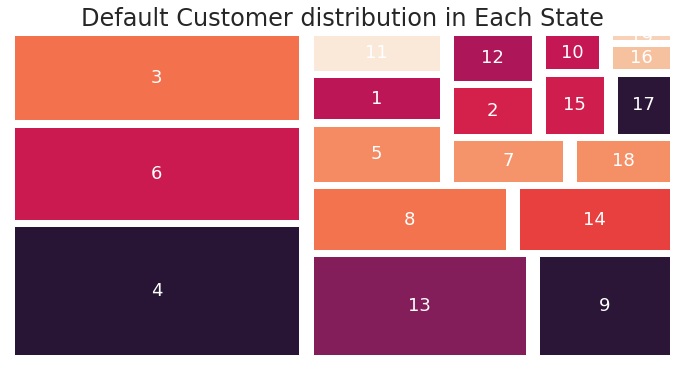

In [ ]:
plt.figure(figsize=(12, 6))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(df3['Count'],
                     label=df3.State_Id,
                     pad=1,
                     text_kwargs={'fontsize': 18,'color' : 'White'})
axis.set_title("Default Customer distribution in Each State", fontsize=24)

# STATE Id 4,6,3,13,9 tops the defaulters count 

Lets check the % of Defaulters and Non Defaulters and see which state has a higher chance of defaulting

In [ ]:
colnames = ['StateId', 'DefaultPercent','NonDefaultPercent']
dfPercentFor = pd.DataFrame(columns=colnames)

In [ ]:
for a,b in zip(df1.State_Id, df1.Count):
  for c,d in zip(df3.State_Id,df3.Count):
    for e,f in zip(df2.State_Id,df2.Count):
      if(a==c==e):
        dfPercentFor= dfPercentFor.append({'StateId':str(c), 'DefaultPercent':round(d/b*100,1),'NonDefaultPercent':round(f/b*100,1)}, ignore_index=True)

In [ ]:
dfPercentFor

StateId  DefaultPercent  NonDefaultPercent
0        4            20.8               79.2
1        3            18.6               81.4
2        6            20.6               79.4
3       13            30.7               69.3
4        9            21.8               78.2
5        8            22.9               77.1
6        5            19.9               80.1
7       14            27.6               72.4
8        1            17.7               82.3
9        7            20.2               79.8
10      11            20.4               79.6
11      18            22.0               78.0
12      15            21.2               78.8
13      12            26.6               73.4
14       2            27.1               72.9
15      17            24.6               75.4
16      10            17.6               82.4
17      16            18.4               81.6
18      19            18.1               81.9

In [ ]:
dfPercentFor = dfPercentFor.sort_values('DefaultPercent',ascending=False)

In [ ]:
dfPercentFor

StateId  DefaultPercent  NonDefaultPercent
3       13            30.7               69.3
7       14            27.6               72.4
14       2            27.1               72.9
13      12            26.6               73.4
15      17            24.6               75.4
5        8            22.9               77.1
11      18            22.0               78.0
4        9            21.8               78.2
12      15            21.2               78.8
0        4            20.8               79.2
2        6            20.6               79.4
10      11            20.4               79.6
9        7            20.2               79.8
6        5            19.9               80.1
1        3            18.6               81.4
17      16            18.4               81.6
18      19            18.1               81.9
8        1            17.7               82.3
16      10            17.6               82.4

# ***Highest defaulting % states are (which are above the mean default%(21.7) of the dataset)***

1.   StateID 13 - 30.7%
2.   StateID 14 - 27.6%
3.   StateID 2 - 27.1%
4.   StateID 12 - 26.6%
5.   StateID 17 - 24.6%




In [ ]:
dfPercentFor['text'] = dfPercentFor['StateId'].astype(str) +'-'+dfPercentFor['DefaultPercent'].astype(str)+'%'


In [ ]:
dfPercentFor

StateId  DefaultPercent  NonDefaultPercent      text
3       13            30.7               69.3  13-30.7%
7       14            27.6               72.4  14-27.6%
14       2            27.1               72.9   2-27.1%
13      12            26.6               73.4  12-26.6%
15      17            24.6               75.4  17-24.6%
5        8            22.9               77.1   8-22.9%
11      18            22.0               78.0  18-22.0%
4        9            21.8               78.2   9-21.8%
12      15            21.2               78.8  15-21.2%
0        4            20.8               79.2   4-20.8%
2        6            20.6               79.4   6-20.6%
10      11            20.4               79.6  11-20.4%
9        7            20.2               79.8   7-20.2%
6        5            19.9               80.1   5-19.9%
1        3            18.6               81.4   3-18.6%
17      16            18.4               81.6  16-18.4%
18      19            18.1               81.9  19-18.1%
8        1            17.7               82.3   1-17.7%
16      10            17.6               82.4  10-17.6%

Text(0.5, 1.0, 'Default Customer Percentage distribution in Each State')

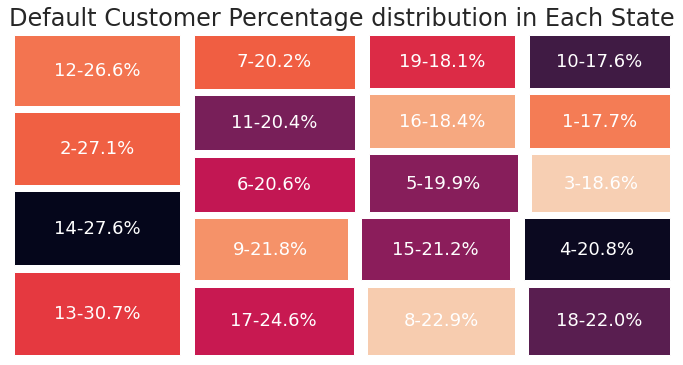

In [ ]:
plt.figure(figsize=(12, 6))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(dfPercentFor.DefaultPercent,
                     label=dfPercentFor['text'],
                     pad=1,
                     text_kwargs={'fontsize': 18,'color' : 'White'})
axis.set_title("Default Customer Percentage distribution in Each State", fontsize=24)

Analysis of SupplierId

In [ ]:
data['Supplier_Id'].value_counts()

18317    1432
15694    1300
15663    1275
17980    1268
14234    1258
         ... 
23802       1
24715       1
22421       1
18692       1
16270       1
Name: Supplier_Id, Length: 2953, dtype: int64

# Approach for Analysis:
***Since there are almost 3000 unique values for the supplier Id, Lets take only SupplierId which has served more than 100 customers***

In [ ]:
Suppliercounts = data['Supplier_Id'].value_counts()
SupplierAlldf = data[data['Supplier_Id'].isin(Suppliercounts[Suppliercounts > 100].index)]

In [ ]:
SupplierAlldf

Uniqueid  Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
19       650644             53040       67067  82.73        78       17014   
20       508030             49458       63000  82.54        78       17014   
21       482553             48693       65500  77.86        78       17014   
22       460555             48500       59313  83.79        78       17014   
23       548388             48693       62577  81.50        78       17014   
...         ...               ...         ...    ...       ...         ...   
233146   532224             69659       85300  83.82       135       23550   
233147   437681             43272       59313  74.86        78       17014   
233150   649600             55009       71200  78.72       138       17408   
233151   603445             58513       68000  88.24       135       23313   
233153   545300             35299       72698  52.27         3       14573   

       Manufacturer_Id Employment_Type Disbursaldate State_Id  ...  \
19                  45        Salaried    2018-10-31        4  ...   
20                  45        Salaried    2018-09-15        4  ...   
21                  45        Salaried    2018-08-31        4  ...   
22                  45        Salaried    2018-08-24        4  ...   
23                  45        Salaried    2018-09-29        4  ...   
...                ...             ...           ...      ...  ...   
233146              86   Self employed    2018-09-24        4  ...   
233147              45        Salaried    2018-08-14        4  ...   
233150              51   Self employed    2018-10-31        9  ...   
233151              45   Self employed    2018-10-23        4  ...   
233153              45   Self employed    2018-09-28        1  ...   

        Driving_Flag  Passport_Flag  New_Accts_In_Last_Six_Months  \
19             False          False                             0   
20             False          False                             0   
21             False          False                             0   
22             False          False                             0   
23             False          False                             0   
...              ...            ...                           ...   
233146         False          False                             0   
233147         False          False                             0   
233150         False          False                             0   
233151         False          False                            35   
233153         False          False                             5   

        Delinquent_Accts_In_Last_Six_Months  Average_Acct_Age  \
19                                        0              0.00   
20                                        0              0.00   
21                                        0              0.00   
22                                        0              0.00   
23                                        0              0.00   
...                                     ...               ...   
233146                                    0              0.83   
233147                                    0              2.25   
233150                                    0              1.42   
233151                                    5              0.75   
233153                                    0              2.92   

        Credit_History_Length  No_Of_Inquiries  Loan_Default  Age  \
19                       0.00                0          True   37   
20                       0.00                0         False   28   
21                       0.00                0          True   46   
22                       0.00                0         False   58   
23                       0.00                0         False   46   
...                       ...              ...           ...  ...   
233146                   0.83                0         False   45   
233147                   2.25                1          True   33  

In [ ]:
SupplierAlldf['Supplier_Id'].value_counts()

18317    1432
15694    1300
15663    1275
17980    1268
14234    1258
         ... 
24255     101
16535     101
22933     101
23915     101
23711     101
Name: Supplier_Id, Length: 634, dtype: int64

In [ ]:
DefaultSupllierdf = dataDefault[dataDefault['Supplier_Id'].isin(SupplierAlldf['Supplier_Id'])]

In [ ]:
DefaultSupllierdf['Supplier_Id'].value_counts()

18317    482
15694    386
22994    341
21980    336
14234    320
        ... 
16932      9
20690      9
16437      9
18388      5
21033      5
Name: Supplier_Id, Length: 634, dtype: int64

In [ ]:
SupplierAlldf['Supplier_Id'].value_counts()

18317    1432
15694    1300
15663    1275
17980    1268
14234    1258
         ... 
24255     101
16535     101
22933     101
23915     101
23711     101
Name: Supplier_Id, Length: 634, dtype: int64

In [ ]:
NonDefaultSupllierdf = dataNonDefault[dataNonDefault['Supplier_Id'].isin(SupplierAlldf['Supplier_Id'])]

In [ ]:
NonDefaultSupllierdf['Supplier_Id'].value_counts()

18166    1028
14375     988
17980     983
15663     967
18317     950
         ... 
22111      69
16051      68
14383      68
22127      65
23150      48
Name: Supplier_Id, Length: 634, dtype: int64

In [ ]:
SupplierAlldfGrouped = SupplierAlldf.groupby(['Supplier_Id'],sort=False)['Supplier_Id'].count()
SupplierAlldfGroupedSorted = SupplierAlldfGrouped.sort_values( ascending=False)
SupplierAlldfGroupedSorted

Supplier_Id
18317    1432
15694    1300
15663    1275
17980    1268
14234    1258
         ... 
24255     101
16535     101
22933     101
23915     101
23711     101
Name: Supplier_Id, Length: 634, dtype: int64

In [ ]:
SupplierDefaultdfGrouped = DefaultSupllierdf.groupby(['Supplier_Id'],sort=False)['Supplier_Id'].count()
SupplierDefaultdfGroupedSorted = SupplierDefaultdfGrouped.sort_values( ascending=False)
SupplierDefaultdfGroupedSorted

Supplier_Id
18317    482
15694    386
22994    341
21980    336
14234    320
        ... 
16932      9
20690      9
16437      9
18388      5
21033      5
Name: Supplier_Id, Length: 634, dtype: int64

In [ ]:
SupplierNonDefaultdfGrouped = NonDefaultSupllierdf.groupby(['Supplier_Id'],sort=False)['Supplier_Id'].count()
SupplierNonDefaultdfGroupedSorted = SupplierNonDefaultdfGrouped.sort_values( ascending=False)
SupplierNonDefaultdfGroupedSorted

Supplier_Id
18166    1028
14375     988
17980     983
15663     967
18317     950
         ... 
22111      69
16051      68
14383      68
22127      65
23150      48
Name: Supplier_Id, Length: 634, dtype: int64

In [ ]:
df1Supplier= SupplierAlldfGroupedSorted.to_frame().rename(columns={'Supplier_Id':'Count'}).reset_index()

In [ ]:
df1Supplier

Supplier_Id  Count
0          18317   1432
1          15694   1300
2          15663   1275
3          17980   1268
4          14234   1258
..           ...    ...
629        24255    101
630        16535    101
631        22933    101
632        23915    101
633        23711    101

[634 rows x 2 columns]

In [ ]:
df2Supplier= SupplierDefaultdfGroupedSorted.to_frame().rename(columns={'Supplier_Id':'Count'}).reset_index()

In [ ]:
df2Supplier

Supplier_Id  Count
0          18317    482
1          15694    386
2          22994    341
3          21980    336
4          14234    320
..           ...    ...
629        16932      9
630        20690      9
631        16437      9
632        18388      5
633        21033      5

[634 rows x 2 columns]

In [ ]:
df3Supplier= SupplierNonDefaultdfGroupedSorted.to_frame().rename(columns={'Supplier_Id':'Count'}).reset_index()

In [ ]:
df3Supplier

Supplier_Id  Count
0          18166   1028
1          14375    988
2          17980    983
3          15663    967
4          18317    950
..           ...    ...
629        22111     69
630        16051     68
631        14383     68
632        22127     65
633        23150     48

[634 rows x 2 columns]

In [ ]:
##calculating Defaulter and Non Defaulter percentage for each Supplier Id

In [ ]:
colnames = ['SupplierId', 'DefaultPercent','NonDefaultPercent']
dfPercentSupplier = pd.DataFrame(columns=colnames)

In [ ]:
for a,b in zip(df1Supplier.Supplier_Id, df1Supplier.Count):
  for c,d in zip(df3Supplier.Supplier_Id,df3Supplier.Count):
    for e,f in zip(df2Supplier.Supplier_Id,df2Supplier.Count):
      if(a==c==e):
        dfPercentSupplier= dfPercentSupplier.append({'SupplierId':str(c), 'NonDefaultPercent':round(d/b*100,1),'DefaultPercent':round(f/b*100,1)}, ignore_index=True)

In [ ]:
dfPercentSupplier

SupplierId  DefaultPercent  NonDefaultPercent
0        18317            33.7               66.3
1        15694            29.7               70.3
2        15663            24.2               75.8
3        17980            22.5               77.5
4        14234            25.4               74.6
..         ...             ...                ...
629      24255            26.7               73.3
630      16535            20.8               79.2
631      22933             8.9               91.1
632      23915            24.8               75.2
633      23711            23.8               76.2

[634 rows x 3 columns]

In [ ]:
dfPercentSupplier = dfPercentSupplier.sort_values('DefaultPercent',ascending=False)

In [ ]:
dfPercentSupplier

SupplierId  DefaultPercent  NonDefaultPercent
36       22994            55.9               44.1
603      23150            54.3               45.7
507      22127            48.0               52.0
347      17436            42.7               57.3
338      21242            42.6               57.4
..         ...             ...                ...
341      15082             7.4               92.6
491      16932             7.0               93.0
427      20690             6.1               93.9
577      21033             4.5               95.5
531      18388             4.2               95.8

[634 rows x 3 columns]

# ***Lets get the suppiler id's with more than mean default percentage of the data set and we get 278 suppliers as shown below***

In [ ]:
dfPercentSupplierDefaulters =  dfPercentSupplier.loc[dfPercentSupplier['DefaultPercent'] >= 21.7]

In [ ]:
dfPercentSupplierDefaulters

SupplierId  DefaultPercent  NonDefaultPercent
36       22994            55.9               44.1
603      23150            54.3               45.7
507      22127            48.0               52.0
347      17436            42.7               57.3
338      21242            42.6               57.4
..         ...             ...                ...
31       14710            21.8               78.2
138      18732            21.7               78.3
166      18714            21.7               78.3
468      22874            21.7               78.3
29       16694            21.7               78.3

[278 rows x 3 columns]

**278 Suppliers are having default percentage more than the average default percentage of the data set**

# ***The top 5 Default Suppliers are 22994,23150,22127,17436,21242 are having more than double the mean defaulter percentage and these high defaulting suppliers needs to be analyzed by the management***

In [ ]:
##Analysis of Disbursed Amount

In [ ]:
dataDefault['Disbursed_Amount'].describe()

count     50611.000000
mean      56270.473869
std       12150.255527
min       13369.000000
25%       49303.000000
50%       55459.000000
75%       61947.000000
max      191392.000000
Name: Disbursed_Amount, dtype: float64

# ***Default Data:***
There are 50,611 rows and the mean of the dataset is 56,270.47 with a standard deviation of 12,150 which means the data set is spread over a wide range.
25% of default data have the value 49303 or below
50% of default data have the value 55459 or below
75% of default data have the value 61947 or below
and the min and max value is 13369 and 191392 respectively

In [ ]:
dataNonDefault['Disbursed_Amount'].describe()

count    182543.000000
mean      53826.471111
std       13140.699007
min       13320.000000
25%       46369.000000
50%       53303.000000
75%       59947.000000
max      990572.000000
Name: Disbursed_Amount, dtype: float64

***Non Default Dataset:***
The Non default dataset has a distibution more or less similar to the Default dataset

There are 182543 rows and the mean of the dataset is 53,826.47 with a standard deviation of 13,140 which means the data set is spread over a wide range.
25% of default data have the value 46369 or below
50% of default data have the value 53303 or below
75% of default data have the value 59947 or below
and the min and max value is 13320 and 990572  respectively

# Lets see the spread of the data graphically 




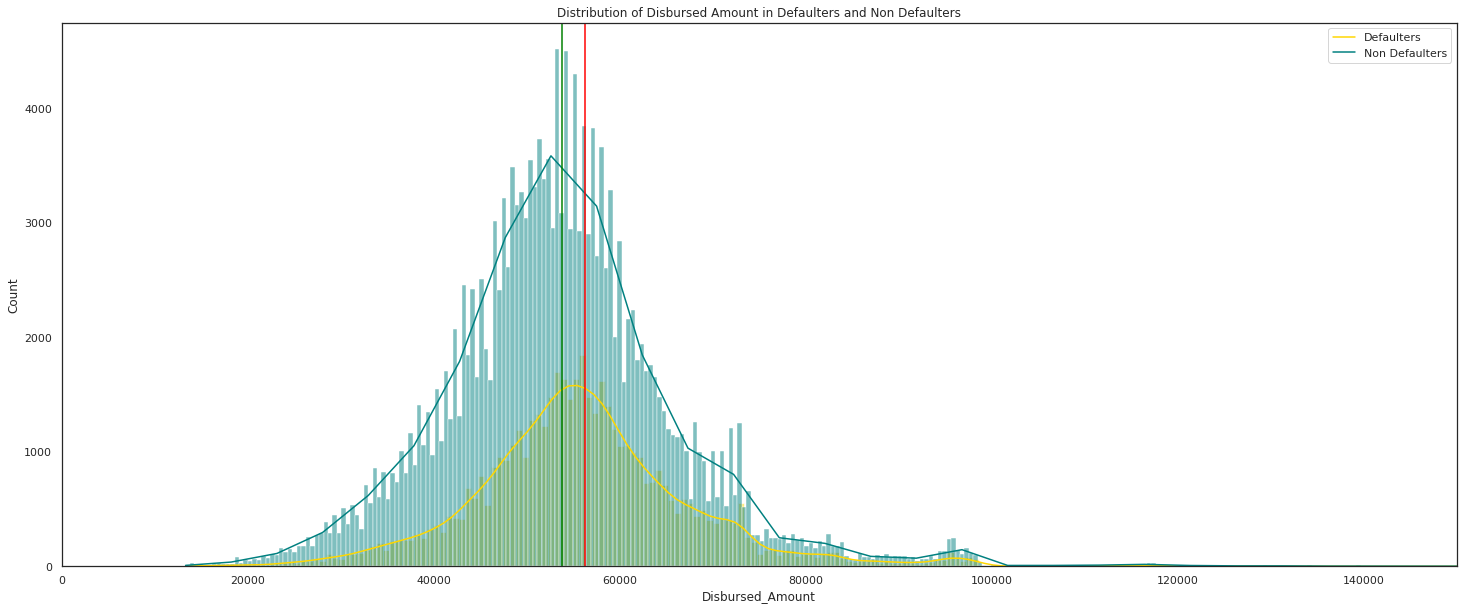

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(25, 10))

axs.ticklabel_format(useOffset=False,style='plain')
axs.set_xlim(0,150000)
axs.set_xlim(0,150000)
sns.histplot(data=dataDefault, x="Disbursed_Amount", kde=True, color="gold")
sns.histplot(data=dataNonDefault, x="Disbursed_Amount", kde=True, color="teal")
plt.legend(labels=["Defaulters","Non Defaulters"])
plt.title("Distribution of Disbursed Amount in Defaulters and Non Defaulters")
plt.axvline(x=dataDefault.Disbursed_Amount.mean(),
            color='red')
plt.axvline(x=dataNonDefault.Disbursed_Amount.mean(),
            color='green')
plt.show()

# *The disbursed amount distribution is same for both defaulters and non defaulters and hence this column wont play an important role*
# The mean value for both the datasets to remain almost the same and no contrasting distribution of defaulters and non defaulters.

In [ ]:
##Analysis of asset cost

In [ ]:
dataDefault['Asset_Cost'].describe()

count     50611.000000
mean      76378.176661
std       18680.502609
min       37000.000000
25%       65894.000000
50%       71326.000000
75%       80061.500000
max      281164.000000
Name: Asset_Cost, dtype: float64

In [ ]:
dataNonDefault['Asset_Cost'].describe().apply(lambda x: format(x, 'f'))

count     182543.000000
mean       75722.806128
std        19015.002867
min        37000.000000
25%        65680.000000
50%        70845.000000
75%        78999.000000
max      1628992.000000
Name: Asset_Cost, dtype: object

##The Asset Cost for Defaulters:
There are 50,611 rows and the mean of the dataset is 76,378.17 with a standard deviation of 18,680 which means the data set is spread over a wide range over its mean value
25% of default data have the value 65894 or below
50% of default data have the value 71326 or below
75% of default data have the value 80061 or below
and the min and max value is 37000 and 281164 respectively.


# The Asset Cost for Non-Defaulters:
There are 182543 rows and the mean of the dataset is 75722 with a standard deviation of 19015 which means the data set is spread over a wide range over its mean value 25% of default data have the value 65680 or below 50% of default data have the value 70845 or below 75% of default data have the value 78999 or below and the min and max value is 37000 and 1628992 respectively.

Both the dataset seems to have no contrasting distribution and letss see it graphically

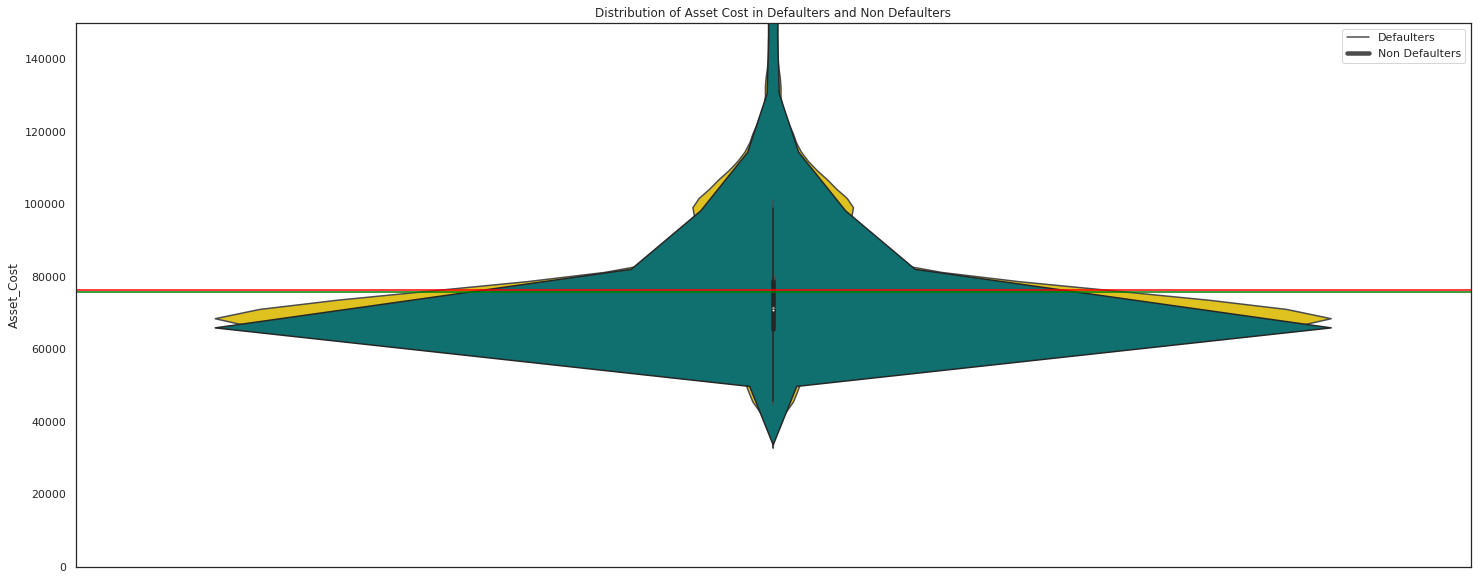

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(25, 10))

axs.ticklabel_format(useOffset=False,style='plain')
axs.set_ylim(0,150000)
axs.set_ylim(0,150000)
sns.violinplot(data=dataDefault, y="Asset_Cost", kde=True, color="gold")
sns.violinplot(data=dataNonDefault, y="Asset_Cost", kde=True, color="teal")
plt.title("Distribution of Asset Cost in Defaulters and Non Defaulters")
plt.legend(labels=["Defaulters","Non Defaulters"])
plt.axhline(y=dataDefault.Asset_Cost.mean(),
            color='red')
plt.axhline(y=dataNonDefault.Asset_Cost.mean(),
            color='green')
plt.show()

# *The Asset cost distribution is same for both defaulters and non defaulters and hence this column wont play an important role*
# The mean value for both the datasets to remain almost the same

In [ ]:
##Analysis of Loan to Value of the asset

In [ ]:
dataDefault['Ltv'].describe()

count    50611.000000
mean        76.883322
std         10.327771
min         15.300000
25%         72.055000
50%         79.060000
75%         84.680000
max         95.000000
Name: Ltv, dtype: float64

In [ ]:
dataNonDefault['Ltv'].describe()

count    182543.000000
mean         74.154093
std          11.681455
min          10.030000
25%          68.020000
50%          76.000000
75%          83.160000
max          95.000000
Name: Ltv, dtype: float64

Ltv is a column derived from Asset cost and Disbursed amount and the mean values and distribution for both default and non default remains almost the same

Lets see the graphical distribution to confirm the same

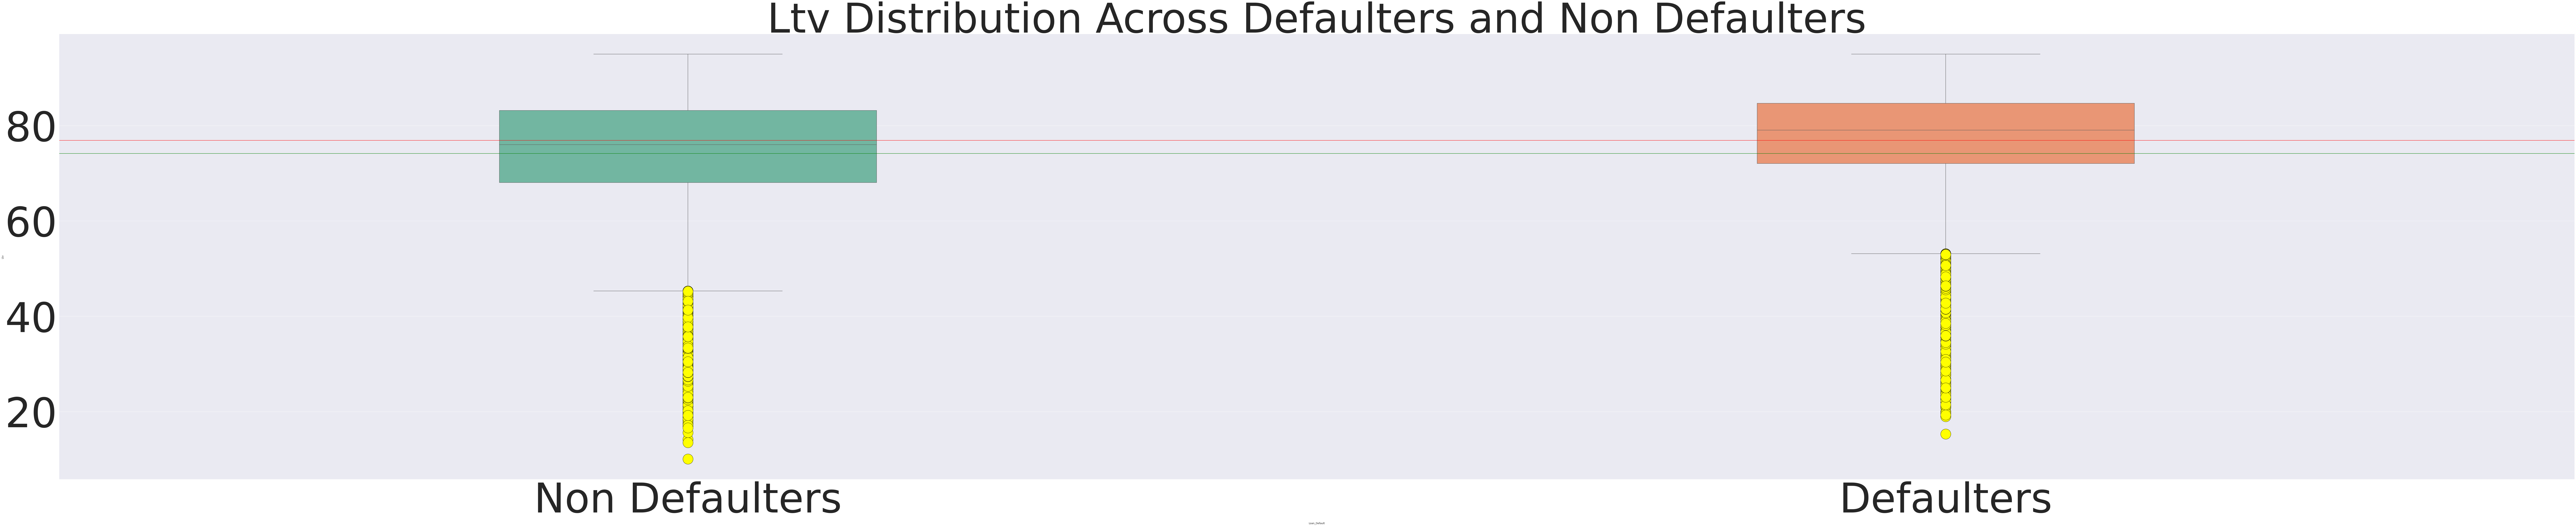

In [ ]:
colors = ['#78C850', '#F08030']
flierprops = dict(marker='o', markerfacecolor='yellow', markersize=50,  markeredgecolor='black')
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.boxplot(x=data["Loan_Default"], y=data["Ltv"], width=0.3,flierprops=flierprops);
plt.title('Ltv Distribution Across Defaulters and Non Defaulters', fontsize=200)
plt.axhline(y=dataDefault.Ltv.mean(),
            color='red')
plt.axhline(y=dataNonDefault.Ltv.mean(),
            color='green')
plt.xticks(fontsize=200)
plt.yticks(fontsize=200)
plt.xticks([0, 1], ['Non Defaulters', 'Defaulters'])
plt.show()

Both the DS has lot of outliers but the distribution seems the same for both dataset and this may not have a great impact in our analysis

ANALYSIS OF REST OF THE NUMERIC VARIABLES NAMELY:


1.   Average_Acct_Age
2.   Credit_History_Length
3.   No_Of_Inquiries
4.   Delinquent_Accts_In_Last_Six_Months



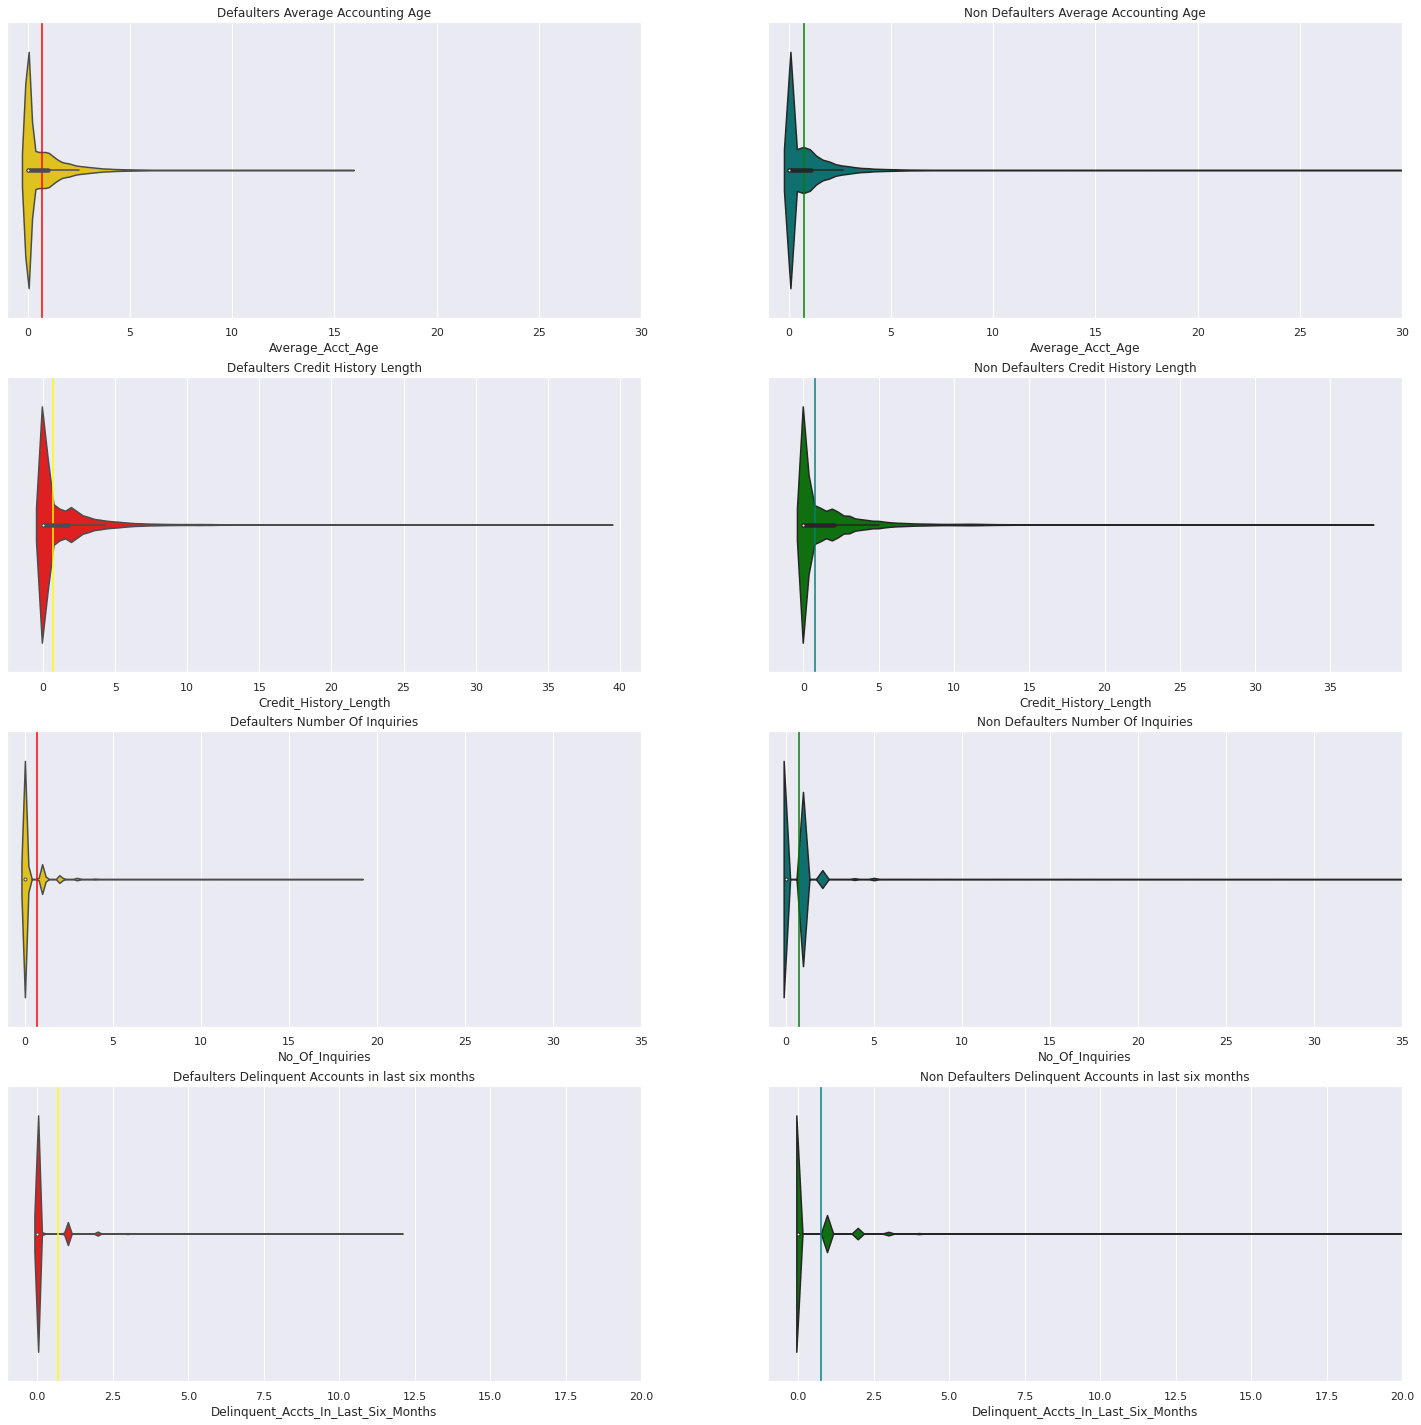

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(25, 25))

axs[0,0].axvline(x=dataDefault.Average_Acct_Age.mean(),
            color='red')
axs[0,1].axvline(x=dataNonDefault.Average_Acct_Age.mean(),
            color='green')

axs[1,0].axvline(x=dataDefault.Average_Acct_Age.mean(),
            color='yellow')
axs[1,1].axvline(x=dataNonDefault.Average_Acct_Age.mean(),
            color='teal')

axs[2,0].axvline(x=dataDefault.Average_Acct_Age.mean(),
            color='red')
axs[2,1].axvline(x=dataNonDefault.Average_Acct_Age.mean(),
            color='green')

axs[3,0].axvline(x=dataDefault.Average_Acct_Age.mean(),
            color='yellow')
axs[3,1].axvline(x=dataNonDefault.Average_Acct_Age.mean(),
            color='teal')


axs[0,0].set_title('Defaulters Average Accounting Age')
axs[0,1].set_title('Non Defaulters Average Accounting Age')
axs[1,0].set_title('Defaulters Credit History Length')
axs[1,1].set_title('Non Defaulters Credit History Length')
axs[2,0].set_title('Defaulters Number Of Inquiries')
axs[2,1].set_title('Non Defaulters Number Of Inquiries')
axs[3,0].set_title('Defaulters Delinquent Accounts in last six months')
axs[3,1].set_title('Non Defaulters Delinquent Accounts in last six months')

axs[0,0].set_xlim(-1,30)
axs[0,1].set_xlim(-1,30)
axs[2,0].set_xlim(-1,35)
axs[2,1].set_xlim(-1,35)
axs[3,0].set_xlim(-1,20)
axs[3,1].set_xlim(-1,20)


sns.violinplot(data=dataDefault, x="Average_Acct_Age", kde=True, color="gold",ax=axs[0,0])
sns.violinplot(data=dataNonDefault, x="Average_Acct_Age", kde=True, color="teal",ax=axs[0,1])
sns.violinplot(data=dataDefault, x="Credit_History_Length", kde=True, color="red",ax=axs[1,0])
sns.violinplot(data=dataNonDefault, x="Credit_History_Length", kde=True, color="green",ax=axs[1,1])
sns.violinplot(data=dataDefault, x="No_Of_Inquiries", kde=True, color="gold",ax=axs[2,0])
sns.violinplot(data=dataNonDefault, x="No_Of_Inquiries", kde=True, color="teal",ax=axs[2,1])
sns.violinplot(data=dataDefault, x="Delinquent_Accts_In_Last_Six_Months", kde=True, color="red",ax=axs[3,0])
sns.violinplot(data=dataNonDefault, x="Delinquent_Accts_In_Last_Six_Months", kde=True, color="green",ax=axs[3,1])


plt.show()

In [ ]:
dataDefault['Average_Acct_Age'].describe()

count    50611.000000
mean         0.683709
std          1.211801
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         15.670000
Name: Average_Acct_Age, dtype: float64

In [ ]:
dataNonDefault['Average_Acct_Age'].describe()

count    182543.000000
mean          0.759383
std           1.271120
min           0.000000
25%           0.000000
50%           0.000000
75%           1.080000
max          30.750000
Name: Average_Acct_Age, dtype: float64

In [ ]:
dataDefault['Credit_History_Length'].describe()

count    50611.000000
mean         1.163746
std          2.126623
min          0.000000
25%          0.000000
50%          0.000000
75%          1.750000
max         39.000000
Name: Credit_History_Length, dtype: float64

In [ ]:
dataNonDefault['Credit_History_Length'].describe()

count    182543.000000
mean          1.407113
std           2.445187
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          37.420000
Name: Credit_History_Length, dtype: float64

In [ ]:
dataDefault['No_Of_Inquiries'].describe()

count    50611.000000
mean         0.265219
std          0.835147
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.000000
Name: No_Of_Inquiries, dtype: float64

In [ ]:
dataNonDefault['No_Of_Inquiries'].describe()

count    182543.000000
mean          0.190366
std           0.665536
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: No_Of_Inquiries, dtype: float64

In [ ]:
dataDefault.Delinquent_Accts_In_Last_Six_Months.describe()

count    50611.000000
mean         0.122641
std          0.430872
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: Delinquent_Accts_In_Last_Six_Months, dtype: float64

In [ ]:
dataNonDefault.Delinquent_Accts_In_Last_Six_Months.describe()

count    182543.000000
mean          0.090505
std           0.370235
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: Delinquent_Accts_In_Last_Six_Months, dtype: float64

Analysis: 


1.   Average_Acct_Age - corr coefficent : -0.024782 (negative co relation)
2.   Credit_History_Length - corr(-0.042124),(negative co relation)
3.   No_Of_Inquiries - 0.043678(postive corr)
4.   Delinquent_Accts_In_Last_Six_Months - 0.034462 (postive corr)

In [ ]:
data.corr(method ='pearson')

Disbursed_Amount  Asset_Cost       Ltv  \
Disbursed_Amount                             1.000000    0.752668  0.376747   
Asset_Cost                                   0.752668    1.000000 -0.301188   
Ltv                                          0.376747   -0.301188  1.000000   
Mobileno_Avl_Flag                                 NaN         NaN       NaN   
Aadhar_Flag                                 -0.015589   -0.093716  0.106953   
Pan_Flag                                     0.014490    0.048075 -0.037786   
Voterid_Flag                                 0.011665    0.083899 -0.098393   
Driving_Flag                                 0.001381    0.020484 -0.024060   
Passport_Flag                                0.008291    0.005542  0.004467   
New_Accts_In_Last_Six_Months                 0.035880   -0.021968  0.083824   
Delinquent_Accts_In_Last_Six_Months          0.020198   -0.007932  0.041921   
Average_Acct_Age                             0.004210   -0.015606  0.029848   
Credit_History_Length                        0.013402   -0.023555  0.053597   
No_Of_Inquiries                              0.038513   -0.017301  0.085725   
Loan_Default                                 0.077675    0.014261  0.098208   
Age                                         -0.060432   -0.118219  0.079954   

                                     Mobileno_Avl_Flag  Aadhar_Flag  Pan_Flag  \
Disbursed_Amount                                   NaN    -0.015589  0.014490   
Asset_Cost                                         NaN    -0.093716  0.048075   
Ltv                                                NaN     0.106953 -0.037786   
Mobileno_Avl_Flag                                  NaN          NaN       NaN   
Aadhar_Flag                                        NaN     1.000000 -0.202320   
Pan_Flag                                           NaN    -0.202320  1.000000   
Voterid_Flag                                       NaN    -0.869259  0.175012   
Driving_Flag                                       NaN    -0.282997 -0.007813   
Passport_Flag                                      NaN    -0.083303  0.001590   
New_Accts_In_Last_Six_Months                       NaN     0.059269  0.007046   
Delinquent_Accts_In_Last_Six_Months                NaN     0.023823 -0.002562   
Average_Acct_Age                                   NaN     0.012221  0.015093   
Credit_History_Length                              NaN     0.036108  0.009845   
No_Of_Inquiries                                    NaN     0.027317  0.016657   
Loan_Default                                       NaN    -0.041593  0.002046   
Age                                                NaN     0.017211 -0.013903   

                                     Voterid_Flag  Driving_Flag  \
Disbursed_Amount                         0.011665      0.001381   
Asset_Cost                               0.083899      0.020484   
Ltv                                     -0.098393     -0.024060   
Mobileno_Avl_Flag                             NaN           NaN   
Aadhar_Flag                             -0.869259     -0.282997   
Pan_Flag                                 0.175012     -0.007813   
Voterid_Flag                             1.000000     -0.047743   
Driving_Flag                            -0.047743      1.000000   
Passport_Flag                           -0.017159     -0.004651   
New_Accts_In_Last_Six_Months            -0.059591     -0.000929   
Delinquent_Accts_In_Last_Six_Months     -0.027453      0.011311   
Average_Acct_Age                        -0.019886      0.017686   
Credit_History_Length                   -0.044339      0.021000   
No_Of_Inquiries                         -0.018285     -0.021179   
Loan_Default                             0.043747     -0.005821   
Age                                     -0.014328     -0.006094   

                                     Passport_Flag  \
Disbursed_Amount                          0.008291   
Asset_Cost                                0.005542   
Ltv          

In [ ]:
data.to_excel("dataAnalysed.xlsx", "sheet1")

# ***Lets see the skewness of all the numeric variables***

In [ ]:
skew(data.No_Of_Inquiries) 

7.8706321965986925

In [ ]:
skew(data.Delinquent_Accts_In_Last_Six_Months) 

6.64195305113602

In [ ]:
skew(data.Credit_History_Length)

2.9692250619451817

In [ ]:
skew(data.Average_Acct_Age)

3.285124836231534

In [ ]:
skew(data.Ltv)

-1.0757591434318166

In [ ]:
skew(data.Disbursed_Amount)

4.492210762942639

In [ ]:
skew(data.Asset_Cost)

6.133445875564245

In [ ]:
skew(data.Age)

0.6076069706981715

# **out of all the numeric variables **
# No_Of_Inquiries
# Delinquent_Accts_In_Last_Six_Months
# Asset_Cost
# Disbursed_Amount

have very high skew value i.e highly postively skewed, lets use log transformation or square root transformation to reduce the skewness. 


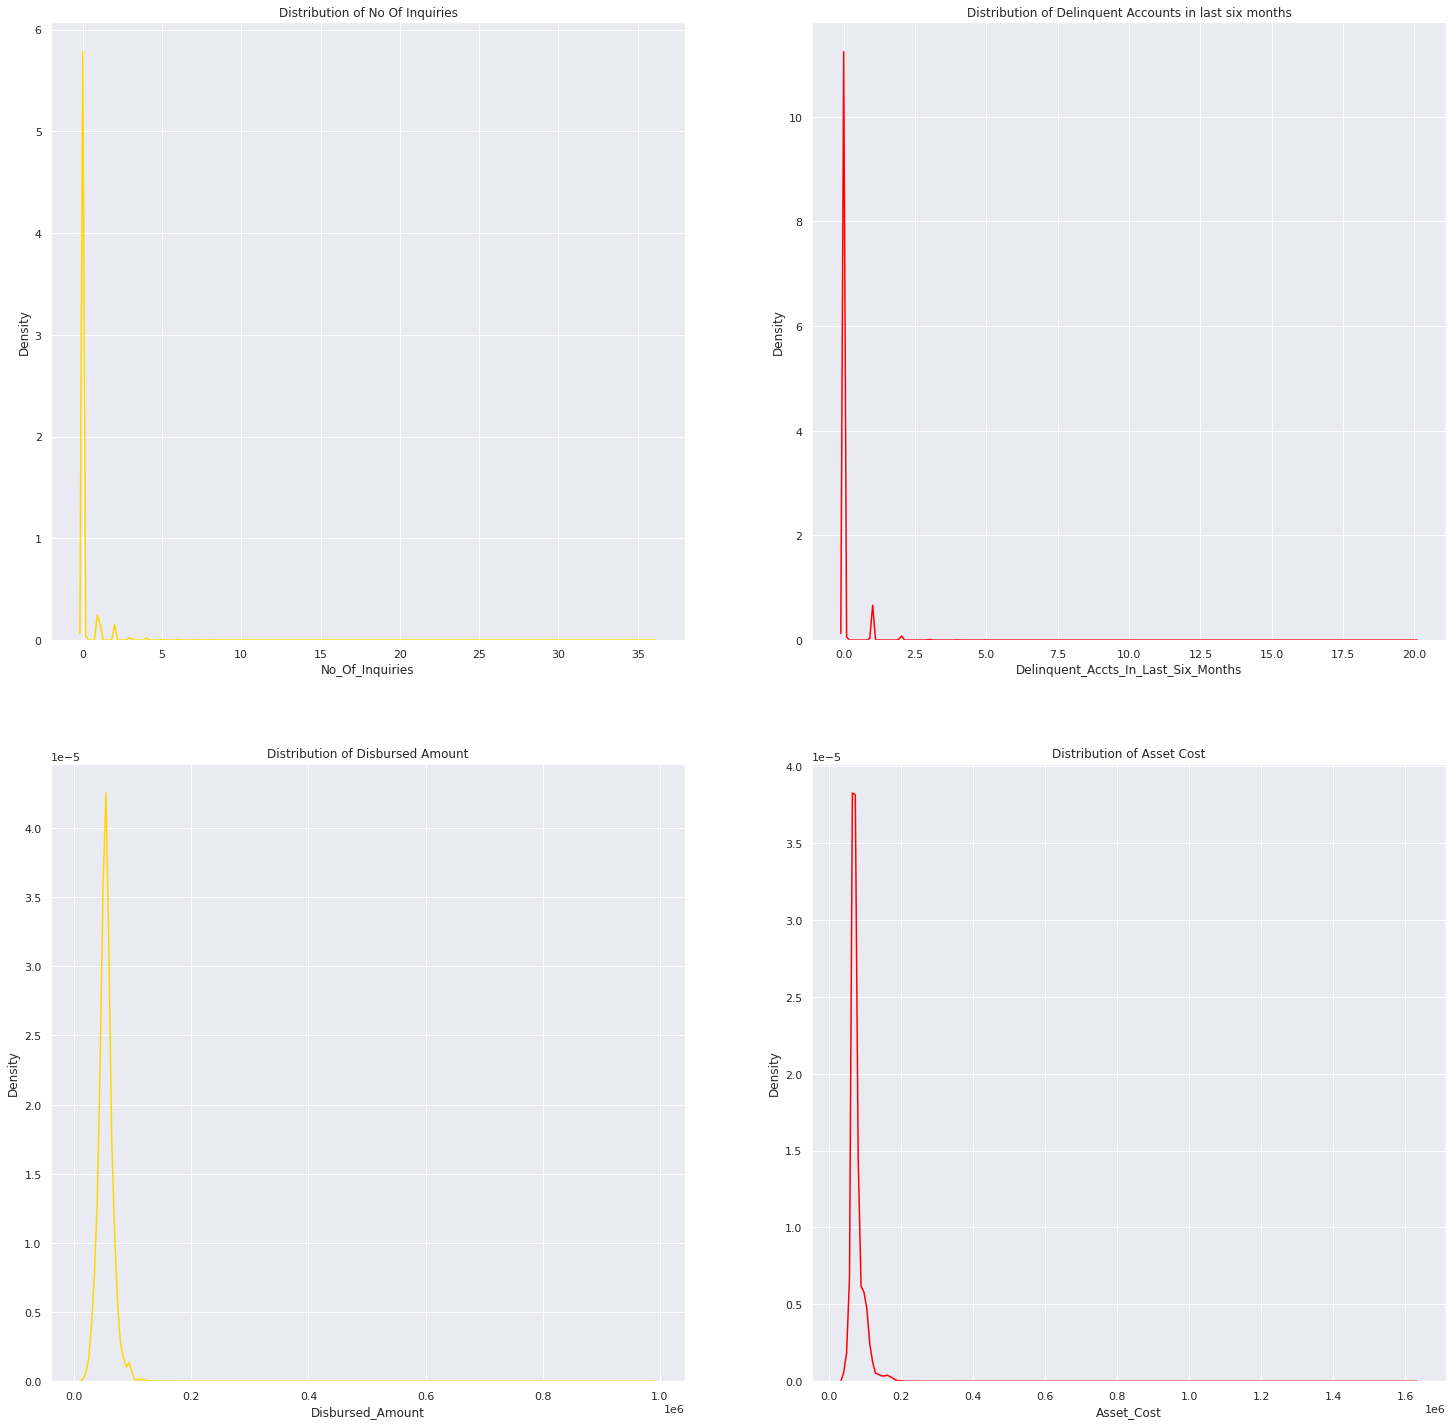

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(25, 25))

axs[0,0].set_title('Distribution of No Of Inquiries')
axs[0,1].set_title('Distribution of Delinquent Accounts in last six months')
axs[1,0].set_title('Distribution of Disbursed Amount')
axs[1,1].set_title('Distribution of Asset Cost')

sns.kdeplot(data=data.No_Of_Inquiries,color="gold",ax=axs[0,0])
sns.kdeplot(data=data.Delinquent_Accts_In_Last_Six_Months, color="red",ax=axs[0,1])
sns.kdeplot(data=data.Disbursed_Amount, color="gold",ax=axs[1,0])
sns.kdeplot(data=data.Asset_Cost,color="red",ax=axs[1,1])

plt.show()

Using a new dataframe and using log transformation/sqrt transformation depending upon the presence of zero values to reduce the postive skewness of these data

In [ ]:
datacopy=data.copy(deep=True)

In [ ]:
data

Uniqueid  Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
0        420825             50578       58400  89.55        67       22807   
1        417566             53278       61360  89.63        67       22807   
2        539055             52378       60300  88.39        67       22807   
3        529269             46349       61500  76.42        67       22807   
4        563215             43594       78256  57.50        67       22744   
...         ...               ...         ...    ...       ...         ...   
233149   561031             57759       76350  77.28         5       22289   
233150   649600             55009       71200  78.72       138       17408   
233151   603445             58513       68000  88.24       135       23313   
233152   442948             22824       40458  61.79       160       16212   
233153   545300             35299       72698  52.27         3       14573   

       Manufacturer_Id Employment_Type Disbursaldate State_Id  ...  \
0                   45        Salaried    2018-08-03        6  ...   
1                   45   Self employed    2018-08-01        6  ...   
2                   45   Self employed    2018-09-26        6  ...   
3                   45        Salaried    2018-09-23        6  ...   
4                   86   Self employed    2018-10-08        6  ...   
...                ...             ...           ...      ...  ...   
233149              51   Self employed    2018-10-06        9  ...   
233150              51   Self employed    2018-10-31        9  ...   
233151              45   Self employed    2018-10-23        4  ...   
233152              48   Self employed    2018-08-17       16  ...   
233153              45   Self employed    2018-09-28        1  ...   

        Driving_Flag  Passport_Flag  New_Accts_In_Last_Six_Months  \
0              False          False                             0   
1              False          False                             0   
2              False          False                             0   
3              False          False                             0   
4              False          False                             0   
...              ...            ...                           ...   
233149         False          False                             0   
233150         False          False                             0   
233151         False          False                            35   
233152         False          False                             9   
233153         False          False                             5   

        Delinquent_Accts_In_Last_Six_Months  Average_Acct_Age  \
0                                         0              0.00   
1                                         0              0.00   
2                                         0              0.00   
3                                         0              0.00   
4                                         0              0.00   
...                                     ...               ...   
233149                                    0              2.33   
233150                                    0              1.42   
233151                                    5              0.75   
233152                                    1              1.17   
233153                                    0              2.92   

        Credit_History_Length  No_Of_Inquiries  Loan_Default  Age  \
0                        0.00                0         False   38   
1                        0.00                0         False   36   
2                        0.00                1          True   44   
3                        0.00                0         False   34   
4                        0.00                0         False   27   
...                       ...              ...           ...  ...   
233149                   2.33                0         False   40   
233150                   1.42                1         False   29  

In [ ]:
datacopy

Uniqueid  Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
0        420825             50578       58400  89.55        67       22807   
1        417566             53278       61360  89.63        67       22807   
2        539055             52378       60300  88.39        67       22807   
3        529269             46349       61500  76.42        67       22807   
4        563215             43594       78256  57.50        67       22744   
...         ...               ...         ...    ...       ...         ...   
233149   561031             57759       76350  77.28         5       22289   
233150   649600             55009       71200  78.72       138       17408   
233151   603445             58513       68000  88.24       135       23313   
233152   442948             22824       40458  61.79       160       16212   
233153   545300             35299       72698  52.27         3       14573   

       Manufacturer_Id Employment_Type Disbursaldate State_Id  ...  \
0                   45        Salaried    2018-08-03        6  ...   
1                   45   Self employed    2018-08-01        6  ...   
2                   45   Self employed    2018-09-26        6  ...   
3                   45        Salaried    2018-09-23        6  ...   
4                   86   Self employed    2018-10-08        6  ...   
...                ...             ...           ...      ...  ...   
233149              51   Self employed    2018-10-06        9  ...   
233150              51   Self employed    2018-10-31        9  ...   
233151              45   Self employed    2018-10-23        4  ...   
233152              48   Self employed    2018-08-17       16  ...   
233153              45   Self employed    2018-09-28        1  ...   

        Driving_Flag  Passport_Flag  New_Accts_In_Last_Six_Months  \
0              False          False                             0   
1              False          False                             0   
2              False          False                             0   
3              False          False                             0   
4              False          False                             0   
...              ...            ...                           ...   
233149         False          False                             0   
233150         False          False                             0   
233151         False          False                            35   
233152         False          False                             9   
233153         False          False                             5   

        Delinquent_Accts_In_Last_Six_Months  Average_Acct_Age  \
0                                         0              0.00   
1                                         0              0.00   
2                                         0              0.00   
3                                         0              0.00   
4                                         0              0.00   
...                                     ...               ...   
233149                                    0              2.33   
233150                                    0              1.42   
233151                                    5              0.75   
233152                                    1              1.17   
233153                                    0              2.92   

        Credit_History_Length  No_Of_Inquiries  Loan_Default  Age  \
0                        0.00                0         False   38   
1                        0.00                0         False   36   
2                        0.00                1          True   44   
3                        0.00                0         False   34   
4                        0.00                0         False   27   
...                       ...              ...           ...  ...   
233149                   2.33                0         False   40   
233150                   1.42                1         False   29  

In [ ]:
datacopy['No_Of_Inquiries']=np.sqrt(datacopy['No_Of_Inquiries'])

In [ ]:
datacopy['No_Of_Inquiries']

0         0.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
233149    0.0
233150    1.0
233151    1.0
233152    0.0
233153    0.0
Name: No_Of_Inquiries, Length: 233154, dtype: float64

In [ ]:
skew(datacopy['No_Of_Inquiries'])

2.7995764890851538

In [ ]:
skew(data.No_Of_Inquiries)

7.8706321965986925

skewness of No of Inquiries column has been reduced

In [ ]:
datacopy['Delinquent_Accts_In_Last_Six_Months']=np.sqrt(datacopy['Delinquent_Accts_In_Last_Six_Months'])

In [ ]:
datacopy['Delinquent_Accts_In_Last_Six_Months']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
233149    0.000000
233150    0.000000
233151    2.236068
233152    1.000000
233153    0.000000
Name: Delinquent_Accts_In_Last_Six_Months, Length: 233154, dtype: float64

In [ ]:
skew(datacopy['Delinquent_Accts_In_Last_Six_Months'])

3.495171895205121

In [ ]:
skew(data['Delinquent_Accts_In_Last_Six_Months'])

6.64195305113602

In [ ]:
datacopy['Disbursed_Amount']=np.log(datacopy['Disbursed_Amount'])

In [ ]:
datacopy['Disbursed_Amount']

0         10.831272
1         10.883279
2         10.866242
3         10.743955
4         10.682675
            ...    
233149    10.964034
233150    10.915252
233151    10.977004
233152    10.035568
233153    10.471610
Name: Disbursed_Amount, Length: 233154, dtype: float64

In [ ]:
skew(datacopy['Disbursed_Amount'])

-0.45463811558722306

In [ ]:
skew(data['Disbursed_Amount'])

4.492210762942639

In [ ]:
datacopy['Asset_Cost']=np.log(datacopy['Asset_Cost'])

In [ ]:
datacopy['Asset_Cost']

0         10.975071
1         11.024513
2         11.007087
3         11.026792
4         11.267741
            ...    
233149    11.243083
233150    11.173248
233151    11.127263
233152    10.608020
233153    11.194069
Name: Asset_Cost, Length: 233154, dtype: float64

In [ ]:
skew(datacopy['Asset_Cost'])

1.2791498849176184

# We have transformed all the highly skewed numeric columns and lets see how the distribution looks now

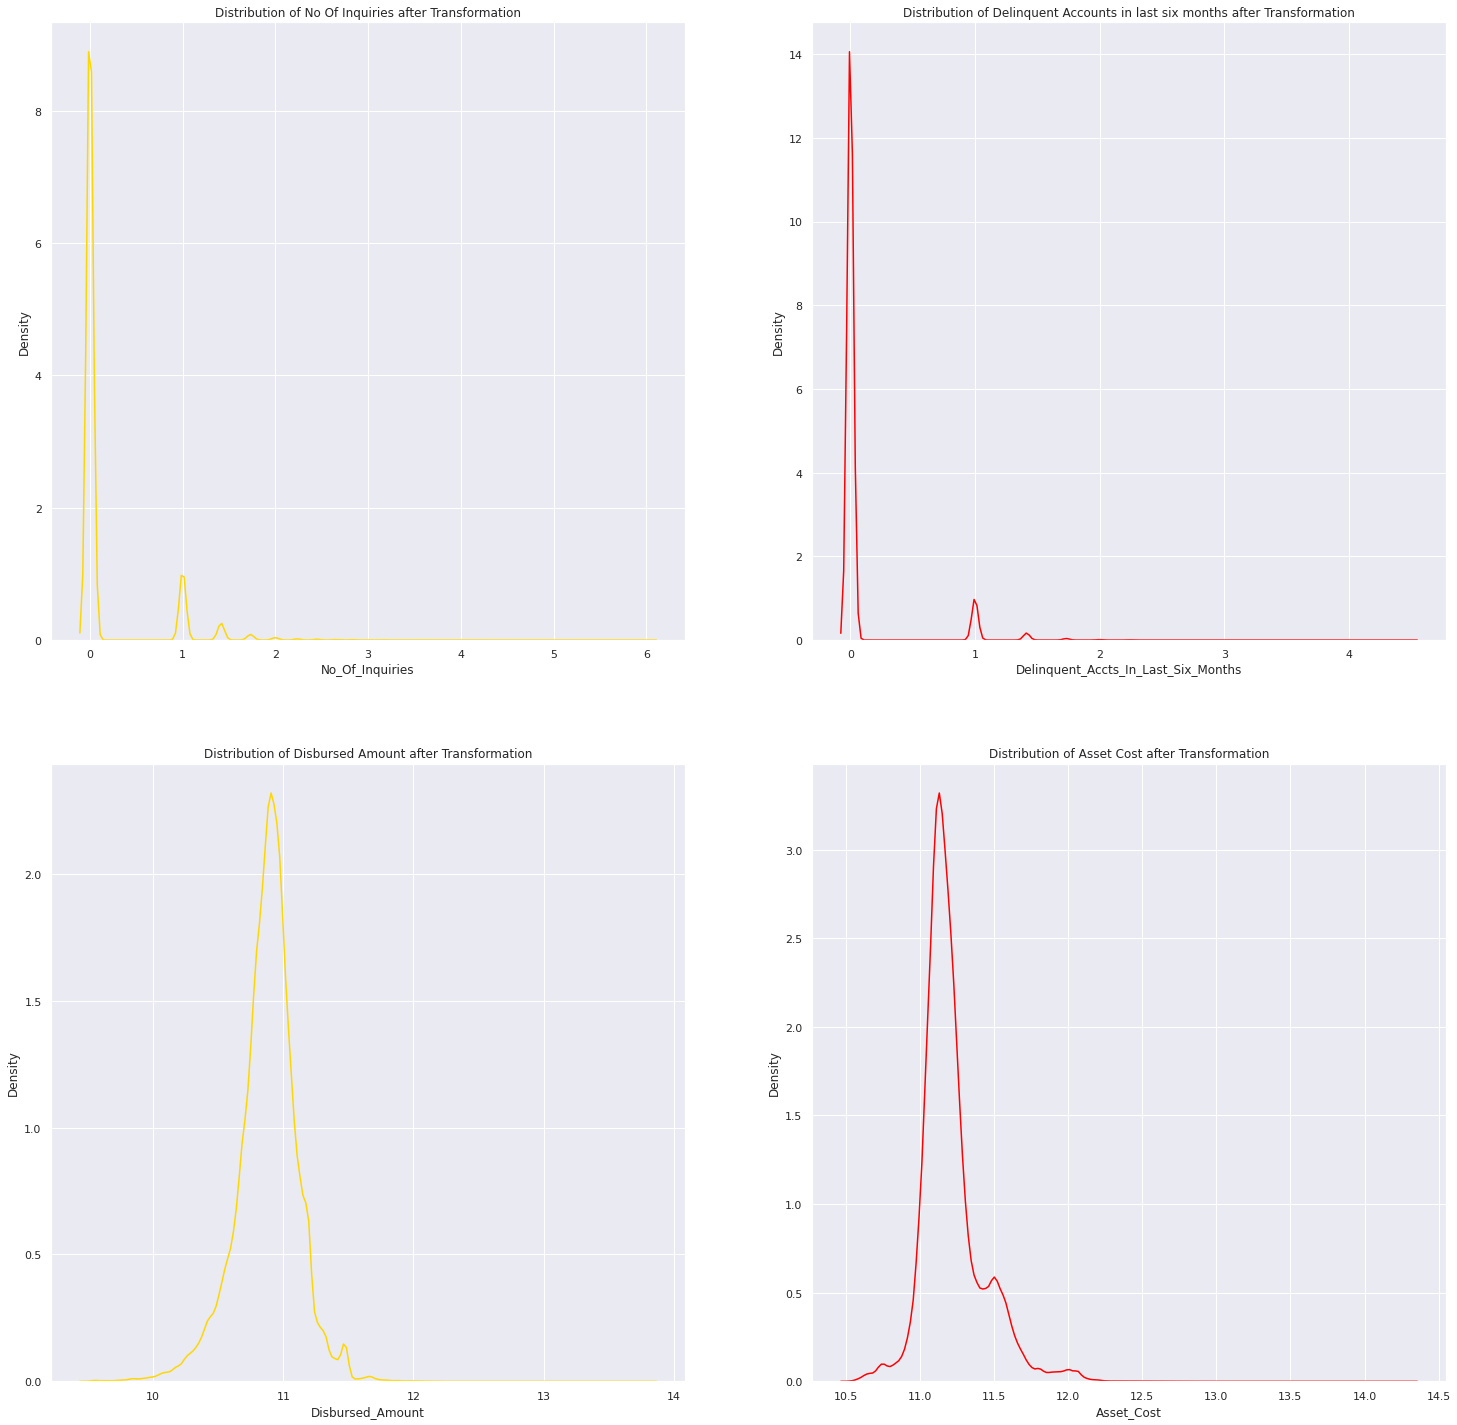

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(25, 25))

axs[0,0].set_title('Distribution of No Of Inquiries after Transformation')
axs[0,1].set_title('Distribution of Delinquent Accounts in last six months after Transformation')
axs[1,0].set_title('Distribution of Disbursed Amount after Transformation')
axs[1,1].set_title('Distribution of Asset Cost after Transformation')

sns.kdeplot(data=datacopy.No_Of_Inquiries,color="gold",ax=axs[0,0])
sns.kdeplot(data=datacopy.Delinquent_Accts_In_Last_Six_Months, color="red",ax=axs[0,1])
sns.kdeplot(data=datacopy.Disbursed_Amount, color="gold",ax=axs[1,0])
sns.kdeplot(data=datacopy.Asset_Cost,color="red",ax=axs[1,1])

plt.show()

In [ ]:
##Lets encode the categorical variables now

Categorical variables in the dataset


1.   branch_id 82 - BinaryEncoding

2.   supplier_id 2953 - BinaryEncoding

3.   manufacturer_id 11 - one hot encoding

4.   Employment.Type 2 - one hot encoding

5.   State_ID 22 - one hot encoding


Due to the very high number of unique values in Supllier id and Branch Id we will use BinaryEncoding and for rest of the three columns we will use one hot encoding





In [ ]:
dataencoded=datacopy.copy(deep=True)

In [ ]:
dataencoded

Uniqueid  Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
0        420825         10.831272   10.975071  89.55        67       22807   
1        417566         10.883279   11.024513  89.63        67       22807   
2        539055         10.866242   11.007087  88.39        67       22807   
3        529269         10.743955   11.026792  76.42        67       22807   
4        563215         10.682675   11.267741  57.50        67       22744   
...         ...               ...         ...    ...       ...         ...   
233149   561031         10.964034   11.243083  77.28         5       22289   
233150   649600         10.915252   11.173248  78.72       138       17408   
233151   603445         10.977004   11.127263  88.24       135       23313   
233152   442948         10.035568   10.608020  61.79       160       16212   
233153   545300         10.471610   11.194069  52.27         3       14573   

       Manufacturer_Id Employment_Type Disbursaldate State_Id  ...  \
0                   45        Salaried    2018-08-03        6  ...   
1                   45   Self employed    2018-08-01        6  ...   
2                   45   Self employed    2018-09-26        6  ...   
3                   45        Salaried    2018-09-23        6  ...   
4                   86   Self employed    2018-10-08        6  ...   
...                ...             ...           ...      ...  ...   
233149              51   Self employed    2018-10-06        9  ...   
233150              51   Self employed    2018-10-31        9  ...   
233151              45   Self employed    2018-10-23        4  ...   
233152              48   Self employed    2018-08-17       16  ...   
233153              45   Self employed    2018-09-28        1  ...   

        Driving_Flag  Passport_Flag  New_Accts_In_Last_Six_Months  \
0              False          False                             0   
1              False          False                             0   
2              False          False                             0   
3              False          False                             0   
4              False          False                             0   
...              ...            ...                           ...   
233149         False          False                             0   
233150         False          False                             0   
233151         False          False                            35   
233152         False          False                             9   
233153         False          False                             5   

        Delinquent_Accts_In_Last_Six_Months  Average_Acct_Age  \
0                                  0.000000              0.00   
1                                  0.000000              0.00   
2                                  0.000000              0.00   
3                                  0.000000              0.00   
4                                  0.000000              0.00   
...                                     ...               ...   
233149                             0.000000              2.33   
233150                             0.000000              1.42   
233151                             2.236068              0.75   
233152                             1.000000              1.17   
233153                             0.000000              2.92   

        Credit_History_Length  No_Of_Inquiries  Loan_Default  Age  \
0                        0.00              0.0         False   38   
1                        0.00              0.0         False   36   
2                        0.00              1.0          True   44   
3                        0.00              0.0         False   34   
4                        0.00              0.0         False   27   
...                       ...              ...           ...  ...   
233149                   2.33              0.0         False   40   
233150                   1.42              1.0         False   29  

In [ ]:
dataencoded = dataencoded.drop('Disbursaldate', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
dataencoded = dataencoded.drop('Uniqueid', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
dataencoded = dataencoded.drop('Mobileno_Avl_Flag', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
dataencoded = dataencoded.drop('Customer_Status', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
dataencoded = pd.get_dummies(data=dataencoded, columns=['Manufacturer_Id','Employment_Type','State_Id'])

In [ ]:
dataBinaryEncoded= ce.BinaryEncoder(cols=['Branch_Id','Supplier_Id'],return_df=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
dataencoded

Disbursed_Amount  Asset_Cost    Ltv Branch_Id Supplier_Id  \
0              10.831272   10.975071  89.55        67       22807   
1              10.883279   11.024513  89.63        67       22807   
2              10.866242   11.007087  88.39        67       22807   
3              10.743955   11.026792  76.42        67       22807   
4              10.682675   11.267741  57.50        67       22744   
...                  ...         ...    ...       ...         ...   
233149         10.964034   11.243083  77.28         5       22289   
233150         10.915252   11.173248  78.72       138       17408   
233151         10.977004   11.127263  88.24       135       23313   
233152         10.035568   10.608020  61.79       160       16212   
233153         10.471610   11.194069  52.27         3       14573   

        Aadhar_Flag  Pan_Flag  Voterid_Flag  Driving_Flag  Passport_Flag  \
0              True     False         False         False          False   
1              True     False         False         False          False   
2              True     False         False         False          False   
3              True     False         False         False          False   
4              True     False         False         False          False   
...             ...       ...           ...           ...            ...   
233149         True     False         False         False          False   
233150         True     False         False         False          False   
233151         True     False         False         False          False   
233152         True      True         False         False          False   
233153         True     False         False         False          False   

        New_Accts_In_Last_Six_Months  Delinquent_Accts_In_Last_Six_Months  \
0                                  0                             0.000000   
1                                  0                             0.000000   
2                                  0                             0.000000   
3                                  0                             0.000000   
4                                  0                             0.000000   
...                              ...                                  ...   
233149                             0                             0.000000   
233150                             0                             0.000000   
233151                            35                             2.236068   
233152                             9                             1.000000   
233153                             5                             0.000000   

        Average_Acct_Age  Credit_History_Length  No_Of_Inquiries  \
0                   0.00                   0.00              0.0   
1                   0.00                   0.00              0.0   
2                   0.00                   0.00              1.0   
3                   0.00                   0.00              0.0   
4                   0.00                   0.00              0.0   
...                  ...                    ...              ...   
233149              2.33                   2.33              0.0   
233150              1.42                   1.42              1.0   
233151              0.75                   3.83              1.0   
233152              1.17                   3.17              0.0   
233153              2.92                   5.33              0.0   

        Loan_Default  Age  Manufacturer_Id_45  Manufacturer_Id_48  \
0              False   38                   1                   0   
1              False   36                   1                   0   
2               True   44                   1                   0   
3              False   34                   1                   0   
4              False   27                   0                   0   
...              ...  ...                 ...                 ...   
233149         False   40                

In [ ]:
dataencoded=dataBinaryEncoded.fit_transform(dataencoded) 
dataencoded

Disbursed_Amount  Asset_Cost    Ltv  Branch_Id_0  Branch_Id_1  \
0              10.831272   10.975071  89.55            0            0   
1              10.883279   11.024513  89.63            0            0   
2              10.866242   11.007087  88.39            0            0   
3              10.743955   11.026792  76.42            0            0   
4              10.682675   11.267741  57.50            0            0   
...                  ...         ...    ...          ...          ...   
233149         10.964034   11.243083  77.28            0            0   
233150         10.915252   11.173248  78.72            0            1   
233151         10.977004   11.127263  88.24            0            1   
233152         10.035568   10.608020  61.79            0            1   
233153         10.471610   11.194069  52.27            0            0   

        Branch_Id_2  Branch_Id_3  Branch_Id_4  Branch_Id_5  Branch_Id_6  \
0                 0            0            0            0            1   
1                 0            0            0            0            1   
2                 0            0            0            0            1   
3                 0            0            0            0            1   
4                 0            0            0            0            1   
...             ...          ...          ...          ...          ...   
233149            0            0            1            1            1   
233150            0            1            1            1            1   
233151            1            0            0            0            0   
233152            0            0            1            1            1   
233153            0            1            1            0            0   

        Supplier_Id_0  Supplier_Id_1  Supplier_Id_2  Supplier_Id_3  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
233149              1              0              1              1   
233150              0              0              1              1   
233151              0              1              0              0   
233152              0              1              0              1   
233153              0              1              0              1   

        Supplier_Id_4  Supplier_Id_5  Supplier_Id_6  Supplier_Id_7  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
233149              0              0              0              0   
233150              0              1              0              1   
233151              0              1              0              0   
233152              1              1              1              0   
233153              1              0              1              0   

        Supplier_Id_8  Supplier_Id_9  Supplier_Id_10  Supplier_Id_11  \
0                   0              0               0               1   
1                   0              0               0               1   
2                   0              0               0               1   
3                   0              0               0               1   
4                   0              0               1               0   
...               ...            ...             ...             ...   
233149              0              0        

In [ ]:
y_data = dataencoded['Loan_Default']

In [ ]:
x_data=dataencoded.drop('Loan_Default',axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.25, random_state=0)

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.782446087598003


In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[45577    24]
 [12657    31]]


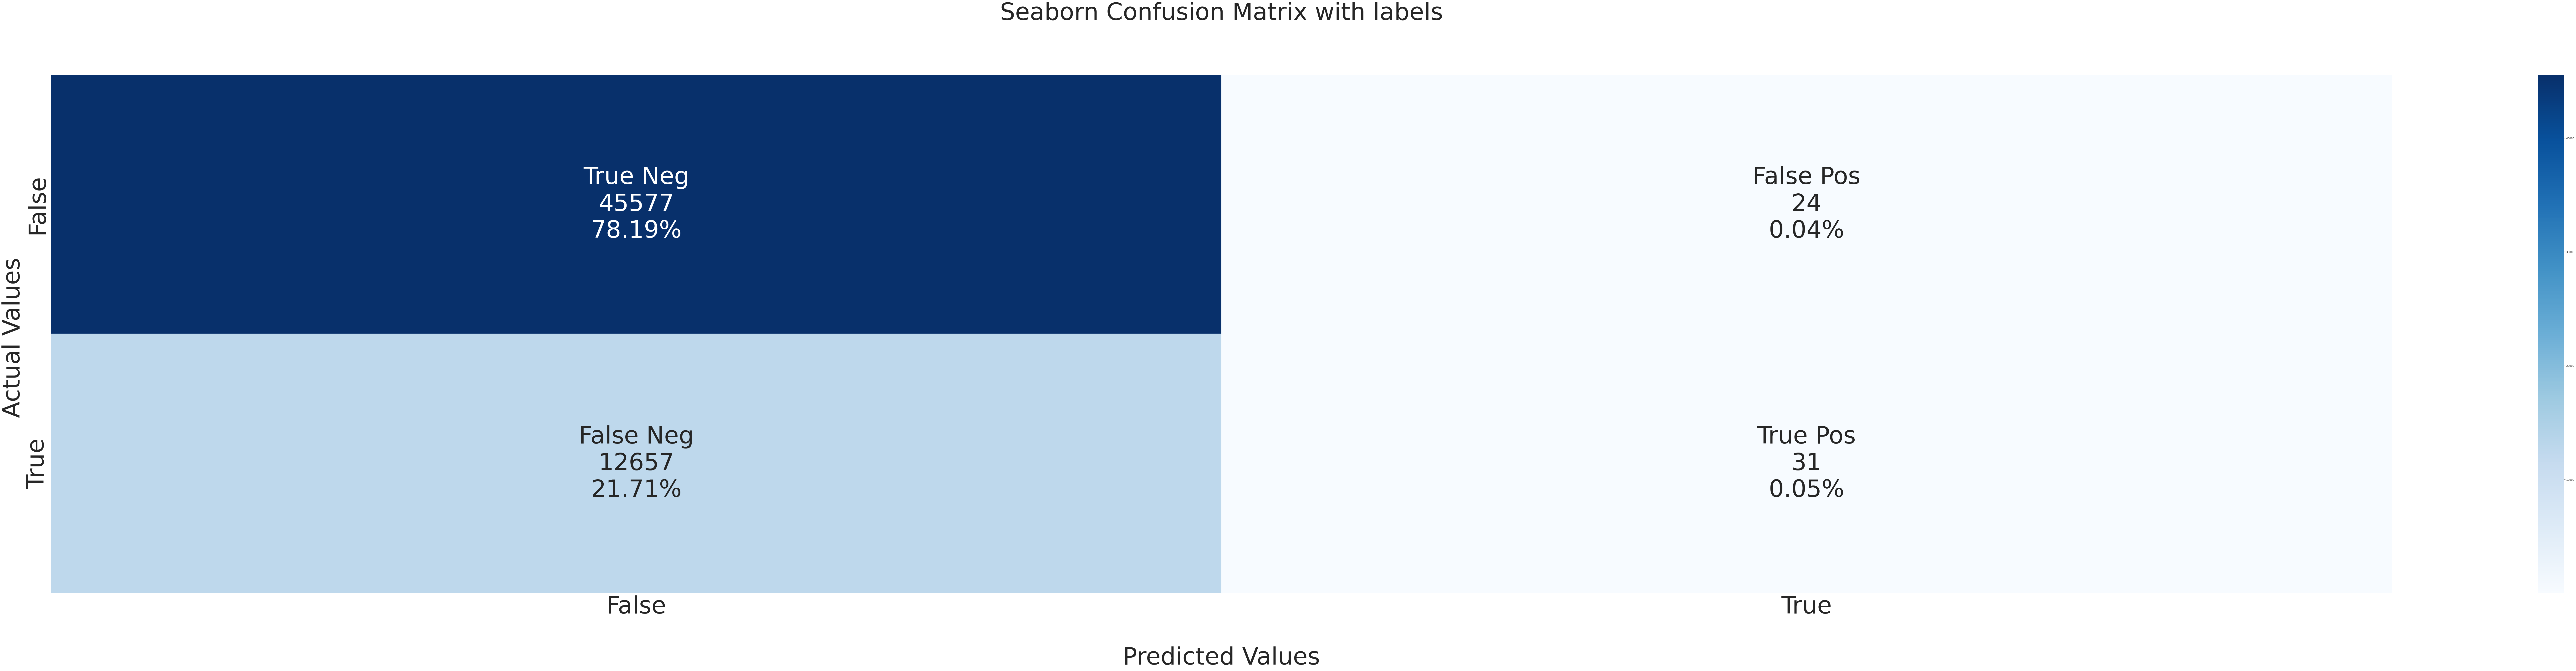

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',annot_kws={"size": 100})

ax.set_title('Seaborn Confusion Matrix with labels\n\n',fontsize=100);
ax.set_xlabel('\nPredicted Values',fontsize=100)
ax.set_ylabel('Actual Values ', fontsize=100);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'],fontsize = 100)
ax.yaxis.set_ticklabels(['False','True'],fontsize=100)

## Display the visualization of the Confusion Matrix.
plt.show()

# ***The confusion matrix here is not right as it doesnt predict values for Loan_Default = 1 , so we will try to train and test the model by passing same ratio for Defaulters:Non Defaulters in both train and test data by using the parameter stratify***

In [ ]:
y_data = dataencoded['Loan_Default']

In [ ]:
x_data=dataencoded.drop('Loan_Default',axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.25, random_state=0,stratify=y_data)

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[45612    24]
 [12627    26]]


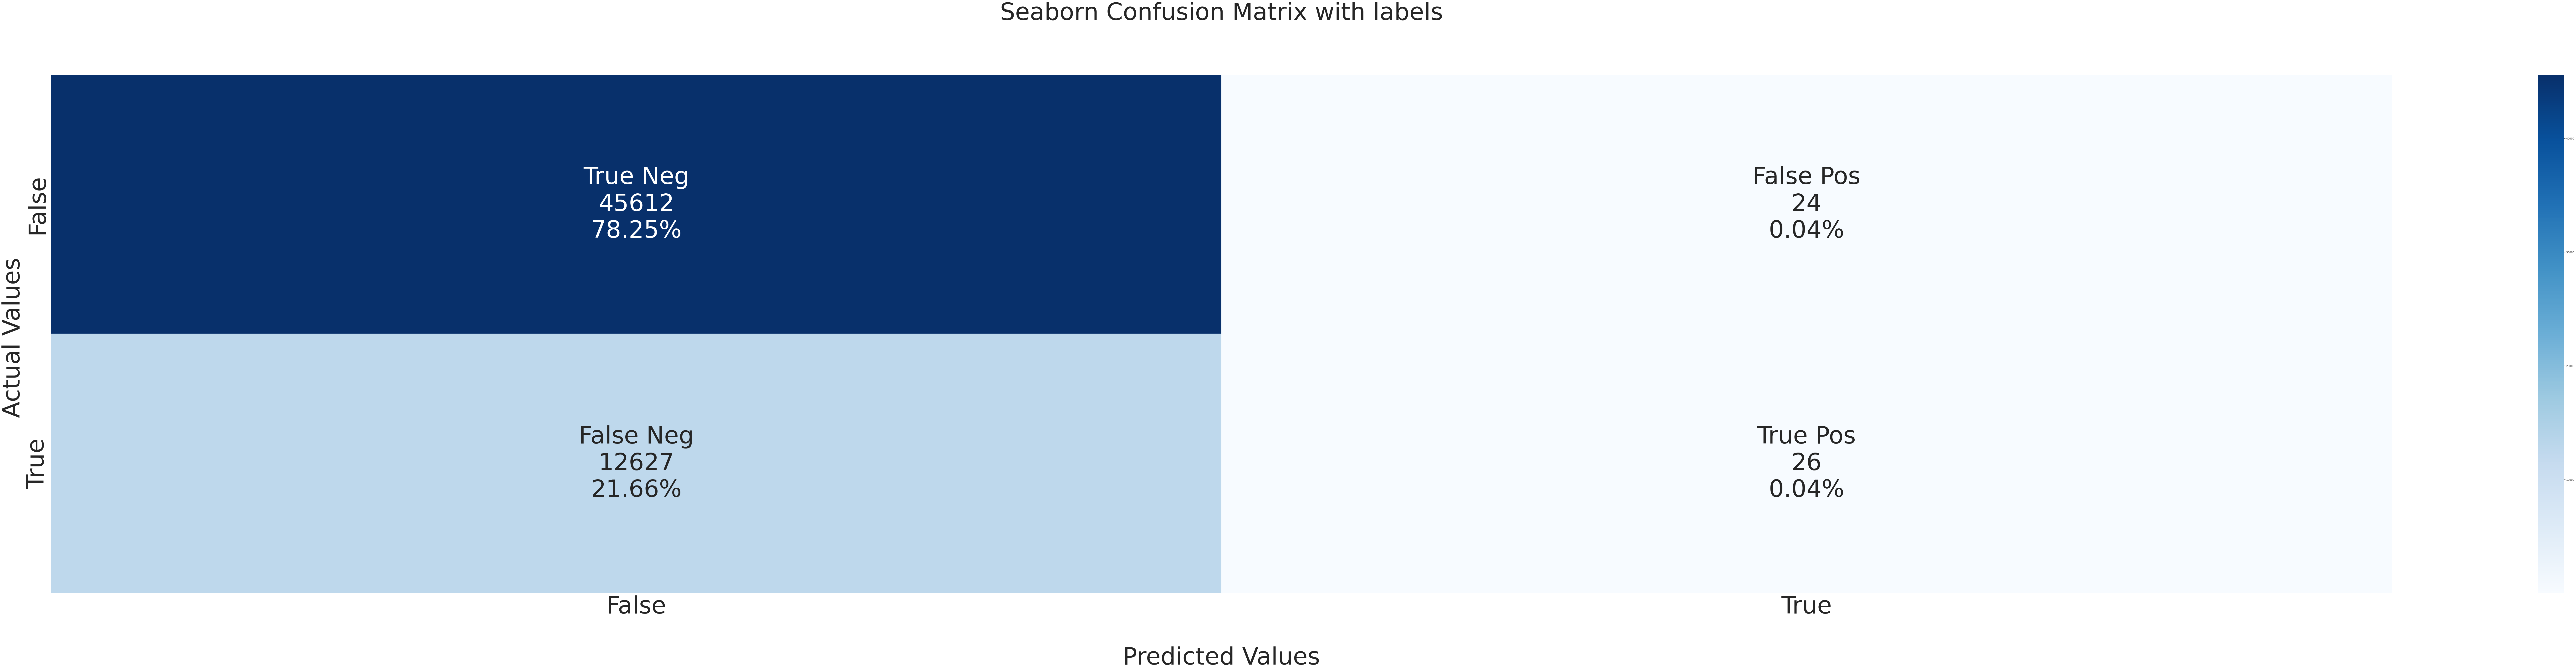

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',annot_kws={"size": 100})

ax.set_title('Seaborn Confusion Matrix with labels\n\n',fontsize=100);
ax.set_xlabel('\nPredicted Values',fontsize=100)
ax.set_ylabel('Actual Values ', fontsize=100);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'],fontsize = 100)
ax.yaxis.set_ticklabels(['False','True'],fontsize=100)

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
##There is very very less True positive values and lets carry out UnderSampling technique to solve this

# ***Undersampling the DS***

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
X_resampled,y_resampled = ros.fit_resample(x_data,y_data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.25, random_state=0,stratify=y_resampled)

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[7081 5572]
 [4816 7837]]


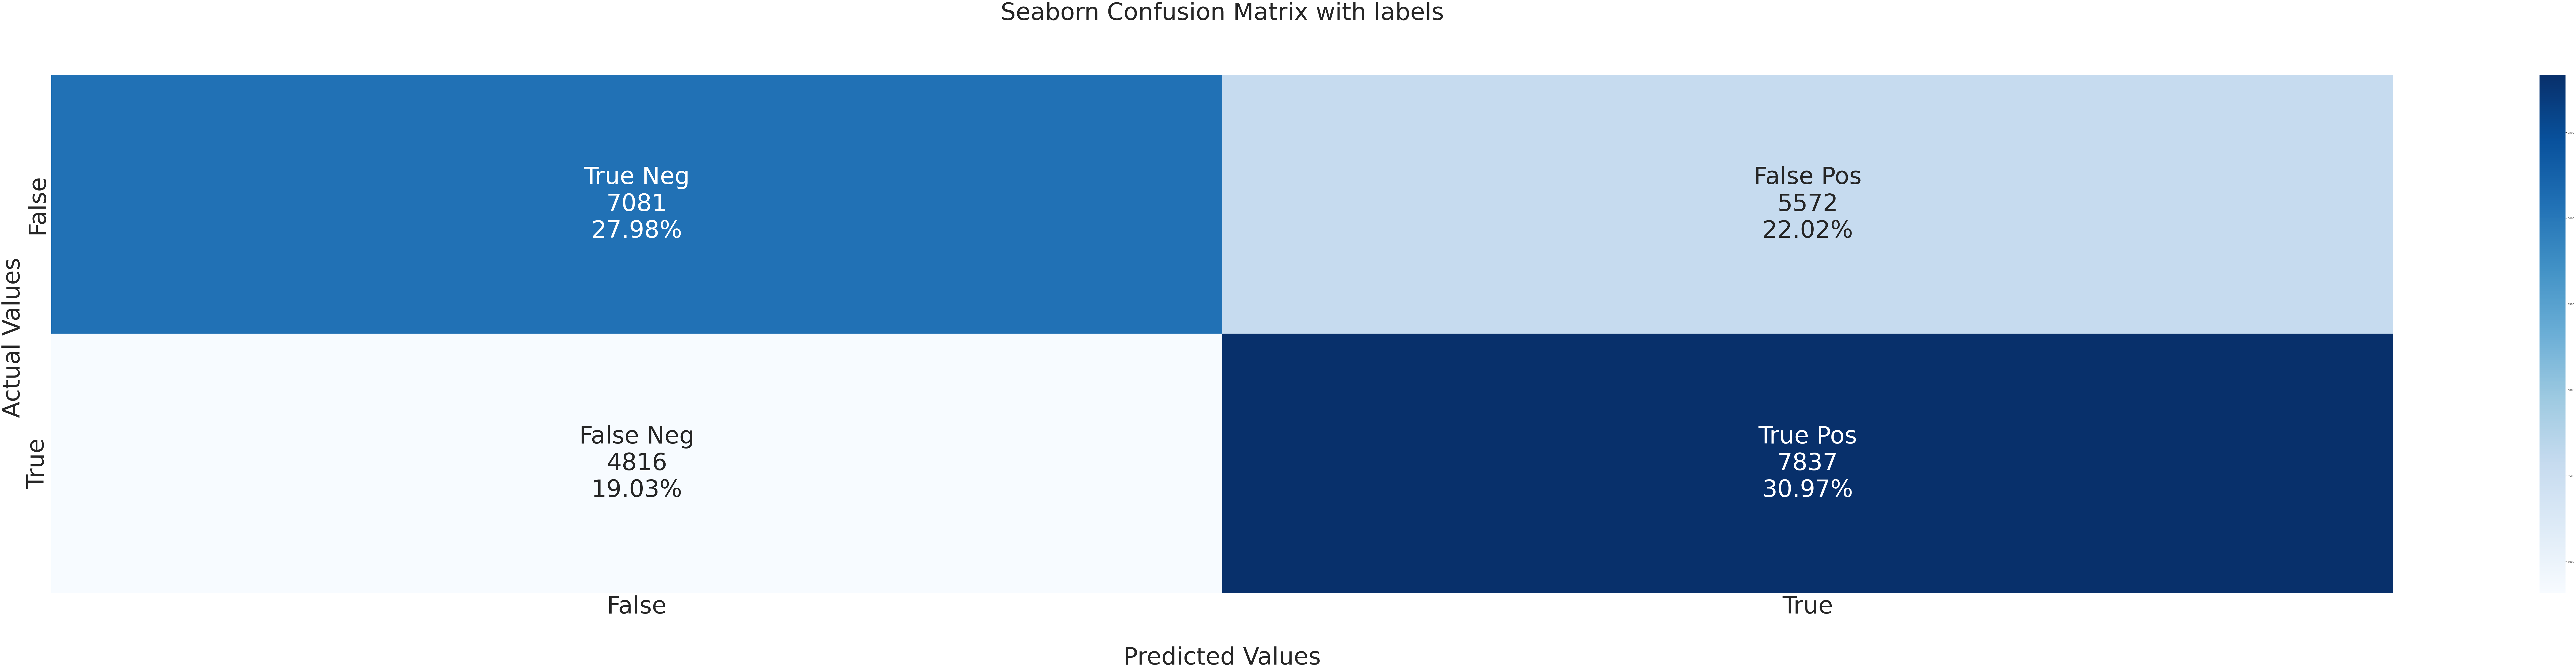

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',annot_kws={"size": 100})

ax.set_title('Seaborn Confusion Matrix with labels\n\n',fontsize=100);
ax.set_xlabel('\nPredicted Values',fontsize=100)
ax.set_ylabel('Actual Values ', fontsize=100);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'],fontsize = 100)
ax.yaxis.set_ticklabels(['False','True'],fontsize=100)

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
f1_score(y_test, predictions)

0.6014120174967386

**After Under Sampling the dataset, it is clear from the graphs that True Positive and False Positive counts has increased and hence under sampling has helped us to do better predictions**